In [1]:
import pandas as pd
import numpy as np

# Feature Engineering

In [22]:
data = pd.read_csv("/home/tgraham/Documents/MSC/project_data/new_approach_data.csv",index_col=0)

In [23]:
data = data.drop(columns=["ActualCompletionDateTime","ExtractTimestamp","JobID","CentralAssetID"])

In [24]:
data = data.rename(columns={"prefix":"Region","ParameterValueID":"%Full","Previous_pvalue":"Previous_%Full"})

In [25]:
data

FloodHotspot RouteID %Full  Failure_or_Maintenance Region  \
15458              0    1101  0-25                       0   NW13   
15460              0    1101  2550                       0   NW13   
15462              0    1101  2550                       0   NW13   
15464              0    1101  2550                       0   NW13   
15466              1    1101  2550                       0   NW13   
...              ...     ...   ...                     ...    ...   
551178             0    M016  7510                       0   NW10   
551179             0    M016  7510                       0   NW10   
551180             1    M501  2550                       0   SW21   
551181             1    M501  2550                       0   SW21   
551182             1    M501  2550                       0   SW21   

        full_failure  covered_failure  broken_failure  Days_Since_Maintenance  \
15458              0                0               0                     0.0   
15460              0                0               0                     0.0   
15462              0                0               0                     0.0   
15464              0                0               0                     0.0   
15466              0                0               0                     0.0   
...              ...              ...             ...                     ...   
551178             0                0               0                   258.0   
551179             0                0               0                   258.0   
551180             0                0               0                   262.0   
551181             0                0               0                   262.0   
551182             0                0               0                   262.0   

       Previous_%Full Previous_type_of_maintenance  
15458            0-25                     Emptying  
15460            2550                     Emptying  
15462            2550                     Emptying  
15464            2550                     Emptying  
15466            2550                     Emptying  
...               ...                          ...  
551178           2550                     Emptying  
551179           2550                     Emptying  
551180           5075                     Clearing  
551181           5075                     Clearing  
551182           2550                     Clearing  

[409814 rows x 11 columns]

In [26]:
data = data.drop(columns="RouteID")

In [27]:
data.Region.unique()

array(['NW13', 'NW10', 'SW21', 'EA68', 'SE04'], dtype=object)

In [28]:
data

FloodHotspot %Full  Failure_or_Maintenance Region  full_failure  \
15458              0  0-25                       0   NW13             0   
15460              0  2550                       0   NW13             0   
15462              0  2550                       0   NW13             0   
15464              0  2550                       0   NW13             0   
15466              1  2550                       0   NW13             0   
...              ...   ...                     ...    ...           ...   
551178             0  7510                       0   NW10             0   
551179             0  7510                       0   NW10             0   
551180             1  2550                       0   SW21             0   
551181             1  2550                       0   SW21             0   
551182             1  2550                       0   SW21             0   

        covered_failure  broken_failure  Days_Since_Maintenance  \
15458                 0               0                     0.0   
15460                 0               0                     0.0   
15462                 0               0                     0.0   
15464                 0               0                     0.0   
15466                 0               0                     0.0   
...                 ...             ...                     ...   
551178                0               0                   258.0   
551179                0               0                   258.0   
551180                0               0                   262.0   
551181                0               0                   262.0   
551182                0               0                   262.0   

       Previous_%Full Previous_type_of_maintenance  
15458            0-25                     Emptying  
15460            2550                     Emptying  
15462            2550                     Emptying  
15464            2550                     Emptying  
15466            2550                     Emptying  
...               ...                          ...  
551178           2550                     Emptying  
551179           2550                     Emptying  
551180           5075                     Clearing  
551181           5075                     Clearing  
551182           2550                     Clearing  

[409814 rows x 10 columns]

In [30]:
data["Region"] = data["Region"].astype(str)
data["%Full"] = data["%Full"].astype(str)
data["Days_Since_Maintenance"] = data["Days_Since_Maintenance"].astype(int)

In [31]:
data["%Full"].unique()

array(['0-25', '2550', '7510', '5075', 'CLEA'], dtype=object)

In [32]:
data["Region"].value_counts()

SW21    141253
NW13    120936
NW10     75395
EA68     47719
SE04     24511
Name: Region, dtype: int64

In [10]:
def edit_paramaterValueID (value):
    param_dict = {
        "CLEA":0,
        "0-25":1,
        "2550":2,
        "5075":3,
        "7510":4
    }
    return param_dict[value]

In [11]:
def encode_type_of_maintenance(value):
    if value == "Emptying":
        return 0
    elif value == "Clearing":
        return 1
    else:
        pass

In [12]:
def encode_region(value):
    if value == 'SW21':
        return 1
    elif value == 'NW13':
        return 2
    elif value == 'NW10':
        return 3
    elif value == 'EA68':
        return 4
    elif value == 'SE04':
        return 5
    else:
        pass

In [34]:
data = data.drop(columns='FloodHotspot')

In [35]:
data

%Full  Failure_or_Maintenance Region  full_failure  covered_failure  \
15458   0-25                       0   NW13             0                0   
15460   2550                       0   NW13             0                0   
15462   2550                       0   NW13             0                0   
15464   2550                       0   NW13             0                0   
15466   2550                       0   NW13             0                0   
...      ...                     ...    ...           ...              ...   
551178  7510                       0   NW10             0                0   
551179  7510                       0   NW10             0                0   
551180  2550                       0   SW21             0                0   
551181  2550                       0   SW21             0                0   
551182  2550                       0   SW21             0                0   

        broken_failure  Days_Since_Maintenance Previous_%Full  \
15458                0                       0           0-25   
15460                0                       0           2550   
15462                0                       0           2550   
15464                0                       0           2550   
15466                0                       0           2550   
...                ...                     ...            ...   
551178               0                     258           2550   
551179               0                     258           2550   
551180               0                     262           5075   
551181               0                     262           5075   
551182               0                     262           2550   

       Previous_type_of_maintenance  
15458                      Emptying  
15460                      Emptying  
15462                      Emptying  
15464                      Emptying  
15466                      Emptying  
...                             ...  
551178                     Emptying  
551179                     Emptying  
551180                     Clearing  
551181                     Clearing  
551182                     Clearing  

[409814 rows x 9 columns]

In [13]:
region_mapping = {1:"SW21",2:"NW13",3:"NW10",4:"EA68",5:"SE04"}

In [16]:
def reduce_cardinality_of_dsm_long(days):
    # 0-3
    if days >= 0 and days <=90:
        return int(0)
    # 4-6
    elif days > 90 and days <= 180:
        return int(1)
    # 7-9
    elif days > 180 and days <= 270:
        return int(2)
    # 10-12
    elif days > 270 and days <= 360:
        return int(3)
    # 13-15
    elif days > 360 and days <= 450:
        return int(4)
    # 16-18
    elif days > 450 and days <= 540:
        return int(5)
    # 19-21
    elif days > 540 and days <= 630:
        return int(6)
    # 22-24
    elif days > 630 and days <= 720:
        return int(7)
    # 25-27
    elif days > 720 and days <= 810:
        return int(8) 
    # 28-30
    elif days > 810 and days <= 900: 
        return int(9)
    # 31-33
    elif days > 900 and days <= 990: 
        return int(10)
    # >33
    elif days > 990: 
        return int(11)

In [17]:
def reduce_cardinality_of_dsm_short(days):
    # 0-3
    if days >= 0 and days <=90:
        return int(0)
    # 4-6
    elif days > 90 and days <= 180:
        return int(1)
    # 7-9
    elif days > 180 and days <= 270:
        return int(2)
    # 10-12
    elif days > 270 and days <= 360:
        return int(3)
    # 13-15
    elif days > 360 and days <= 450:
        return int(4)
    # 16-18
    elif days > 450 and days <= 540:
        return int(5)
    # 19-21
    elif days > 540 and days <= 630:
        return int(6)
    # 22-24
    elif days > 630 and days <= 720:
        return int(7)
    # >24
    elif days > 720:
        return int(8) 

In [40]:
months_mapping_long = {0:"0-3",1:"4-6",2:"7-9",3:"10-12",4:"13-15",5:"16-18",6:"19-21",7:"22-24",8:"25-27",9:"28-30",10:"31-33",11:"34-36",12:">36"}
months_mapping_short = {0:"0-3",1:"4-6",2:"7-9",3:"10-12",4:"13-15",5:"16-18",6:"19-21",7:"22-24",8:">24"}

In [41]:
data["Months_Since_Maintenance"] = data["Days_Since_Maintenance"].apply(reduce_cardinality_of_dsm_short)

In [42]:
data["Months_Since_Maintenance"] = data["Months_Since_Maintenance"].apply(lambda x: months_mapping_short[x])

In [46]:
data = data.drop(columns="Days_Since_Maintenance")

In [50]:
data.to_csv("full_data_with_original_string.csv")

In [14]:
data["%Full"] = data["%Full"].apply(edit_paramaterValueID)
data["Previous_%Full"] = data["Previous_%Full"].apply(edit_paramaterValueID)
data["Previous_type_of_maintenance"] = data["Previous_type_of_maintenance"].apply(encode_type_of_maintenance)
data["Region"] = data["Region"].apply(encode_region)

In [19]:
struct_data = data

In [20]:
struct_data["Months_Since_Maintenance"] = struct_data["Days_Since_Maintenance"].apply(reduce_cardinality_of_dsm_short)

In [21]:
struct_data["Months_Since_Maintenance"].value_counts()

2    91283
1    76294
3    72516
4    70742
0    38931
5    29506
6    12807
7     9888
8     7847
Name: Months_Since_Maintenance, dtype: int64

In [22]:
struct_data = struct_data.drop(columns="Days_Since_Maintenance")

In [23]:
struct_data = struct_data.drop(columns="FloodHotspot")

In [24]:
struct_data = struct_data.drop(columns="Failure_or_Maintenance")

In [25]:
struct_data["Region"].unique()

array([2, 3, 1, 4, 5])

In [29]:
struct_data

%Full  Region  full_failure  covered_failure  broken_failure  \
15458       1       2             0                0               0   
15460       2       2             0                0               0   
15462       2       2             0                0               0   
15464       2       2             0                0               0   
15466       2       2             0                0               0   
...       ...     ...           ...              ...             ...   
551178      4       3             0                0               0   
551179      4       3             0                0               0   
551180      2       1             0                0               0   
551181      2       1             0                0               0   
551182      2       1             0                0               0   

        Previous_%Full  Previous_type_of_maintenance  Months_Since_Maintenance  
15458                1                             0                         0  
15460                2                             0                         0  
15462                2                             0                         0  
15464                2                             0                         0  
15466                2                             0                         0  
...                ...                           ...                       ...  
551178               2                             0                         2  
551179               2                             0                         2  
551180               3                             1                         2  
551181               3                             1                         2  
551182               2                             1                         2  

[409814 rows x 8 columns]

In [30]:
struct_data.to_csv("modelling_data.csv",index=False)

# Modelling

# Gcastle

In [27]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'

from collections import OrderedDict

import numpy as np
import networkx as nx

import castle
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC, GES, ICALiNGAM, GOLEM
from castle.common.priori_knowledge import PrioriKnowledge
import matplotlib.pyplot as plt

2023-08-17 14:55:45,647 - /home/tgraham/.local/lib/python3.8/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


## PC

In [28]:
struct_data

%Full  Region  full_failure  covered_failure  broken_failure  \
15458       1       2             0                0               0   
15460       2       2             0                0               0   
15462       2       2             0                0               0   
15464       2       2             0                0               0   
15466       2       2             0                0               0   
...       ...     ...           ...              ...             ...   
551178      4       3             0                0               0   
551179      4       3             0                0               0   
551180      2       1             0                0               0   
551181      2       1             0                0               0   
551182      2       1             0                0               0   

        Previous_%Full  Previous_type_of_maintenance  Months_Since_Maintenance  
15458                1                             0                         0  
15460                2                             0                         0  
15462                2                             0                         0  
15464                2                             0                         0  
15466                2                             0                         0  
...                ...                           ...                       ...  
551178               2                             0                         2  
551179               2                             0                         2  
551180               3                             1                         2  
551181               3                             1                         2  
551182               2                             1                         2  

[409814 rows x 8 columns]

# For some weird reason the gCastle PC function is outputting bidirectional edges 1-3 3-1 , 1-5 5-1

In [29]:
# Build the model
pc_gcastle = PC(variant='stable',alpha=0.8) #,priori_knowledge=priori,alpha=0.8)
pc_gcastle.learn(struct_data)

In [30]:
print(pc_gcastle.causal_matrix)

[[0 1 1 0 0 0 1 1]
 [1 0 1 0 1 0 1 1]
 [0 0 0 0 0 0 1 1]
 [1 1 1 0 1 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 1 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]


In [31]:
learned_graph = nx.DiGraph(graph_object.causal_matrix)
print(learned_graph)

NameError: name 'graph_object' is not defined

In [ ]:
GraphDAG(pc.causal_matrix)

In [ ]:
from causallearn.graph.Dag import Dag
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
from causallearn.graph.GraphNode import GraphNode
import networkx as nx


def create_dag_from_gcastle(graph_object,data,learned_graph):
    """
    This function takes a gcastle dag object and returns a causal learn graph so we can use the causal learn plotting function
    """
    
    try:
        # Convert it to a directioned dag
        learned_graph = nx.DiGraph(graph_object.causal_matrix)
    except:
        pass
    # Extract edges
    required_edges_indexes = list(learned_graph.edges)
    # Create mapping from indexes to namex
    MAPPING = {k: v for k, v in zip(range(len(data.columns)), list(data.columns.values))}
    # Apply mapping
    required_edges = []
    for item in required_edges_indexes:
        required_edges.append([MAPPING[item[0]],MAPPING[item[1]]])
    
    # Define DAG
    node_names = struct_data.columns
    nodes = []
    for name in node_names:
        node = GraphNode(name)
        nodes.append(node)
    dag = Dag(nodes)
    # Add edges
    for item in required_edges:
        #print(item)
        node1 = dag.get_node(item[0])
        node2 = dag.get_node(item[1])
        print(node1,node2)
        dag.add_directed_edge(node1, node2)
    #print(required_edges)
    return dag

In [ ]:
learned_graph = nx.DiGraph(graph_object.causal_matrix)
print(learned_graph)
dag = create_dag_from_gcastle(pc,struct_data,learned_graph)

In [ ]:
#dag.get_graph_edges()[0].get_node1().get_name(), dag.get_graph_edges()[0].get_node2().get_name()
for item in dag.get_graph_edges():
    print(item.get_node1().get_name(),item.get_node2().get_name())

In [ ]:
data = struct_data 
graph_object = pc

In [ ]:
# Convert it to a directioned dag
learned_graph = nx.DiGraph(graph_object.causal_matrix)

# Extract edges
required_edges_indexes = list(learned_graph.edges)
# Create mapping from indexes to namex
MAPPING = {k: v for k, v in zip(range(len(data.columns)), list(data.columns.values))}
# Apply mapping
required_edges = []
for item in required_edges_indexes:
    required_edges.append([MAPPING[item[0]],MAPPING[item[1]]])

In [ ]:
required_edges_indexes

In [301]:
# Define DAG
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)
print(dag.get_graph_edges())
# Add edges
for item in required_edges:
    #print(item)
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    print(node1,node2)
    dag.add_directed_edge(node1, node2)

[]
%Full Previous_type_of_maintenance
Region %Full
Region full_failure
Region covered_failure
Region broken_failure
Region Previous_%Full
Region Previous_type_of_maintenance
Region Months_Since_Maintenance
full_failure %Full
full_failure broken_failure
full_failure Months_Since_Maintenance
covered_failure %Full
covered_failure Region
covered_failure full_failure
covered_failure broken_failure
covered_failure Previous_type_of_maintenance
covered_failure Months_Since_Maintenance
broken_failure Previous_type_of_maintenance
broken_failure Months_Since_Maintenance
Previous_%Full %Full
Previous_%Full Region
Previous_%Full full_failure
Previous_%Full Previous_type_of_maintenance
Previous_%Full Months_Since_Maintenance
Months_Since_Maintenance %Full
Months_Since_Maintenance Previous_type_of_maintenance


In [302]:
#dag.get_graph_edges()[0].get_node1().get_name(), dag.get_graph_edges()[0].get_node2().get_name()
for item in dag.get_graph_edges():
    print(item.get_node1().get_name(),item.get_node2().get_name())

Region %Full
full_failure %Full
covered_failure %Full
Previous_%Full %Full
%Full Previous_type_of_maintenance
Months_Since_Maintenance %Full
Region full_failure
covered_failure Region
Region broken_failure
Previous_%Full Region
Region Previous_type_of_maintenance
Region Months_Since_Maintenance
covered_failure full_failure
full_failure broken_failure
Previous_%Full full_failure
full_failure Months_Since_Maintenance
covered_failure broken_failure
covered_failure Previous_type_of_maintenance
covered_failure Months_Since_Maintenance
broken_failure Previous_type_of_maintenance
broken_failure Months_Since_Maintenance
Previous_%Full Previous_type_of_maintenance
Previous_%Full Months_Since_Maintenance
Months_Since_Maintenance Previous_type_of_maintenance


In [392]:
struct_data

%Full  Region  full_failure  covered_failure  broken_failure  \
15458       1       2             0                0               0   
15460       2       2             0                0               0   
15462       2       2             0                0               0   
15464       2       2             0                0               0   
15466       2       2             0                0               0   
...       ...     ...           ...              ...             ...   
551199      4       3             0                0               0   
551200      4       3             0                0               0   
551201      2       1             0                0               0   
551202      2       1             0                0               0   
551203      2       1             0                0               0   

        Previous_%Full  Previous_type_of_maintenance  Months_Since_Maintenance  
15458                1                             1                         0  
15460                2                             1                         0  
15462                2                             1                         0  
15464                2                             1                         0  
15466                2                             1                         0  
...                ...                           ...                       ...  
551199               2                             1                         2  
551200               2                             1                         2  
551201               3                             0                         2  
551202               3                             0                         2  
551203               2                             0                         2  

[413060 rows x 8 columns]

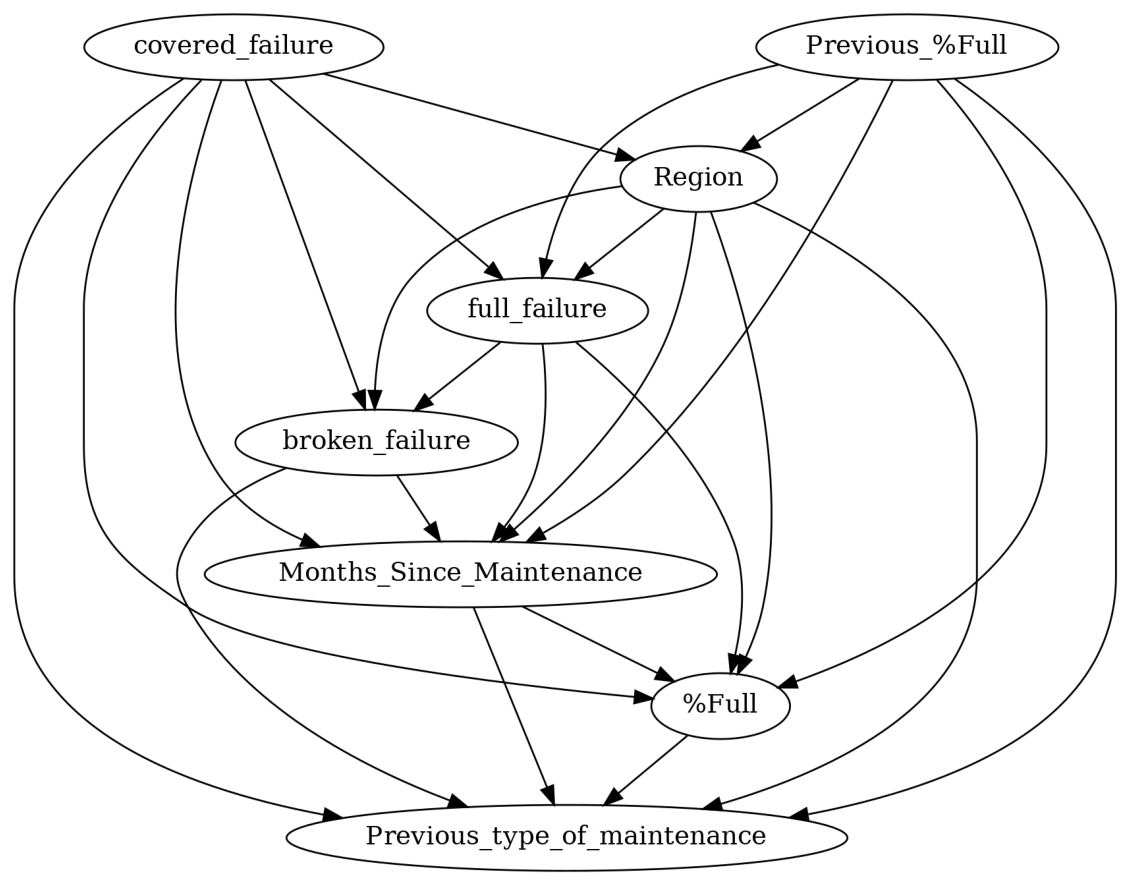

In [303]:
# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

## GES

In [786]:
from castle.algorithms import GES

# DirectLiNGAM learn
ges = GES()
ges.learn(struct_data)

SyntaxError: invalid syntax (4024011601.py, line 1)

In [1527]:
ges.causal_matrix

Tensor([[0, 0, 0, 0, 0, 1, 1, 0],
        [1, 0, 1, 0, 1, 1, 1, 0],
        [1, 1, 0, 1, 1, 1, 1, 0],
        [1, 1, 1, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0]])

## LINGAM

In [322]:
from castle.algorithms import DirectLiNGAM

# DirectLiNGAM learn
lingam_gcastle = DirectLiNGAM()
lingam_gcastle.learn(struct_data)

/home/tgraham/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/tgraham/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScale

In [323]:
learned_graph = nx.DiGraph(lingam_gcastle.causal_matrix)

In [310]:
LINGNAM_dag = create_dag_from_gcastle(lingam_gcastle,struct_data,learned_graph)

full_failure %Full
full_failure Region
full_failure covered_failure
full_failure Previous_%Full
full_failure Months_Since_Maintenance
covered_failure Region
covered_failure Months_Since_Maintenance
broken_failure Region
broken_failure Months_Since_Maintenance
Previous_type_of_maintenance Region
Previous_type_of_maintenance Previous_%Full


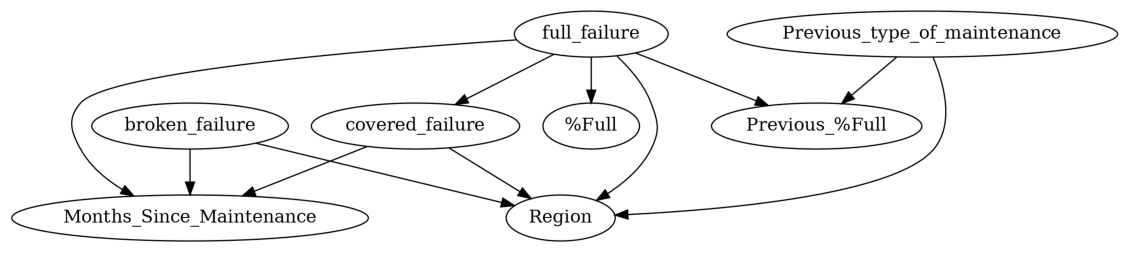

In [311]:
pyd = GraphUtils.to_pydot(LINGNAM_dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

## GOLEM

In [101]:
from castle.algorithms import GOLEM

# DirectLiNGAM learn
#golem = GOLEM()
#golem.learn(struct_data)

# Took too long

## DAG-GNN Graph Neural Network

In [102]:
from castle.algorithms import DAG_GNN


#gnn = DAG_GNN()
#gnn.learn(data=struct_data)
# Took Too long

# CausalLearn Package

In [32]:
struct_data

%Full  Region  full_failure  covered_failure  broken_failure  \
15458       1       2             0                0               0   
15460       2       2             0                0               0   
15462       2       2             0                0               0   
15464       2       2             0                0               0   
15466       2       2             0                0               0   
...       ...     ...           ...              ...             ...   
551178      4       3             0                0               0   
551179      4       3             0                0               0   
551180      2       1             0                0               0   
551181      2       1             0                0               0   
551182      2       1             0                0               0   

        Previous_%Full  Previous_type_of_maintenance  Months_Since_Maintenance  
15458                1                             0                         0  
15460                2                             0                         0  
15462                2                             0                         0  
15464                2                             0                         0  
15466                2                             0                         0  
...                ...                           ...                       ...  
551178               2                             0                         2  
551179               2                             0                         2  
551180               3                             1                         2  
551181               3                             1                         2  
551182               2                             1                         2  

[409814 rows x 8 columns]

## GES

In [33]:
from causallearn.search.ScoreBased.GES import ges
score_func = "local_score_BDeu"
ges_causallearn = ges(struct_data, score_func)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[[ 0 -1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[[ 0 -1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]]
[[ 0 -1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0 -1  0  0  0  1  0  0]
 [ 0 -1  0  0  0  0  0  0]]
[[ 0 -1  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  1  1]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [34]:
print(f"Bdeu score: {ges_causallearn['score']}")

Bdeu score: 2588771.130004384


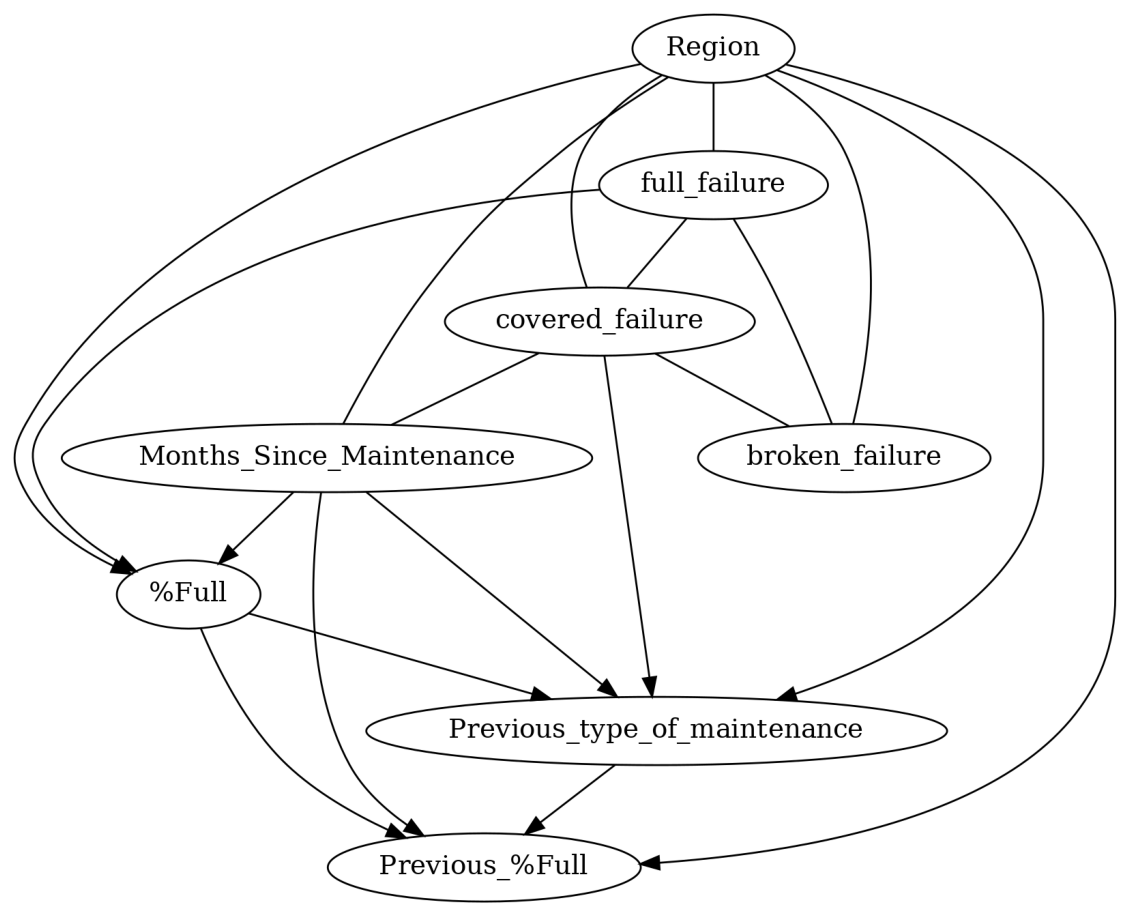

In [35]:
# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(ges_causallearn['G'],labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('GES_algorithm.png')

## PC-Stable

In [36]:
from causallearn.search.ConstraintBased.PC import pc

In [37]:
struct_array = struct_data.to_numpy()

In [38]:
pc_causallearn = pc(struct_array, alpha=0.8,stable=True, indep_test = "fisherz",verbose= False)

  0%|          | 0/8 [00:00<?, ?it/s]

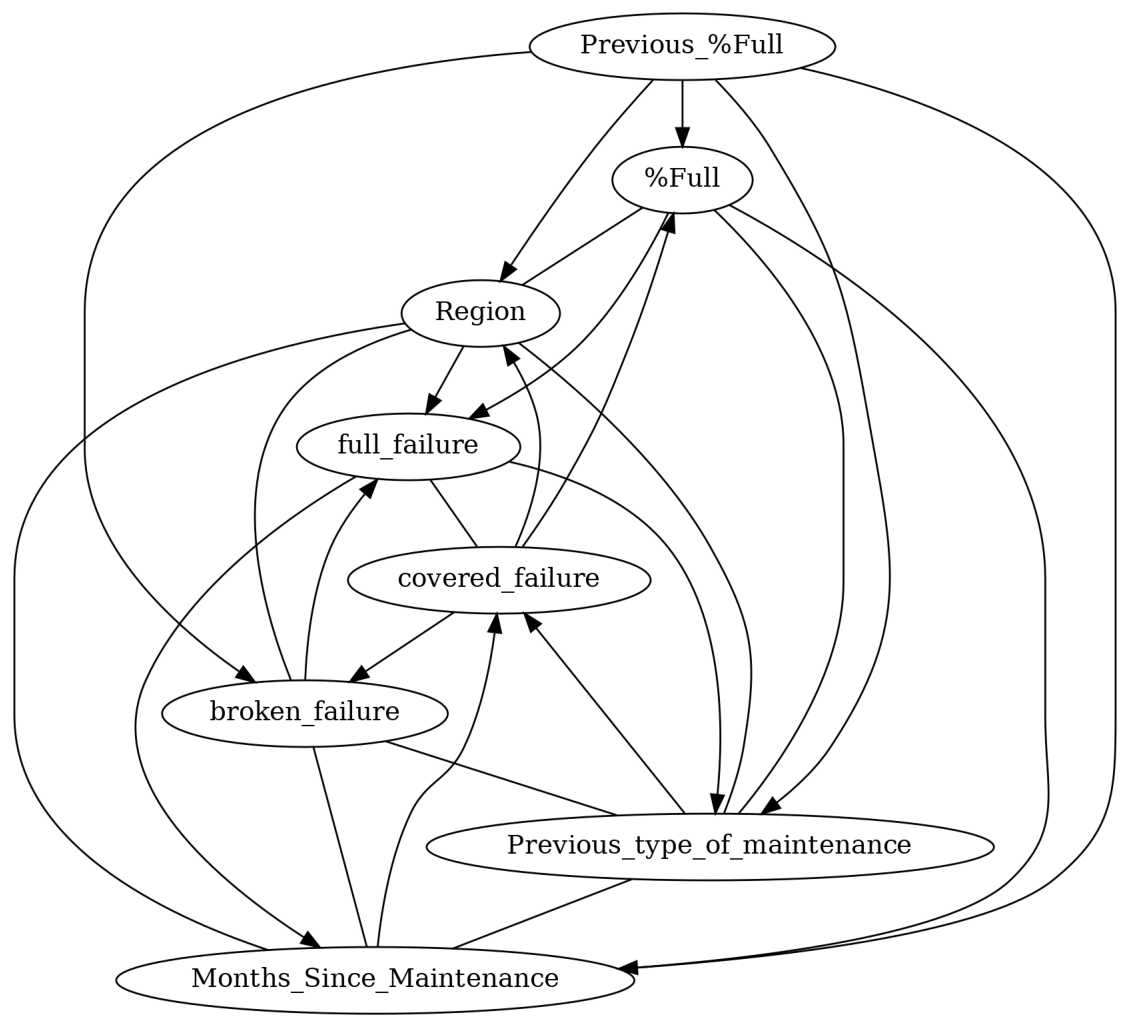

In [39]:
from matplotlib.pyplot import figure
# visualization using pydot
pyd = GraphUtils.to_pydot(pc_causallearn.G,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()
pyd.write_png('PC.png')

## FCI 

In [40]:
from causallearn.search.ConstraintBased.FCI import fci

In [41]:
struct_array = struct_data.to_numpy()

In [42]:
fci_causallearn, edges = fci(struct_array, alpha=0.8, indep_test = "fisherz",verbose= False)

  0%|          | 0/8 [00:00<?, ?it/s]

X1 --> X3
X2 --> X3
X3 --> X5
X4 --> X5
X7 --> X4
X8 --> X4
X7 --> X5
X8 --> X5


In [43]:
struct_data.columns

Index(['%Full', 'Region', 'full_failure', 'covered_failure', 'broken_failure',
       'Previous_%Full', 'Previous_type_of_maintenance',
       'Months_Since_Maintenance'],
      dtype='object')

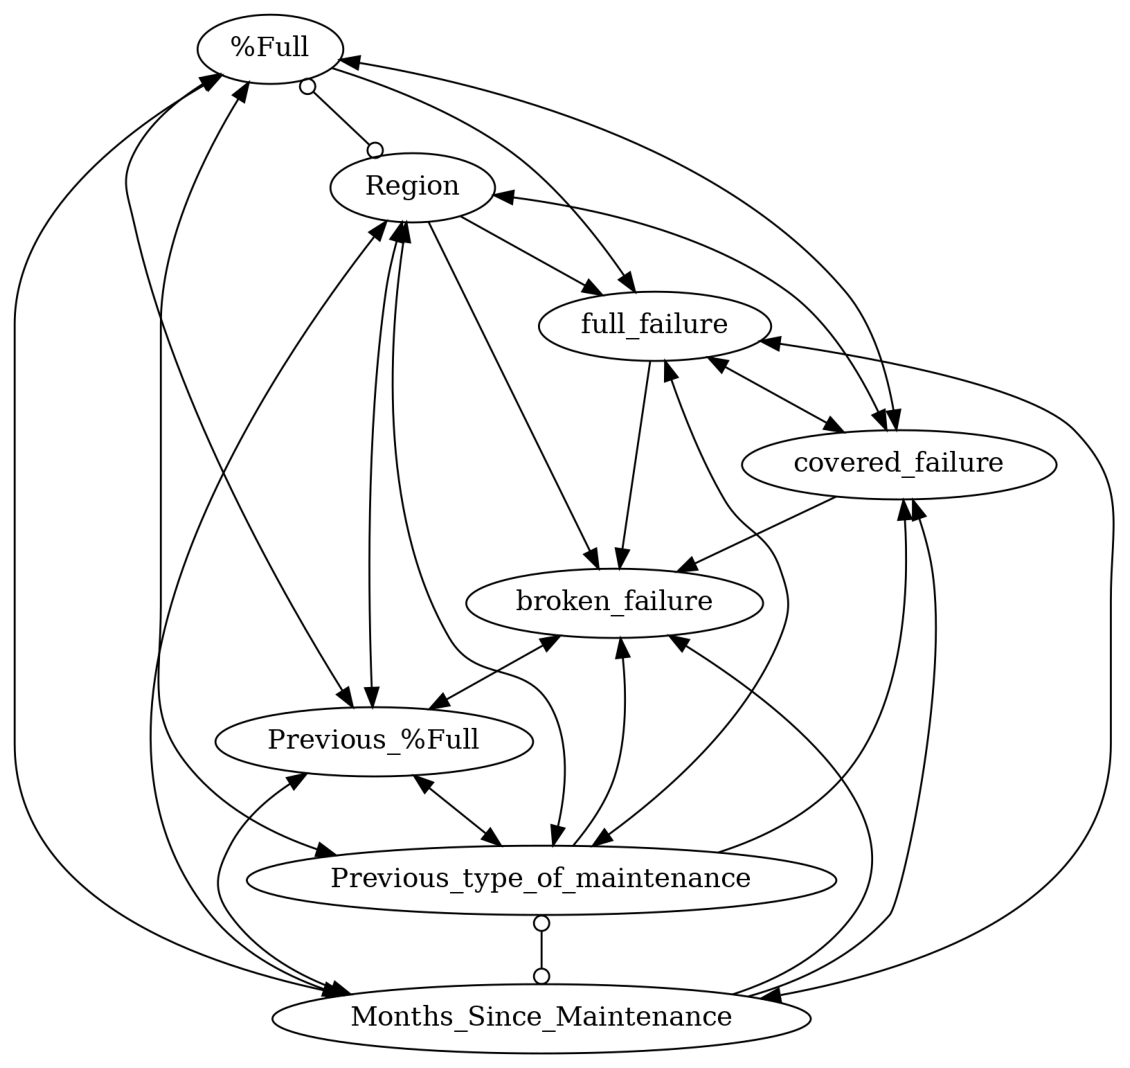

In [44]:
pyd = GraphUtils.to_pydot(fci_causallearn,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('FCI.png')

# Bnlearn

## HillClimbSearch - Bdeu

In [51]:
from causallearn.graph.Dag import Dag
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
from causallearn.graph.GraphNode import GraphNode
# Load library
import bnlearn as bn
# Load example
# Structure learning
hill_climb_bdeu_bnlearn = bn.structure_learning.fit(struct_data, methodtype='hc', scoretype='bdeu')
# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model1 = bn.independence_test(hill_climb_bdeu_bnlearn, struct_data, alpha=0.05, prune=False)
# Examine the output of the chi-square test. All P values are significant. Nothing is removed.
#    source     target     stat_test        p_value    chi_square    dof
#--  ---------  ---------  -----------  -----------  ------------  -----
# 0  Cloudy     Rain       True         1.08061e-87       394.062      1
# 1  Cloudy     Sprinkler  True         8.38371e-53       233.906      1
# 2  Rain       Wet_Grass  True         3.88651e-64       285.902      1
# 3  Sprinkler  Wet_Grass  True         1.19692e-23       100.478      1

# Plot
# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model3 = bn.independence_test(hill_climb_bdeu_bnlearn, struct_data, alpha=0.05, prune=True)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Compute edge strength with [chi_square]


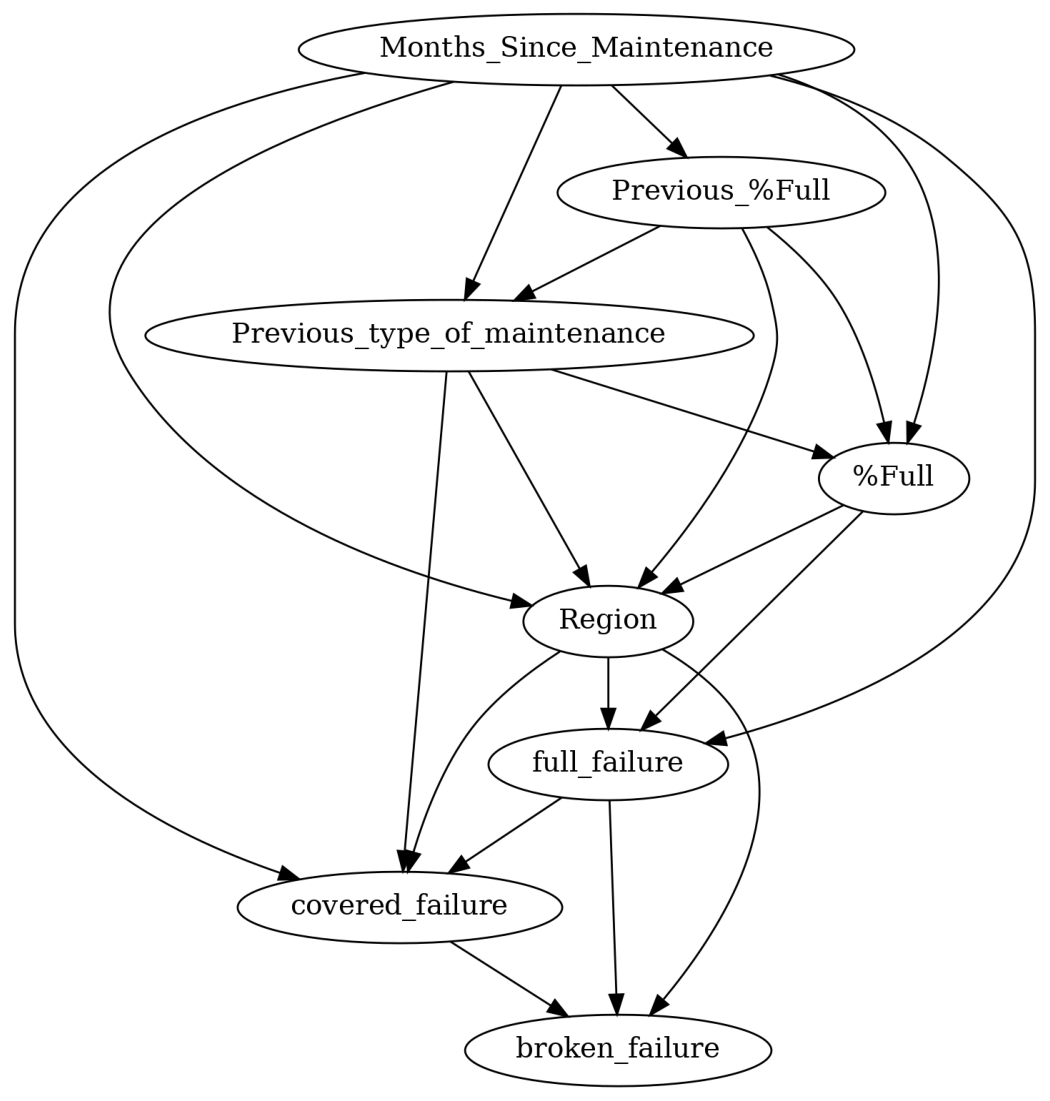

In [52]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in hill_climb_bdeu_bnlearn["model_edges"]:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('HillClimb_bdeu.png')

## Hill Climb Search BIC

In [53]:
hill_climb_bic_bnlearn = bn.structure_learning.fit(struct_data, methodtype='hc', scoretype='bic')


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


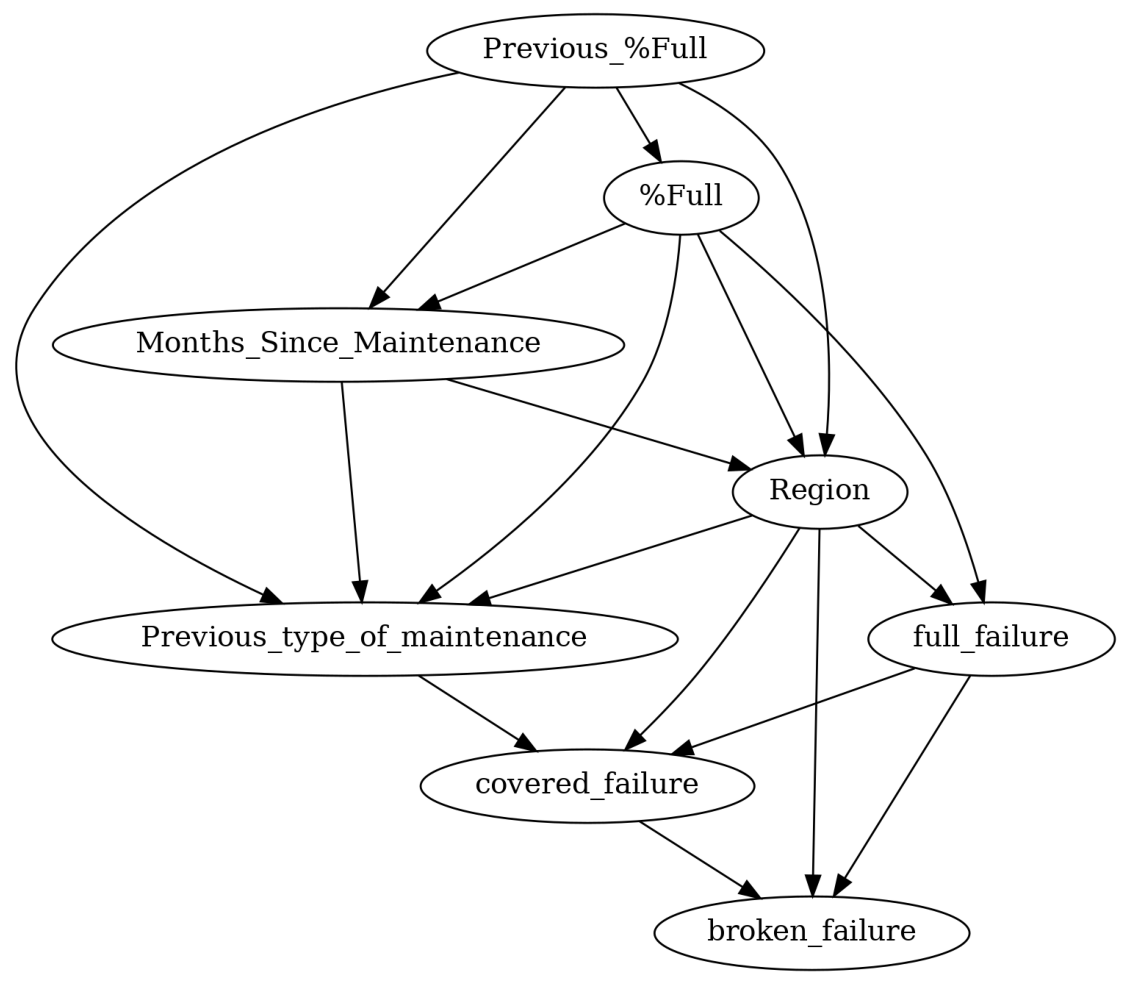

In [54]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in hill_climb_bic_bnlearn["model_edges"]:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('HillClimb_bic.png')

# Use Background Knowledge

### GCastle Background Knowledge code for reference below

In [61]:
#priori = PrioriKnowledge(struct_data.shape[1])
#priori.add_forbidden_edges(output)
#pc = PC(variant='stable',priori_knowledge=priori,alpha=0.8)

In [62]:
struct_data

%Full  Region  full_failure  covered_failure  broken_failure  \
15458       1       2             0                0               0   
15460       2       2             0                0               0   
15462       2       2             0                0               0   
15464       2       2             0                0               0   
15466       2       2             0                0               0   
...       ...     ...           ...              ...             ...   
551178      4       3             0                0               0   
551179      4       3             0                0               0   
551180      2       1             0                0               0   
551181      2       1             0                0               0   
551182      2       1             0                0               0   

        Previous_%Full  Previous_type_of_maintenance  Months_Since_Maintenance  
15458                1                             0                         0  
15460                2                             0                         0  
15462                2                             0                         0  
15464                2                             0                         0  
15466                2                             0                         0  
...                ...                           ...                       ...  
551178               2                             0                         2  
551179               2                             0                         2  
551180               3                             1                         2  
551181               3                             1                         2  
551182               2                             1                         2  

[409814 rows x 8 columns]

In [63]:
mapped = {}
for index, item in enumerate(struct_data.columns):
    mapped[item]=index
forbidden_edges = [("%Full", "Previous_%Full"),
                    ("Months_Since_Maintenance","Previous_%Full"),
                    ("%Full","Region"),
                    ("Previous_%Full", "Region"),
                    ("broken_failure","Region"),
                    ("covered_failure","Region"),
                    ("full_failure","Region"),
                    ("full_failure","Months_Since_Maintenance"),
                    ("covered_failure","Months_Since_Maintenance"),
                    ("broken_failure","Months_Since_Maintenance"),
                    ("full_failure","Previous_%Full"),
                    ("covered_failure","Previous_%Full"),
                    ("broken_failure","Previous_%Full"),
                    ("full_failure","Previous_type_of_maintenance"),
                    ("covered_failure","Previous_type_of_maintenance"),
                    ("broken_failure","Previous_type_of_maintenance")]
output = []
for item in forbidden_edges:
    output.append((mapped[item[0]],mapped[item[1]]))

In [64]:
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.graph.GraphClass import CausalGraph
cg = CausalGraph(8)
nodes = cg.G.get_nodes()

In [65]:
bk = BackgroundKnowledge()
for item in output:
    bk.add_forbidden_by_node(nodes[item[0]], nodes[item[1]])

In [66]:
struct_array = struct_data.to_numpy()

## PC - Background knowledge

In [67]:
pc_background_causallearn = pc(struct_array,alpha=0.8, indep_test = "fisherz",verbose= False, background_knowledge=bk)

  0%|          | 0/8 [00:00<?, ?it/s]

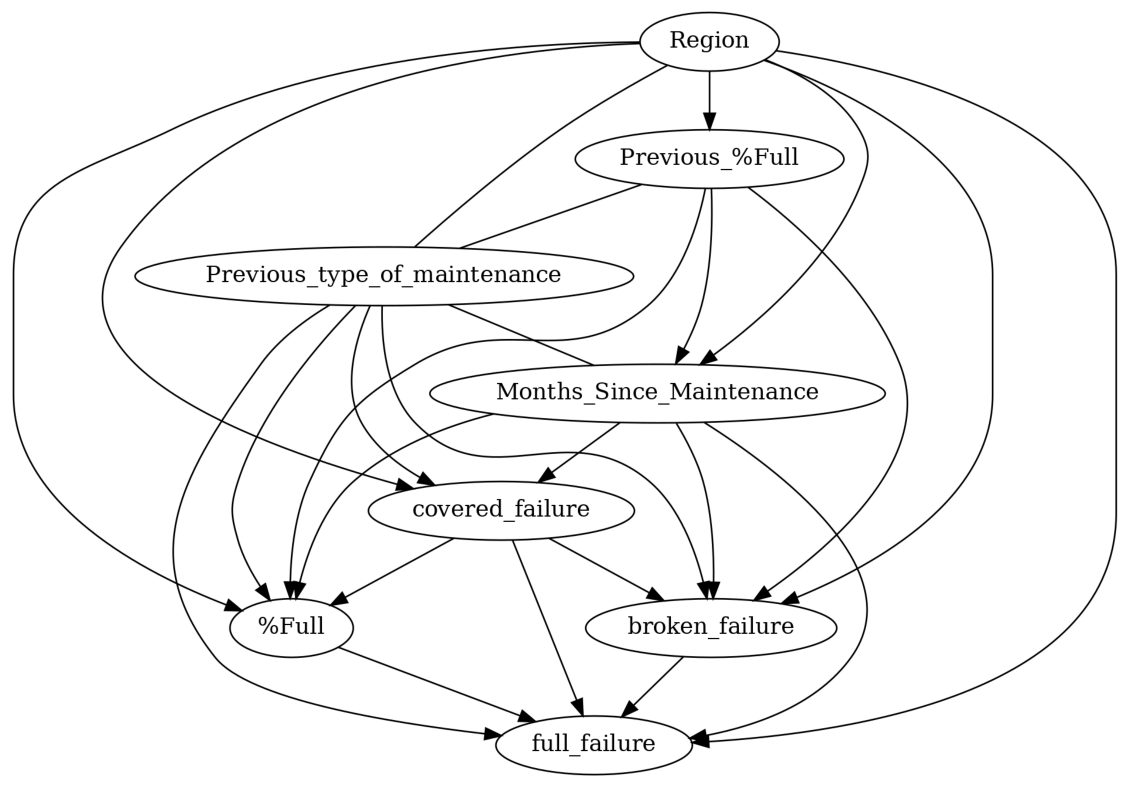

In [68]:
# visualization using pydot
pyd = GraphUtils.to_pydot(pc_background_causallearn.G,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()


pyd.write_png('PC_Background_Knowledge.png')

## FCI - Background Knowledge

In [69]:
fci_background_causallearn, edges = fci(struct_array, alpha=0.05, indep_test = "fisherz",verbose= False,background_knowledge=bk)

  0%|          | 0/8 [00:00<?, ?it/s]

Starting BK Orientation.
Orienting edge (Knowledge): X2 --> X1
Orienting edge (Knowledge): X6 --> X1
Orienting edge (Knowledge): X2 --> X3
Orienting edge (Knowledge): X2 --> X4
Orienting edge (Knowledge): X2 --> X5
Orienting edge (Knowledge): X2 --> X6
Orienting edge (Knowledge): X8 --> X3
Orienting edge (Knowledge): X7 --> X4
Orienting edge (Knowledge): X8 --> X4
Orienting edge (Knowledge): X8 --> X5
Finishing BK Orientation.
Starting BK Orientation.
Orienting edge (Knowledge): X2 --> X1
Orienting edge (Knowledge): X6 --> X1
Orienting edge (Knowledge): X2 --> X3
Orienting edge (Knowledge): X2 --> X4
Orienting edge (Knowledge): X2 --> X5
Orienting edge (Knowledge): X2 --> X6
Orienting edge (Knowledge): X8 --> X3
Orienting edge (Knowledge): X7 --> X4
Orienting edge (Knowledge): X8 --> X4
Orienting edge (Knowledge): X8 --> X5
Finishing BK Orientation.
X6 --> X1
X4 --> X3
X4 --> X5


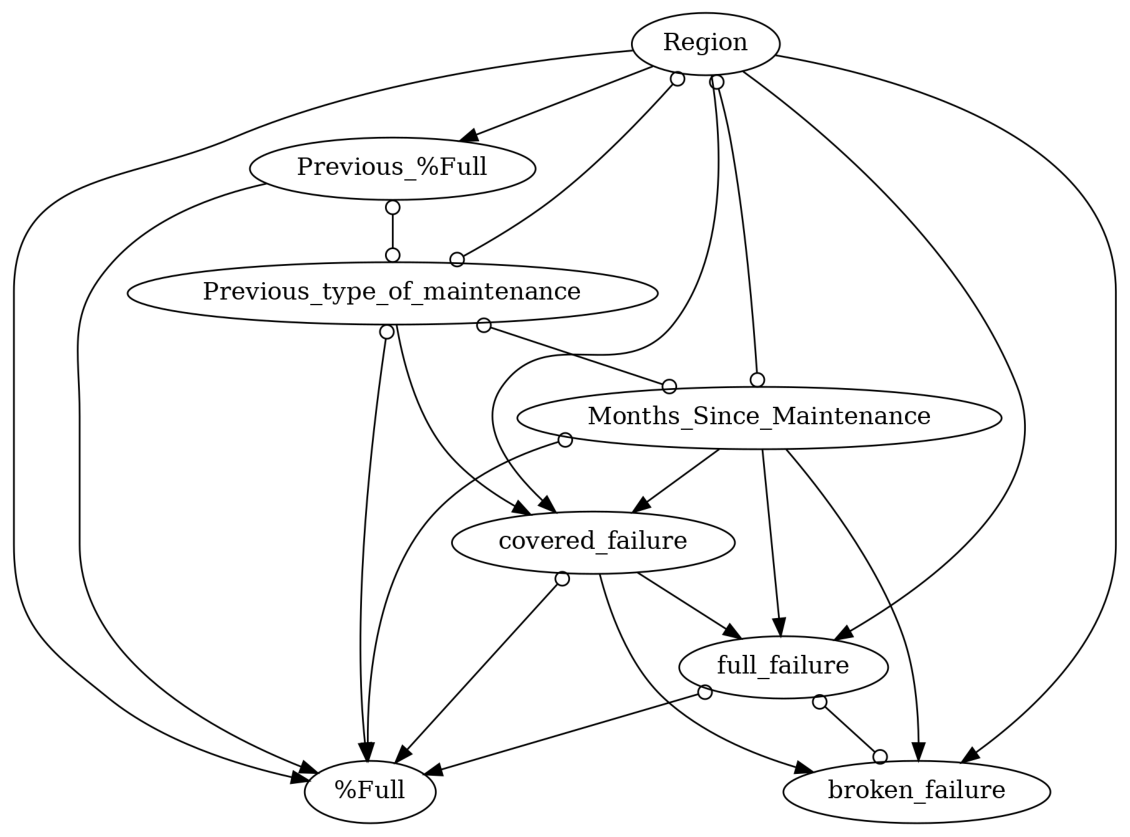

In [70]:
# visualization using pydot
pyd = GraphUtils.to_pydot(fci_background_causallearn,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()


pyd.write_png('simple_test.png')

## HC - Background Knowledge - Bdeu

In [71]:
forbidden_edges

[('%Full', 'Previous_%Full'),
 ('Months_Since_Maintenance', 'Previous_%Full'),
 ('%Full', 'Region'),
 ('Previous_%Full', 'Region'),
 ('broken_failure', 'Region'),
 ('covered_failure', 'Region'),
 ('full_failure', 'Region'),
 ('full_failure', 'Months_Since_Maintenance'),
 ('covered_failure', 'Months_Since_Maintenance'),
 ('broken_failure', 'Months_Since_Maintenance'),
 ('full_failure', 'Previous_%Full'),
 ('covered_failure', 'Previous_%Full'),
 ('broken_failure', 'Previous_%Full'),
 ('full_failure', 'Previous_type_of_maintenance'),
 ('covered_failure', 'Previous_type_of_maintenance'),
 ('broken_failure', 'Previous_type_of_maintenance')]

In [72]:
required_edges = [('Previous_%Full', '%Full'),
 ('Region', '%Full'),
 ('Region', 'Previous_%Full'),
 ('Region', 'broken_failure'),
 ('Region', 'covered_failure'),
 ('Region', 'full_failure'),
 ('Months_Since_Maintenance', 'full_failure'),
 ('Months_Since_Maintenance', 'covered_failure'),
 ('Previous_%Full', 'full_failure'),
 ('Previous_type_of_maintenance', 'full_failure'),
 ('Region','Previous_type_of_maintenance'),
 ('Region','Months_Since_Maintenance')            
]

In [73]:
hill_climb_background_bnlearn_bdeu = bn.structure_learning.fit(struct_data, methodtype='hc', scoretype='bdeu',fixed_edges=required_edges)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).


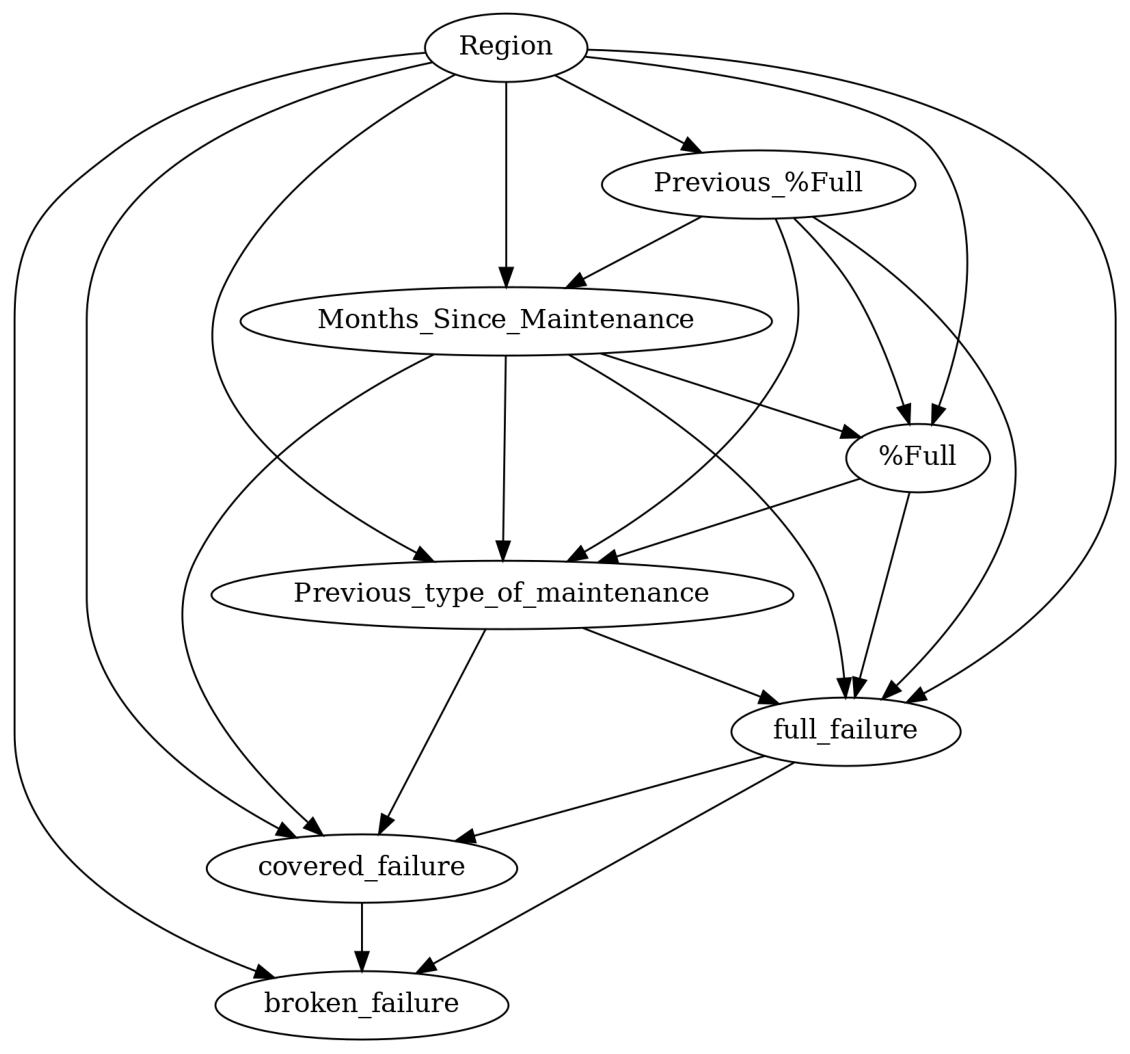

In [74]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in hill_climb_background_bnlearn_bdeu["model_edges"]:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('HillClimb__bdeu_background.png')

## HC - Background Knowledge - BIC

In [627]:
hill_climb_background_bnlearn_bic = bn.structure_learning.fit(struct_data, methodtype='hc', scoretype='bic',fixed_edges=required_edges)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


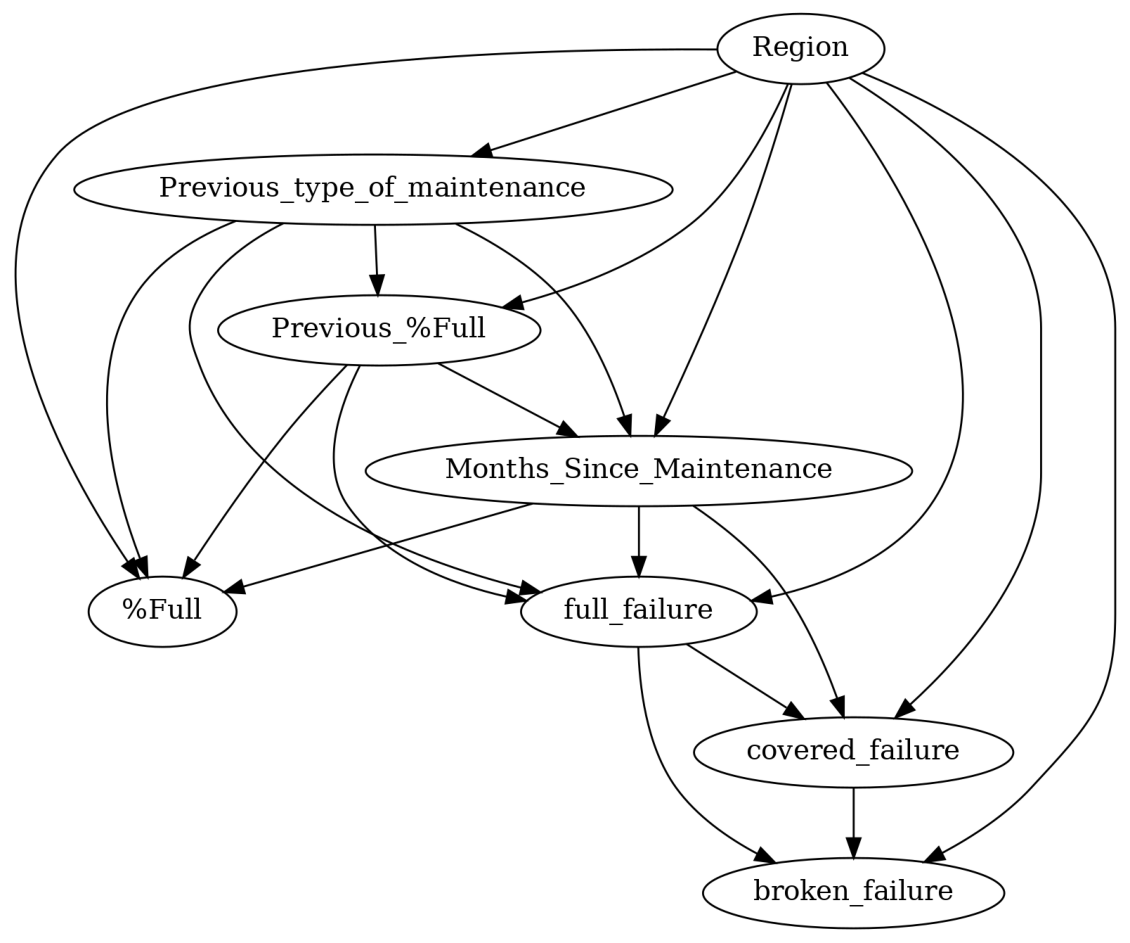

In [628]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in hill_climb_background_bnlearn_bic["model_edges"]:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('HillClimb_background_bic_full.png')

# Functions to convert Causal Learn dags into gcastle tensor objects - This enables comparison between DAGs

In [77]:
def create_broken_down_edges(dag):
    """
    Takes a causallearn data object and outputs the edges and edge types 
    Input: causallearn graph dag
    output: list of lists of tupes [[(Node1,type_of_connection1)),(Node2,type_of_connection2)],]
    """
    # Get Edges
    edges = dag.get_graph_edges()
    
    # Break edges down into node 1 and node 2
    broken_down_edges = []
    for edge in edges:
        broken_down_edges.append([(edge.get_node1().name,edge.get_numerical_endpoint1()),(edge.get_node2().name,edge.get_numerical_endpoint2())])
    
    return broken_down_edges

In [78]:
def create_mapping(dag,struct_data):
    # Create Mapping dict
    mapping = {}
    try:
        if isinstance(dag.get_node_names()[0],str) == True:
            for i, c in enumerate(dag.get_node_names()):
                mapping[c] = i
        else:
            for i, c in enumerate(struct_data):
                mapping[c] = i
    except:
        for i, c in enumerate(struct_data):
                mapping[c] = i
    return mapping

In [79]:
from castle.common import Tensor
def create_matrix_from_edge_list(struct_data,broken_down_edges,mapping):
    """
    The PC implemented in GCastle and the PC implemented in causallearn is different and should be treated differently. The same goes for hill climb. 
    In th Gcastle version of PC there are no -1 values. In the causallearn version there are, this may be due to different implementation. I will use the CausalLearn one. 
    When it comes to the hill climb algorithm, it outputs a DAG meaning there is no need to have the -1 values and this will create an even DAG and everything will add up to 0.
    I need to add an exception to this.
    All Algorithms that output just DAG's need to have only the outbound edges active.
    """
    # Create 2d list 
    positions = [[0 for j in range(len(list(mapping.keys())))] for i in range(len(list(mapping.keys())))]
    # Iterate through edges and apply the correct links to the tensor
    for index, column in enumerate(list(mapping.keys())):
        # find all outband edges 
        for item in broken_down_edges:
            if item[0][0] == column:
                y = mapping[item[0][0]]
                x = mapping[item[1][0]]
                positions[y][x] = item[1][1]
        # find all inbound edges
        for item in broken_down_edges:
            if item[1][0] == column:
                y = mapping[item[0][0]]
                x = mapping[item[1][0]]
                positions[x][y] = item[0][1]
        
    #turn the list into array
    m = np.asarray(positions)
    output = Tensor(m)
    return output

# Create Manually Classified Truth DAG

In [80]:
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.graph.GraphClass import CausalGraph
from causallearn.utils.PCUtils.BackgroundKnowledgeOrientUtils import orient_by_background_knowledge
cg = CausalGraph(9)
nodes = cg.G.get_nodes()

In [81]:
from causallearn.graph.Dag import Dag
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
from causallearn.graph.GraphNode import GraphNode

mapped = {}
for index, item in enumerate(struct_data.columns):
    mapped[item]=index
required_edges = [("Region","Months_Since_Maintenance"),
                  ("Region","full_failure"),
                  ("Region","covered_failure"),
                  ("Region","Previous_%Full"),
                  ("Region","broken_failure"),
                  ("Region","%Full"),
                  ("Region","Previous_type_of_maintenance"),
                  ("Months_Since_Maintenance","full_failure"),
                  ("Months_Since_Maintenance","covered_failure"),
                  ("Months_Since_Maintenance","%Full"),
                  ("Previous_%Full","%Full"),
                  ("Previous_%Full","full_failure"),
                  ("Previous_%Full","Months_Since_Maintenance"),
                  ("%Full","full_failure"),
                  ("Previous_%Full","Previous_type_of_maintenance"),
                  ("Previous_type_of_maintenance","full_failure"),
                  ("Previous_type_of_maintenance","%Full"),
                  ("Previous_type_of_maintenance","Months_Since_Maintenance")]
output = []
for item in required_edges:
    output.append((mapped[item[0]],mapped[item[1]]))
    
    
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in required_edges:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)

In [82]:
truth_dag = dag

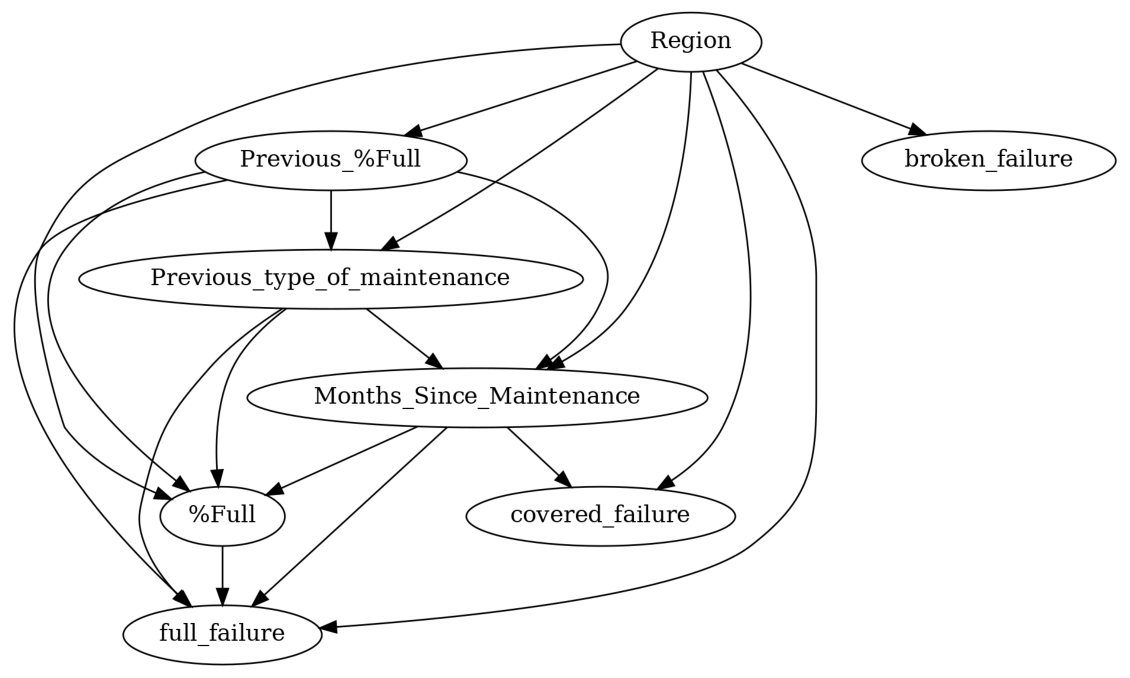

In [83]:
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('human_intuition.png')

In [84]:
broken_down_edges = create_broken_down_edges(dag)
mapping = create_mapping(dag,struct_data)
output_truth_matrix = create_matrix_from_edge_list(struct_data,broken_down_edges,mapping)

In [85]:
output_truth_matrix

Tensor([[ 0, -1,  1,  0,  0, -1, -1, -1],
        [ 1,  0,  1,  1,  1,  1,  1,  1],
        [-1, -1,  0,  0,  0, -1, -1, -1],
        [ 0, -1,  0,  0,  0,  0,  0, -1],
        [ 0, -1,  0,  0,  0,  0,  0,  0],
        [ 1, -1,  1,  0,  0,  0,  1,  1],
        [ 1, -1,  1,  0,  0, -1,  0,  1],
        [ 1, -1,  1,  1,  0, -1, -1,  0]])

# Comparing all causal diagrams and plotting the results

In [86]:
all_graphs = {'causallearn GES':ges_causallearn,
                            'causallearn PC':pc_causallearn,
                            'causallearn FCI':fci_causallearn,
                            'bnlearn HC bdeu':hill_climb_bdeu_bnlearn,
                            'bnlearn HC bic':hill_climb_bic_bnlearn,
                            'causallearn PC background':pc_background_causallearn,
                            'causallearn FCI background':fci_background_causallearn,
                            'bnlearn HC bdeu background':hill_climb_background_bnlearn_bdeu,
                            'bnlearn HC bic background':hill_climb_background_bnlearn_bic}

In [280]:
output_matrices = {"algorithm":[],"matrix":[]}
for key,value in zip(all_graphs.keys(),all_graphs.values()):
    if key.find('causallearn')!= -1:
        print(key)
        if key.find('causallearn GES')!= -1:
            broken_down_edges = create_broken_down_edges(value['G'])
            mapping = create_mapping(value['G'],struct_data)
            output_matrix = create_matrix_from_edge_list(struct_data,broken_down_edges,mapping)
            output_matrices["algorithm"].append(key)
            output_matrices["matrix"].append(output_matrix)
        elif key.find('causallearn PC')!= -1:
            broken_down_edges = create_broken_down_edges(value.G)
            mapping = create_mapping(value.G,struct_data)
            output_matrix = create_matrix_from_edge_list(struct_data,broken_down_edges,mapping)
            output_matrices["algorithm"].append(key)
            output_matrices["matrix"].append(output_matrix)
        else:
            broken_down_edges = create_broken_down_edges(value)
            mapping = create_mapping(value,struct_data)
            output_matrix = create_matrix_from_edge_list(struct_data,broken_down_edges,mapping)
            output_matrices["algorithm"].append(key)
            output_matrices["matrix"].append(output_matrix)
    elif key.find("gcastle") != -1:
        print(key)
        output_matrix = value.causal_matrix
        output_matrices["algorithm"].append(key)
        output_matrices["matrix"].append(output_matrix)
    else:
        print(key)
        mapping = create_mapping(value,struct_data)
        broken_down_edges = []
        for item in value["model_edges"]:
            broken_down_edges.append([(item[0],-1),(item[1],1)])
        output_matrix = create_matrix_from_edge_list(struct_data,broken_down_edges,mapping)
        output_matrices["algorithm"].append(key)
        output_matrices["matrix"].append(output_matrix)

causallearn GES
causallearn PC
causallearn FCI
bnlearn HC bdeu
bnlearn HC bic
causallearn PC background
causallearn FCI background
bnlearn HC bdeu background
bnlearn HC bic background


In [88]:
def compute_metrics(truth_matrix,matrix):
    finished_edges = []
    shd=0
    edges=0
    truth_edges = 0
    accurate_matches=0
    innacurate_matches=0
    fp = 0
    fn = 0
    tp = 0
    tn = 0 
    # Calculate number of edges in truth dag 
    for index_y,item_y in enumerate(truth_matrix):
        for index_x,node_x in enumerate(item_y):
            if str(index_x) + str(index_y) in finished_edges:
                pass
            else:
                finished_edges.append(str(index_y)+str(index_x))
                edge_truth = (node_x,truth_matrix[index_x][index_y])
                # If edge present, count it 
                if edge_truth[0] != 0 or edge_truth[1]!= 0:
                    truth_edges +=1
                else:
                    pass
    
    finished_edges = []
    for index_y,item_y in enumerate(matrix):
        for index_x,node_x in enumerate(item_y):
            if str(index_x) + str(index_y) in finished_edges:
                pass
            else:
                finished_edges.append(str(index_y)+str(index_x))
                edge_test = (node_x,matrix[index_x][index_y])
                edge_truth = (truth_matrix[index_y][index_x],truth_matrix[index_x][index_y])
                # If complete match - no edge = no edge
                if edge_truth[0] == 0 and edge_truth[1]==0 and edge_test[0] == 0 and edge_test[1]==0:
                    shd+=0
                    tn+=1
                    accurate_matches+=1 
                else:
                    # Matching edge shd+=0
                    if (edge_test[0] == edge_truth[0]) & (edge_test[1] == edge_truth[1]):
                        shd+=0
                        edges+=1
                        accurate_matches+=1 
                        tp+= 1
                    elif edge_test[0] != 0 or edge_test[1] !=0:
                        # If true edge A->B and learnt edge A<-B, A-B, A<->B - shd+=0.5
                        # If true edge B->A and learnt edge B<-A, A-B, A<->B - shd+=0.5
                        if edge_truth[0] != 0 or edge_truth[1] != 0:
                            shd+=0.5
                            edges+=1
                            innacurate_matches +=0.5
                            fp+=0.5
                            fn+=0.5
                        # False Positive - No match 
                        elif edge_truth[0] == 0 and edge_truth[1]==0:
                            fp+=1
                            innacurate_matches +=1
                            shd+=1
                            edges+=1
                    # No edge in test, edge in truth 
                    elif edge_test[0] == 0 and edge_test[1] == 0:
                        if edge_truth[0] != 0 or edge_truth[1] != 0:
                            shd+=1
                            innacurate_matches += 1
                            fn+=1
                        else: 
                            print("here")
    truth_matrix

    accuracy = accurate_matches/(accurate_matches+innacurate_matches)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    F1 = tp/(tp+0.5*(fp+fn))
    output_dict = {}
    output_dict["shd"] = shd
    output_dict["edges"] = edges
    output_dict["accuracy"] = accuracy 
    output_dict["precision"] = precision
    output_dict["recall"] = recall
    output_dict["F1"]= F1
    i = ((len(matrix)*(len(matrix)-1))/2) - truth_edges
    output_dict["bsf"] = 0.5*((tp/edges)+ (tn/i) - (fp/i) - (fn/edges))
    #print(f'tp:{tp},tn:{tn},fp:{fp},fn:{fn}')
    return output_dict 

In [281]:
count = 0
output_dict = {'algorithm':[],'shd': [], 'edges': [], 'accuracy': [], 'precision': [], 'recall': [], 'F1': [],'bsf':[]}
for algo,matrix in zip(output_matrices["algorithm"],output_matrices["matrix"]):
    output = compute_metrics(output_truth_matrix,matrix)
    output['algorithm'] = algo
    for item in output.keys():
        output_dict[item].append(output[item])

In [289]:
data = pd.DataFrame(output_dict)

In [290]:
data

algorithm   shd  edges  accuracy  precision    recall  \
0             causallearn GES  12.5     19  0.590164   0.296296  0.320000   
1              causallearn PC  14.5     25  0.524590   0.307692  0.480000   
2             causallearn FCI  15.5     25  0.474576   0.216216  0.347826   
3             bnlearn HC bdeu   9.0     20  0.727273   0.588235  0.666667   
4              bnlearn HC bic  11.0     18  0.666667   0.533333  0.533333   
5   causallearn PC background  10.5     25  0.695652   0.595745  0.848485   
6  causallearn FCI background  12.5     21  0.615385   0.457143  0.551724   
7  bnlearn HC bdeu background   5.0     22  0.857143   0.761905  0.941176   
8   bnlearn HC bic background   4.5     20  0.873239   0.820513  0.914286   

         F1       bsf  
0  0.307692  0.106579  
1  0.375000 -0.185000  
2  0.266667 -0.295000  
3  0.625000  0.475000  
4  0.533333  0.377778  
5  0.700000  0.255000  
6  0.500000  0.160714  
7  0.842105  0.790909  
8  0.864865  0.937500

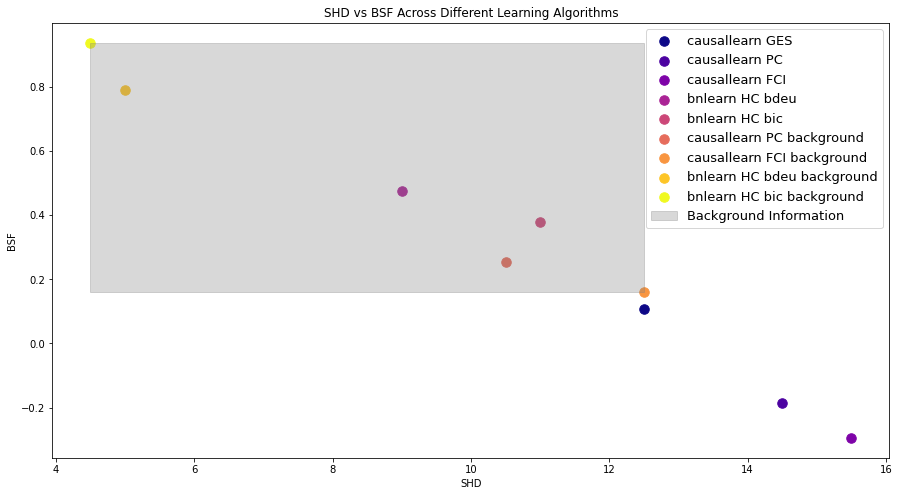

In [308]:
import matplotlib.pyplot as plt
import numpy as np

x = data["shd"]
y = data["bsf"]
plt.figure(figsize=(15, 8))

# Create the scatter plot with different colors for each point
#for i, algorithm in zip(range(len(x)),data["algorithm"]):
#    plt.scatter(x[i], y[i], color=plt.cm.viridis(i/ len(x)), label=algorithm)

# Generate a list of unique colors
unique_colors = plt.cm.plasma(np.linspace(0, 1, len(data)))

for i, algorithm in zip(range(len(x)), data["algorithm"]):
    plt.scatter(x[i], y[i], color=unique_colors[i], label=algorithm,s=90)

# Define the shaded regions
x_shade = [data[data["algorithm"].str.find("background")!=-1]["shd"].min(),data[data["algorithm"].str.find("background")!=-1]["shd"].max()]
y_upper = data[data["algorithm"].str.find("background")!=-1]["bsf"].max()
y_lower = data[data["algorithm"].str.find("background")!=-1]["bsf"].min()

# Fill the shaded regions
plt.fill_between(x_shade, y_lower, y_upper, color='gray', alpha=0.3, label='Background Information')

# Add labels and title
plt.xlabel('SHD')
plt.ylabel('BSF')
plt.title('SHD vs BSF Across Different Learning Algorithms')
plt.legend(prop={'size': 13})
plt.savefig("dag_comparison.png")
# Show the ploto
plt.show()

# Learn Parameters using the bnlearn Parameter Learning functionality 

### Convert a Causal Learn DAG to a bnlearn DAG

Best graph is hill_climb_background_bnlearn_bic

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


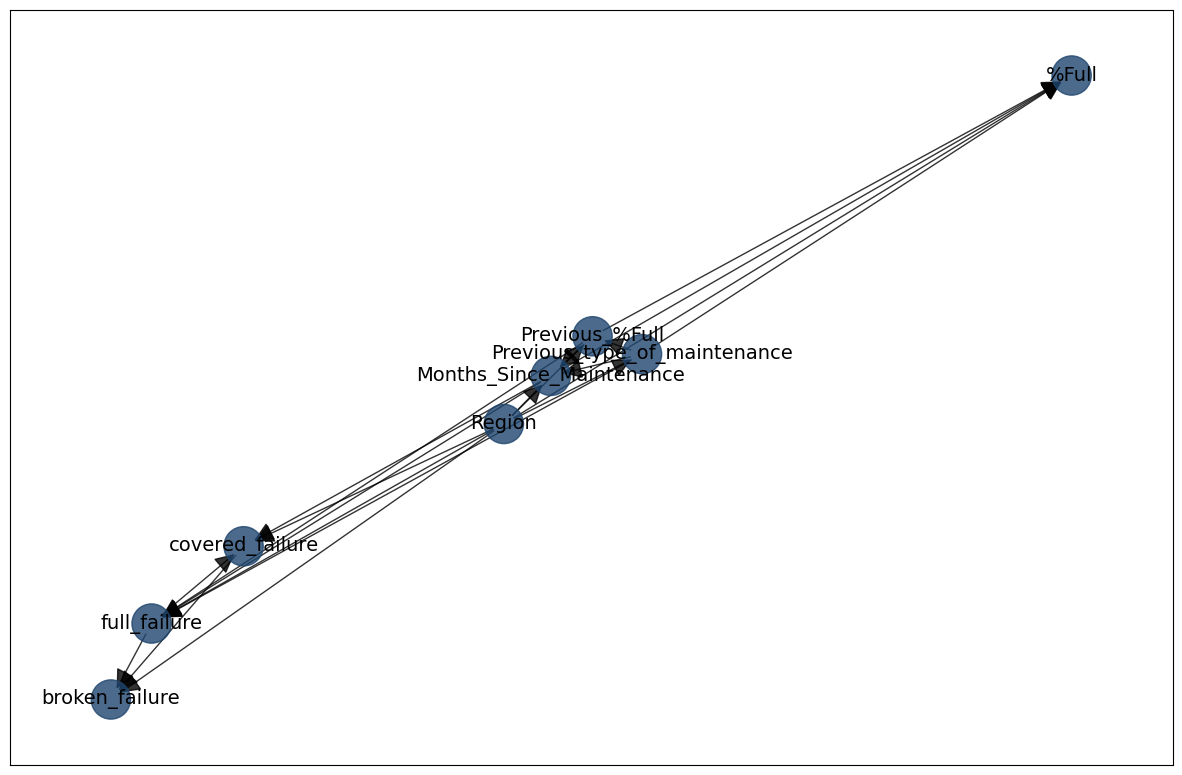

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Region:
+-----------+-----------+
| Region(1) | 0.344324  |
+-----------+-----------+
| Region(2) | 0.294868  |
+-----------+-----------+
| Region(3) | 0.184013  |
+-----------+-----------+
| Region(4) | 0.116644  |
+-----------+-----------+
| Region(5) | 0.0601513 |
+-----------+-----------+
[bnlearn] >CPD of Months_Since_Maintenance:
+------------------------------+-----+---------------------------------+
| Previous_%Full               | ... | Previous_%Full(4)               |
+------------------------------+-----+---------------------------------+
| Previous_type_of_maintenance | ... | Previous_type_of_maintenance(1) |
+------------------------------+-----+---------------------------------+
| Region                       | ... | Region(5)                       |
+------------------------------+-----+---------------------------------+
| Months_Since_Maintenance(0)  | ... | 0.2762762762762763          

In [93]:
#edges = [('A', 'B'), ('A', 'C'), ('A', 'D')]
# Create DAG and store in model
model = bn.make_DAG(hill_climb_background_bnlearn_bic["model_edges"])
bn.plot(model)
DAG_update = bn.parameter_learning.fit(model, struct_data)

In [94]:
struct_data["Region"].value_counts()

1    141253
2    120936
3     75395
4     47719
5     24511
Name: Region, dtype: int64

# Intervention Analysis

### Does the time to maintenance effect failure rates?

In [95]:
months_mapping = {0:"0-3",1:"4-6",2:"7-9",3:"10-12",4:"13-15",5:"16-18",6:"19-21",7:"22-24",8:">24"}

In [602]:
output_dict = {"Months":[],"Probability_of_broken_failure":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}
for i in range(0,9):
    q1 = bn.inference.fit(DAG_update, variables=['broken_failure'], evidence={"Months_Since_Maintenance":i})
    df1 = q1.df
    output_dict["Probability_of_broken_failure"].append(df1[df1["broken_failure"]==1]["p"][1])

    q2 = bn.inference.fit(DAG_update, variables=['full_failure'], evidence={"Months_Since_Maintenance":i})
    df2 = q2.df
    output_dict["Probability_of_full_failure"].append(df2[df2["full_failure"]==1]["p"][1])

    q3 = bn.inference.fit(DAG_update, variables=['covered_failure'], evidence={"Months_Since_Maintenance":i})
    df3 = q3.df
    output_dict["Probability_of_covered_failure"].append(df3[df3["covered_failure"]==1]["p"][1])
    
    output_dict["Months"].append(months_mapping[i])

[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.995201   |
+----+------------------+------------+
|  1 |                1 | 0.00479857 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994018   |
+----+----------------+------------+
|  1 |              1 | 0.00598214 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.988409  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0115915 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.997454   |
+----+------------------+------------+
|  1 |                1 | 0.00254568 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.998043  |
+----+----------------+-----------+
|  1 |              1 | 0.0019574 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.994954  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0050462 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.997853   |
+----+------------------+------------+
|  1 |                1 | 0.00214654 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998703   |
+----+----------------+------------+
|  1 |              1 | 0.00129719 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.997007   |
+----+-------------------+------------+
|  1 |                 1 | 0.00299314 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998211   |
+----+------------------+------------+
|  1 |                1 | 0.00178864 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998698   |
+----+----------------+------------+
|  1 |              1 | 0.00130193 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.997638   |
+----+-------------------+------------+
|  1 |                 1 | 0.00236214 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998213   |
+----+------------------+------------+
|  1 |                1 | 0.00178655 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998976   |
+----+----------------+------------+
|  1 |              1 | 0.00102403 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.997917   |
+----+-------------------+------------+
|  1 |                 1 | 0.00208256 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.997227   |
+----+------------------+------------+
|  1 |                1 | 0.00277322 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997652   |
+----+----------------+------------+
|  1 |              1 | 0.00234849 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.996166   |
+----+-------------------+------------+
|  1 |                 1 | 0.00383412 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996135   |
+----+------------------+------------+
|  1 |                1 | 0.00386478 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.99539    |
+----+----------------+------------+
|  1 |              1 | 0.00461024 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.993687   |
+----+-------------------+------------+
|  1 |                 1 | 0.00631327 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994507   |
+----+------------------+------------+
|  1 |                1 | 0.00549305 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.991144   |
+----+----------------+------------+
|  1 |              1 | 0.00885634 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.989444  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0105565 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.995037   |
+----+------------------+------------+
|  1 |                1 | 0.00496312 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.992642   |
+----+----------------+------------+
|  1 |              1 | 0.00735797 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.991888   |
+----+-------------------+------------+
|  1 |                 1 | 0.00811192 |
+----+-------------------+------------+


In [603]:
output = pd.DataFrame(output_dict)

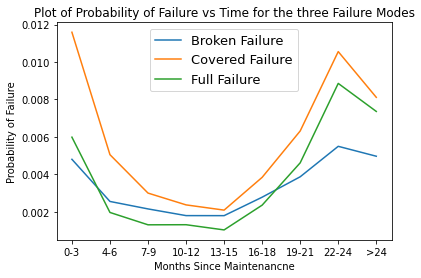

In [604]:
plt.plot(output["Months"],output["Probability_of_broken_failure"],label='Broken Failure')
plt.plot(output["Months"],output["Probability_of_covered_failure"],label='Covered Failure')
plt.plot(output["Months"],output["Probability_of_full_failure"],label='Full Failure')
plt.legend()
plt.xlabel("Months Since Maintenancne")
plt.ylabel("Probability of Failure")
plt.title("Plot of Probability of Failure vs Time for the three Failure Modes")
plt.legend(prop={'size': 13})
plt.savefig("failure vs time full data full data.png")

In [99]:
output[output["Months"].isin(["0-3","4-6","7-9","10-12"])]["Probability_of_full_failure"].sum()

0.010538669387569994

In [100]:
one_year = ["0-3","4-6","7-9","10-12"]
two_years = ["0-3","4-6","7-9","10-12","13-15","16-18","19-21","22-24"]
full_failure_within_one_year = output[output["Months"].isin(one_year)]["Probability_of_full_failure"].sum()
covered_failure_within_one_year = output[output["Months"].isin(one_year)]["Probability_of_covered_failure"].sum()
full_failure_within_two_years = output[output["Months"].isin(two_years)]["Probability_of_full_failure"].sum() 
covered_failure_within_two_years = output[output["Months"].isin(two_years)]["Probability_of_covered_failure"].sum()

In [101]:
failure_within_one_year_broken = output[output["Months"].isin(one_year)]["Probability_of_broken_failure"].sum()
failure_within_two_years_broken = output[output["Months"].isin(two_years)]["Probability_of_broken_failure"].sum()

In [102]:
print(f"Probability of at least one full failure within one year: {full_failure_within_one_year}")
print(f"Probability of at least one covered failure within one year: {covered_failure_within_one_year}")
print(f"Probability of at least one broken failure within one year: {failure_within_one_year_broken}")

Probability of at least one full failure within one year: 0.010538669387569994
Probability of at least one covered failure within one year: 0.021992957670004806
Probability of at least one broken failure within one year: 0.011279427848081721


In [103]:
full_failure_within_one_year+covered_failure_within_one_year+failure_within_one_year_broken

0.043811054905656524

In [104]:
print(f"Probability of at least one full failure within two years: {full_failure_within_two_years}")
print(f"Probability of at least one covered failure within two years: {covered_failure_within_two_years}")
print(f"Probability of at least one broken failure within two years: {failure_within_two_years_broken}")

Probability of at least one full failure within two years: 0.027377769347203002
Probability of at least one covered failure within two years: 0.04477939976316041
Probability of at least one broken failure within two years: 0.02519703068544281


In [105]:
full_failure_within_two_years+covered_failure_within_two_years+failure_within_two_years_broken

0.09735419979580621

### Is previous percentage full predictive of future percentage full?

In [316]:
output_dict = {"Previous_%Full":[],"%Full_Predicted":[],"Probability_of_%Full":[]}
for i in range(0,5):
    q1 = bn.inference.fit(DAG_update, variables=['%Full'], evidence={"Previous_%Full":i,"Previous_type_of_maintenance":1})
    df1 = q1.df
    for index, row in df1.iterrows():
        output_dict["Probability_of_%Full"].append(row["p"])
        output_dict["Previous_%Full"].append(i)
        output_dict["%Full_Predicted"].append(row["%Full"])

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0773315 |
+----+---------+-----------+
|  1 |       1 | 0.335197  |
+----+---------+-----------+
|  2 |       2 | 0.36073   |
+----+---------+-----------+
|  3 |       3 | 0.103259  |
+----+---------+-----------+
|  4 |       4 | 0.123482  |
+----+---------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0515445 |
+----+---------+-----------+
|  1 |       1 | 0.363117  |
+----+---------+-----------+
|  2 |       2 | 0.319097  |
+----+---------+-----------+
|  3 |       3 | 0.133279  |
+----+---------+-----------+
|  4 |       4 | 0.132963  |
+----+---------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0502213 |
+----+---------+-----------+
|  1 |       1 | 0.348893  |
+----+---------+-----------+
|  2 |       2 | 0.320966  |
+----+---------+-----------+
|  3 |       3 | 0.148531  |
+----+---------+-----------+
|  4 |       4 | 0.131388  |
+----+---------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0555729 |
+----+---------+-----------+
|  1 |       1 | 0.350297  |
+----+---------+-----------+
|  2 |       2 | 0.315642  |
+----+---------+-----------+
|  3 |       3 | 0.159382  |
+----+---------+-----------+
|  4 |       4 | 0.119107  |
+----+---------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0490849 |
+----+---------+-----------+
|  1 |       1 | 0.302413  |
+----+---------+-----------+
|  2 |       2 | 0.246464  |
+----+---------+-----------+
|  3 |       3 | 0.169509  |
+----+---------+-----------+
|  4 |       4 | 0.232529  |
+----+---------+-----------+


In [317]:
data = pd.DataFrame(output_dict)

In [318]:
data["%Full_Predicted"] = data["%Full_Predicted"].astype(int)

In [319]:
param_dict = {
        0:"0%",
        1:"0-25%",
        2:"25-50%",
        3:"50-75%",
        4:"75-100%"
    }
data["Previous_%Full"] = data["Previous_%Full"].apply(lambda x: param_dict[x])

In [320]:
data["%Full_Predicted"] = data["%Full_Predicted"].apply(lambda x: param_dict[x])

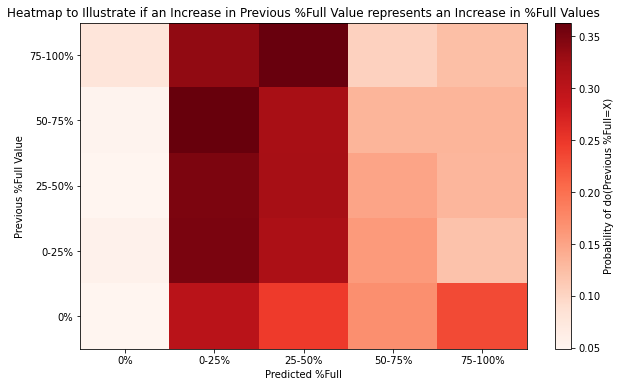

In [328]:
# Pivot the DataFrame to prepare for heatmap
heatmap_data = data.pivot(index='Previous_%Full', columns='%Full_Predicted', values='Probability_of_%Full')

# Create the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(heatmap_data, cmap='Reds', interpolation='nearest', aspect='auto')

# Add a colorbar to indicate the probability values
plt.colorbar(label='Probability of do(Previous %Full=X)')

# Set the x and y tick labels
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index[::-1])  # Reverse the True Label axis

# Add labels and title
plt.xlabel('Predicted %Full')
plt.ylabel('Previous %Full Value')
plt.title('Heatmap to Illustrate if an Increase in Previous %Full Value represents an Increase in %Full Values')
plt.savefig("Heatmap of previous % full vs predicted.png")
# Show the plot
plt.show()

In [330]:
heatmap_data

%Full_Predicted        0%     0-25%    25-50%    50-75%   75-100%
Previous_%Full                                                   
0%               0.077332  0.335197  0.360730  0.103259  0.123482
0-25%            0.051545  0.363117  0.319097  0.133279  0.132963
25-50%           0.050221  0.348893  0.320966  0.148531  0.131388
50-75%           0.055573  0.350297  0.315642  0.159382  0.119107
75-100%          0.049085  0.302413  0.246464  0.169509  0.232529

In [331]:
probabilities = heatmap_data.to_numpy()

In [332]:
probabilities

array([[0.077, 0.335, 0.361, 0.103, 0.123],
       [0.052, 0.363, 0.319, 0.133, 0.133],
       [0.05 , 0.349, 0.321, 0.149, 0.131],
       [0.056, 0.35 , 0.316, 0.159, 0.119],
       [0.049, 0.302, 0.246, 0.17 , 0.233]])

In [327]:
# Assign a central "value" for each %Full category
categories_val = [0, 12.5, 37.5, 62.5, 87.5]

# Calculate expected values
expected_values = [np.dot(row, categories_val) for row in probabilities]

# Calculate correlation
correlation = np.corrcoef(categories_val, expected_values)[0, 1]

print("Expected values:", expected_values)
print("Correlation:", correlation)

Expected values: [34.97571033158222, 36.46927891894335, 37.17706237424547, 36.598501404932875, 43.96318635607321]
Correlation: 0.8271238556148777


### Does previous percentage full influence covered and full failures?

In [112]:
output_dict = {"Previous_%Full":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}
for i in range(0,5):
    q1 = bn.inference.fit(DAG_update, variables=['full_failure'], evidence={"Previous_%Full":i})
    df1 = q1.df
    output_dict["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
    output_dict["Previous_%Full"].append(i)
    q2 = bn.inference.fit(DAG_update, variables=['covered_failure'], evidence={"Previous_%Full":i})
    df2 = q2.df
    output_dict["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.995287   |
+----+----------------+------------+
|  1 |              1 | 0.00471264 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992676   |
+----+-------------------+------------+
|  1 |                 1 | 0.00732351 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.997893  |
+----+----------------+-----------+
|  1 |              1 | 0.0021071 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.995236   |
+----+-------------------+------------+
|  1 |                 1 | 0.00476394 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998417   |
+----+----------------+------------+
|  1 |              1 | 0.00158332 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.996079   |
+----+-------------------+------------+
|  1 |                 1 | 0.00392053 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998146   |
+----+----------------+------------+
|  1 |              1 | 0.00185442 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.996882   |
+----+-------------------+------------+
|  1 |                 1 | 0.00311755 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.995994   |
+----+----------------+------------+
|  1 |              1 | 0.00400584 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.995048   |
+----+-------------------+------------+
|  1 |                 1 | 0.00495179 |
+----+-------------------+------------+


In [113]:
data = pd.DataFrame(output_dict)

In [114]:
data["Previous_%Full"] = data["Previous_%Full"].apply(lambda x: param_dict[x])

Text(0.5, 1.0, 'Plot of Probability of Failure vs Previous Percentage Full for two Failure Modes')

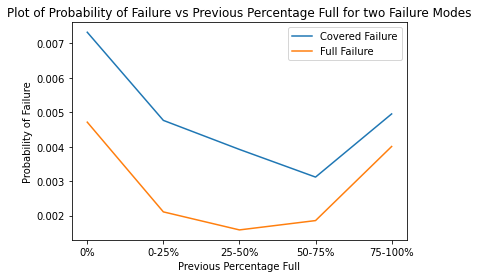

In [115]:
plt.plot(data["Previous_%Full"],data["Probability_of_covered_failure"],label='Covered Failure')
plt.plot(data["Previous_%Full"],data["Probability_of_full_failure"],label='Full Failure')
plt.legend()
plt.xlabel("Previous Percentage Full")
plt.ylabel("Probability of Failure")
plt.title("Plot of Probability of Failure vs Previous Percentage Full for two Failure Modes")

### Does the type of maintenance effect the probability of failure?

In [116]:
output_dict = {"Previous_type_of_maintenance":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[],"Probability_of_broken_failure":[]}
for i in range(0,2):
    q1 = bn.inference.fit(DAG_update, variables=['full_failure'], evidence={"Previous_type_of_maintenance":i})
    df1 = q1.df
    output_dict["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
    output_dict["Previous_type_of_maintenance"].append(i)
    
    q2 = bn.inference.fit(DAG_update, variables=['covered_failure'], evidence={"Previous_type_of_maintenance":i})
    df2 = q2.df
    output_dict["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])
    
    q2 = bn.inference.fit(DAG_update, variables=['broken_failure'], evidence={"Previous_type_of_maintenance":i})
    df2 = q2.df
    output_dict["Probability_of_broken_failure"].append(df2[df2["broken_failure"]==1]["p"][1])

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998398   |
+----+----------------+------------+
|  1 |              1 | 0.00160169 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.996338   |
+----+-------------------+------------+
|  1 |                 1 | 0.00366163 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.997733   |
+----+------------------+------------+
|  1 |                1 | 0.00226727 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.99547    |
+----+----------------+------------+
|  1 |              1 | 0.00452969 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.993362   |
+----+-------------------+------------+
|  1 |                 1 | 0.00663806 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996411   |
+----+------------------+------------+
|  1 |                1 | 0.00358919 |
+----+------------------+------------+


In [117]:
output_dict

{'Previous_type_of_maintenance': [0, 1],
 'Probability_of_full_failure': [0.0016016931271060186, 0.004529687818812487],
 'Probability_of_covered_failure': [0.003661634060279607,
  0.006638061984787805],
 'Probability_of_broken_failure': [0.002267266778804021, 0.003589191544488625]}

In [118]:
data = pd.DataFrame(output_dict)

In [119]:
maintenance_mapping = {0:"Emptying",1:"Clearing"}

In [120]:
data["Previous_type_of_maintenance"] = data["Previous_type_of_maintenance"].apply(lambda x: maintenance_mapping[x])

In [121]:
data

Previous_type_of_maintenance  Probability_of_full_failure  \
0                     Emptying                     0.001602   
1                     Clearing                     0.004530   

   Probability_of_covered_failure  Probability_of_broken_failure  
0                        0.003662                       0.002267  
1                        0.006638                       0.003589

This may be skewed due to most regions only doing emptying maintenance activities. The non-emptying vs emptying is around 10x more likely

In [630]:
output_dict = {"Region":[],"Previous_type_of_maintenance":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[],"Probability_of_broken_failure":[]}
for j in range(1,len(struct_data["Region"].unique())+1):
    for i in range(0,2):
        q1 = bn.inference.fit(DAG_update, variables=['full_failure'], evidence={"Previous_type_of_maintenance":i,"Region":j})
        df1 = q1.df
        output_dict["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
        output_dict["Previous_type_of_maintenance"].append(i)
        output_dict["Region"].append(j)
        q2 = bn.inference.fit(DAG_update, variables=['covered_failure'], evidence={"Previous_type_of_maintenance":i,"Region":j})
        df2 = q2.df
        output_dict["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])
        
        q2 = bn.inference.fit(DAG_update, variables=['broken_failure'], evidence={"Previous_type_of_maintenance":i,"Region":j})
        df2 = q2.df
        output_dict["Probability_of_broken_failure"].append(df2[df2["broken_failure"]==1]["p"][1])

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998078   |
+----+----------------+------------+
|  1 |              1 | 0.00192192 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.995246   |
+----+-------------------+------------+
|  1 |                 1 | 0.00475353 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998187   |
+----+------------------+------------+
|  1 |                1 | 0.00181344 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998382   |
+----+----------------+------------+
|  1 |              1 | 0.00161794 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.99543    |
+----+-------------------+------------+
|  1 |                 1 | 0.00457006 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998257   |
+----+------------------+------------+
|  1 |                1 | 0.00174316 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-------------+
|    |   full_failure |           p |
+====+================+=============+
|  0 |              0 | 0.999504    |
+----+----------------+-------------+
|  1 |              1 | 0.000495741 |
+----+----------------+-------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-------------+
|    |   covered_failure |           p |
+====+===================+=============+
|  0 |                 0 | 0.999222    |
+----+-------------------+-------------+
|  1 |                 1 | 0.000778043 |
+----+-------------------+-------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+-------------+
|    |   broken_failure |           p |
+====+==================+=============+
|  0 |                0 | 0.999186    |
+----+------------------+-------------+
|  1 |                1 | 0.000814322 |
+----+------------------+-------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+---------+
|    |   full_failure |       p |
+====+================+=========+
|  0 |              0 | 0.52381 |
+----+----------------+---------+
|  1 |              1 | 0.47619 |
+----+----------------+---------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+----------+
|    |   covered_failure |        p |
+====+===================+==========+
|  0 |                 0 | 0.753974 |
+----+-------------------+----------+
|  1 |                 1 | 0.246026 |
+----+-------------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+----------+
|    |   broken_failure |        p |
+====+==================+==========+
|  0 |                0 | 0.776745 |
+----+------------------+----------+
|  1 |                1 | 0.223255 |
+----+------------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-------------+
|    |   full_failure |           p |
+====+================+=============+
|  0 |              0 | 0.999284    |
+----+----------------+-------------+
|  1 |              1 | 0.000715677 |
+----+----------------+-------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.998816   |
+----+-------------------+------------+
|  1 |                 1 | 0.00118431 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998683   |
+----+------------------+------------+
|  1 |                1 | 0.00131712 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+----------+
|    |   full_failure |        p |
+====+================+==========+
|  0 |              0 | 0.647887 |
+----+----------------+----------+
|  1 |              1 | 0.352113 |
+----+----------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+----------+
|    |   covered_failure |        p |
+====+===================+==========+
|  0 |                 0 | 0.826477 |
+----+-------------------+----------+
|  1 |                 1 | 0.173523 |
+----+-------------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+----------+
|    |   broken_failure |        p |
+====+==================+==========+
|  0 |                0 | 0.826626 |
+----+------------------+----------+
|  1 |                1 | 0.173374 |
+----+------------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.996399   |
+----+----------------+------------+
|  1 |              1 | 0.00360054 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.988082  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0119179 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.993921   |
+----+------------------+------------+
|  1 |                1 | 0.00607932 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.991829   |
+----+----------------+------------+
|  1 |              1 | 0.00817144 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.989711  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0102893 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.992368   |
+----+------------------+------------+
|  1 |                1 | 0.00763163 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.993309  |
+----+----------------+-----------+
|  1 |              1 | 0.0066912 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986966  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0130342 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.990879   |
+----+------------------+------------+
|  1 |                1 | 0.00912104 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.917397  |
+----+----------------+-----------+
|  1 |              1 | 0.0826033 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.935761  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0642387 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+-----------+
|    |   broken_failure |         p |
+====+==================+===========+
|  0 |                0 | 0.967587  |
+----+------------------+-----------+
|  1 |                1 | 0.0324125 |
+----+------------------+-----------+


In [631]:
data = pd.DataFrame(output_dict)

In [632]:
region_mapping = {1:"SW21",2:"NW13",3:"NW10",4:"EA68",5:"SE04"}

In [633]:
data

Region  Previous_type_of_maintenance  Probability_of_full_failure  \
0       1                             0                     0.001922   
1       1                             1                     0.001618   
2       2                             0                     0.000496   
3       2                             1                     0.476190   
4       3                             0                     0.000716   
5       3                             1                     0.352113   
6       4                             0                     0.003601   
7       4                             1                     0.008171   
8       5                             0                     0.006691   
9       5                             1                     0.082603   

   Probability_of_covered_failure  Probability_of_broken_failure  
0                        0.004754                       0.001813  
1                        0.004570                       0.001743  
2                        0.000778                       0.000814  
3                        0.246026                       0.223255  
4                        0.001184                       0.001317  
5                        0.173523                       0.173374  
6                        0.011918                       0.006079  
7                        0.010289                       0.007632  
8                        0.013034                       0.009121  
9                        0.064239                       0.032413

In [634]:
aggregated_and_counted = struct_data[["Region","Previous_type_of_maintenance","%Full"]].groupby(["Region","Previous_type_of_maintenance"],as_index=False).count()

In [635]:
aggregated_and_counted = aggregated_and_counted.rename(columns={"%Full":"Count"})

In [636]:
merged = pd.merge(data,aggregated_and_counted,on=["Region","Previous_type_of_maintenance"],how="inner")

In [637]:
merged["Region"] = merged["Region"].apply(lambda x: region_mapping[x])

In [638]:
merged["Previous_type_of_maintenance"] = merged["Previous_type_of_maintenance"].apply(lambda x: maintenance_mapping[x])

In [639]:
merged

Region Previous_type_of_maintenance  Probability_of_full_failure  \
0   SW21                     Emptying                     0.001922   
1   SW21                     Clearing                     0.001618   
2   NW13                     Emptying                     0.000496   
3   NW13                     Clearing                     0.476190   
4   NW10                     Emptying                     0.000716   
5   NW10                     Clearing                     0.352113   
6   EA68                     Emptying                     0.003601   
7   EA68                     Clearing                     0.008171   
8   SE04                     Emptying                     0.006691   
9   SE04                     Clearing                     0.082603   

   Probability_of_covered_failure  Probability_of_broken_failure   Count  
0                        0.004754                       0.001813   62858  
1                        0.004570                       0.001743   78395  
2                        0.000778                       0.000814  120931  
3                        0.246026                       0.223255       5  
4                        0.001184                       0.001317   75353  
5                        0.173523                       0.173374      42  
6                        0.011918                       0.006079   29340  
7                        0.010289                       0.007632   18379  
8                        0.013034                       0.009121   23812  
9                        0.064239                       0.032413     699

In [640]:
data = merged.drop(columns={"Count"})

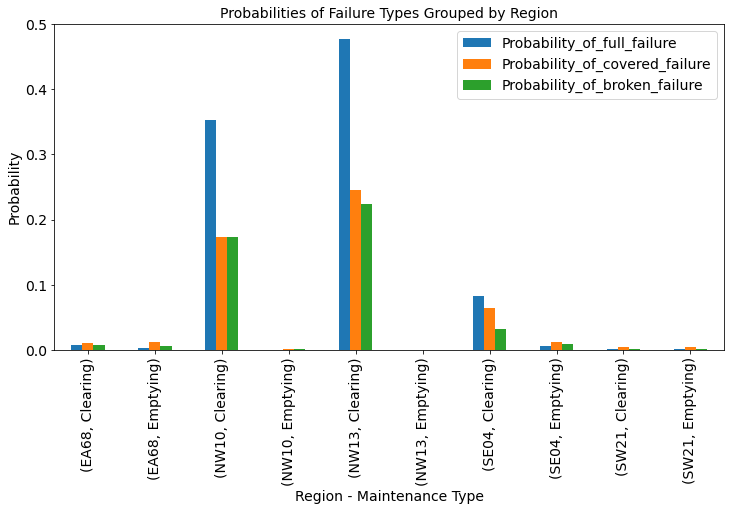

In [648]:
# Group the data by 'Region' and 'Previous_type_of_maintenance'
grouped_data = data.groupby(['Region', 'Previous_type_of_maintenance']).sum()

# Create a grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Region - Maintenance Type',size=14)
plt.ylabel('Probability',size=14)
plt.title('Probabilities of Failure Types Grouped by Region',size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})

plt.savefig("region_previous_type_prob.png")
# Show the plot
plt.show()

This is due to the FIXNOW data. This is skewing the results in regions which don't do clearing of covers but they do do FIXNOW. This means that the previous type of maintenance will always be a failure. - Need to investigate

In [134]:
struct_data["Region"].unique()

array([2, 3, 1, 4, 5])

### How does region effect the probability of failure?

In [619]:
output_dict = {"Region":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[],"Probability_of_broken_failure":[]}
for j in range(1,len(struct_data["Region"].unique())+1):
    print(j)
    q1 = bn.inference.fit(DAG_update, variables=['full_failure'], evidence={"Region":j})
    df1 = q1.df
    output_dict["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
    output_dict["Region"].append(j)
    
    q2 = bn.inference.fit(DAG_update, variables=['covered_failure'], evidence={"Region":j})
    df2 = q2.df
    output_dict["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])
    
    q2 = bn.inference.fit(DAG_update, variables=['broken_failure'], evidence={"Region":j})
    df2 = q2.df
    output_dict["Probability_of_broken_failure"].append(df2[df2["broken_failure"]==1]["p"][1])

1
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998247   |
+----+----------------+------------+
|  1 |              1 | 0.00175323 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.995348   |
+----+-------------------+------------+
|  1 |                 1 | 0.00465172 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998226   |
+----+------------------+------------+
|  1 |                1 | 0.00177444 |
+----+------------------+------------+
2
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.999092   |
+----+----------------+------------+
|  1 |              1 | 0.00090807 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-------------+
|    |   covered_failure |           p |
+====+===================+=============+
|  0 |                 0 | 0.999009    |
+----+-------------------+-------------+
|  1 |                 1 | 0.000990622 |
+----+-------------------+-------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998993   |
+----+------------------+------------+
|  1 |                1 | 0.00100713 |
+----+------------------+------------+
3
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998624   |
+----+----------------+------------+
|  1 |              1 | 0.00137575 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.998492   |
+----+-------------------+------------+
|  1 |                 1 | 0.00150804 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.99836    |
+----+------------------+------------+
|  1 |                1 | 0.00164032 |
+----+------------------+------------+
4
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994637   |
+----+----------------+------------+
|  1 |              1 | 0.00536322 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.98871   |
+----+-------------------+-----------+
|  1 |                 1 | 0.0112899 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.993322   |
+----+------------------+------------+
|  1 |                1 | 0.00667794 |
+----+------------------+------------+
5
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.990854   |
+----+----------------+------------+
|  1 |              1 | 0.00914572 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.98531   |
+----+-------------------+-----------+
|  1 |                 1 | 0.0146898 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.990126   |
+----+------------------+------------+
|  1 |                1 | 0.00987415 |
+----+------------------+------------+


In [620]:
data = pd.DataFrame(output_dict)

In [621]:
data = data.rename(columns={"Probability_of_full_failure":"Probability of Full Failure","Probability_of_covered_failure":"Probability of Covered Failure","Probability_of_broken_failure":"Probability of Broken Failure"})

In [622]:
data

Region  Probability of Full Failure  Probability of Covered Failure  \
0       1                     0.001753                        0.004652   
1       2                     0.000908                        0.000991   
2       3                     0.001376                        0.001508   
3       4                     0.005363                        0.011290   
4       5                     0.009146                        0.014690   

   Probability of Broken Failure  
0                       0.001774  
1                       0.001007  
2                       0.001640  
3                       0.006678  
4                       0.009874

In [623]:
data["Region"] = data["Region"].apply(lambda x: region_mapping[x])

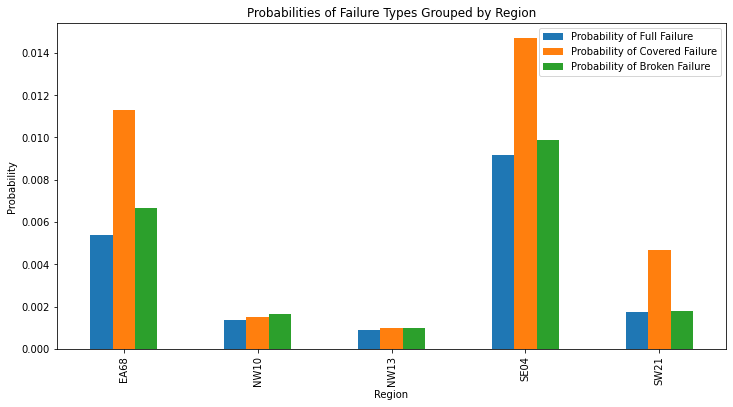

In [624]:
# Group the data by 'Region' and 'Previous_type_of_maintenance'
grouped_data = data.groupby(['Region']).sum()

# Create a grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Probability')
plt.title('Probabilities of Failure Types Grouped by Region')
plt.savefig("full_data_region_variance.png")
# Show the plot
plt.show()

In [141]:
region_count = struct_data[["Region","%Full"]].groupby(["Region"],as_index=False).count()

In [142]:
region_count

Region   %Full
0       1  141253
1       2  120936
2       3   75395
3       4   47719
4       5   24511

In [143]:
data["Region"] = data["Region"].apply(encode_region)

In [144]:
merged_with_count = pd.merge(data,region_count,on="Region")

In [145]:
merged_with_count = merged_with_count.rename(columns={"%Full":"Count"})

In [146]:
total = merged_with_count["Count"].sum()

In [147]:
merged_with_count["Probability of Full Failure Scaled"] = (merged_with_count["Probability of Full Failure"]*merged_with_count["Count"])/total
merged_with_count["Probability of Covered Failure Scaled"] = merged_with_count["Probability of Covered Failure"]*merged_with_count["Count"]/total
merged_with_count["Probability of Broken Failure Scaled"] = (merged_with_count["Probability of Broken Failure"]*merged_with_count["Count"])/total

In [148]:
merged_with_count

Region  Probability of Full Failure  Probability of Covered Failure  \
0       1                     0.001753                        0.004652   
1       2                     0.000908                        0.000991   
2       3                     0.001376                        0.001508   
3       4                     0.005363                        0.011290   
4       5                     0.009146                        0.014690   

   Probability of Broken Failure   Count  Probability of Full Failure Scaled  \
0                       0.001774  141253                            0.000604   
1                       0.001007  120936                            0.000268   
2                       0.001640   75395                            0.000253   
3                       0.006678   47719                            0.000624   
4                       0.009874   24511                            0.000547   

   Probability of Covered Failure Scaled  Probability of Broken Failure Scaled  
0                               0.001603                              0.000612  
1                               0.000292                              0.000297  
2                               0.000277                              0.000302  
3                               0.001315                              0.000778  
4                               0.000879                              0.000591

In [149]:
data = merged_with_count[["Region","Probability of Full Failure Scaled","Probability of Covered Failure Scaled","Probability of Broken Failure Scaled"]]

In [150]:
data["Region"] = data["Region"].apply(lambda x: region_mapping[x])

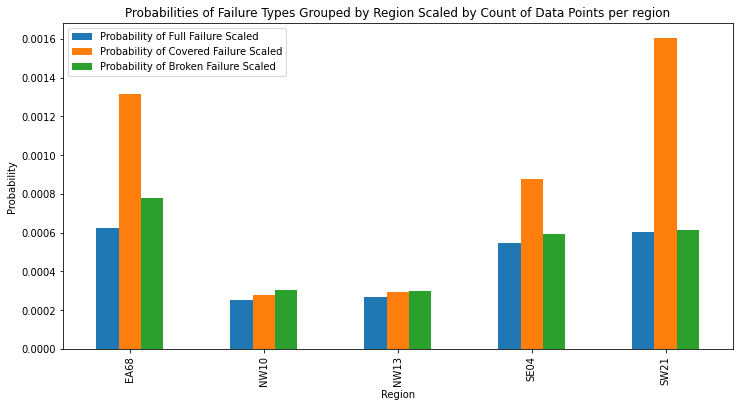

In [151]:
# Group the data by 'Region' and 'Previous_type_of_maintenance'
grouped_data = data.groupby(['Region']).sum()

# Create a grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Probability')
plt.title('Probabilities of Failure Types Grouped by Region Scaled by Count of Data Points per region')

# Show the plot
plt.show()

# Remove Regions which do not also do cyclic maintenance for Covered Failures - NW10, NW13

In [196]:
struct_data

%Full  Region  full_failure  covered_failure  broken_failure  \
15458       1       2             0                0               0   
15460       2       2             0                0               0   
15462       2       2             0                0               0   
15464       2       2             0                0               0   
15466       2       2             0                0               0   
...       ...     ...           ...              ...             ...   
551178      4       3             0                0               0   
551179      4       3             0                0               0   
551180      2       1             0                0               0   
551181      2       1             0                0               0   
551182      2       1             0                0               0   

        Previous_%Full  Previous_type_of_maintenance  Months_Since_Maintenance  
15458                1                             0                         0  
15460                2                             0                         0  
15462                2                             0                         0  
15464                2                             0                         0  
15466                2                             0                         0  
...                ...                           ...                       ...  
551178               2                             0                         2  
551179               2                             0                         2  
551180               3                             1                         2  
551181               3                             1                         2  
551182               2                             1                         2  

[409814 rows x 8 columns]

In [391]:
data = pd.read_csv("/home/tgraham/Documents/MSC/project_data/new_approach_data.csv",index_col=0)
data = data.drop(columns=["ActualCompletionDateTime","ExtractTimestamp","JobID","CentralAssetID"])
data = data.rename(columns={"prefix":"Region","ParameterValueID":"%Full","Previous_pvalue":"Previous_%Full"})

In [392]:
data["RouteID"] = data["RouteID"].astype(str)
data["Region"] = data["Region"].astype(str)
data["%Full"] = data["%Full"].astype(str)
data["Days_Since_Maintenance"] = data["Days_Since_Maintenance"].astype(int)

In [395]:
region_mapping = {1:"SW21",2:"NW13",3:"NW10",4:"EA68",5:"SE04"}

In [396]:
data["%Full"] = data["%Full"].apply(edit_paramaterValueID)
data["Previous_%Full"] = data["Previous_%Full"].apply(edit_paramaterValueID)
data["Previous_type_of_maintenance"] = data["Previous_type_of_maintenance"].apply(encode_type_of_maintenance)
data["Region"] = data["Region"].apply(encode_region)

In [397]:
data = data.drop(columns="RouteID")

In [398]:
months_mapping_long = {0:"0-3",1:"4-6",2:"7-9",3:"10-12",4:"13-15",5:"16-18",6:"19-21",7:"22-24",8:"25-27",9:"28-30",10:"31-33",11:"34-36",12:">36"}
months_mapping_short = {0:"0-3",1:"4-6",2:"7-9",3:"10-12",4:"13-15",5:"16-18",6:"19-21",7:"22-24",8:">24"}

In [399]:
struct_data = data

In [400]:
struct_data["Months_Since_Maintenance"] = struct_data["Days_Since_Maintenance"].apply(reduce_cardinality_of_dsm_short)

In [401]:
struct_data = struct_data.drop(columns="Days_Since_Maintenance")

In [402]:
struct_data = struct_data.drop(columns="FloodHotspot")

In [403]:
struct_data = struct_data.drop(columns="Failure_or_Maintenance")

In [404]:
struct_data_reduced = struct_data[struct_data["Region"].isin([1,4])]

In [405]:
struct_data[["Region","Previous_type_of_maintenance"]].value_counts().sort_values()

Region  Previous_type_of_maintenance
2       1                                    5
3       1                                   42
5       1                                  699
4       1                                18379
5       0                                23812
4       0                                29340
1       0                                62858
3       0                                75353
1       1                                78395
2       0                               120931
dtype: int64

In [406]:
struct_data_reduced = struct_data[struct_data["Region"].isin([1,4])]

In [408]:
struct_data_reduced["Months_Since_Maintenance"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

## GES

In [409]:
from causallearn.search.ScoreBased.GES import ges
score_func = "local_score_BDeu"
ges_causallearn_reduced = ges(struct_data_reduced, score_func)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0 -1  0  0]
 [ 0  1  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0 -1  0 -1]
 [ 0  1  0  0  0  0  1  0]]
[[ 0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0 -1  0 -1]
 [ 1  1  0  0  0  0  1  0]]
[[ 0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [410]:
print(f"Bdeu score: {ges_causallearn_reduced['score']}")

Bdeu score: 1094889.2670343206


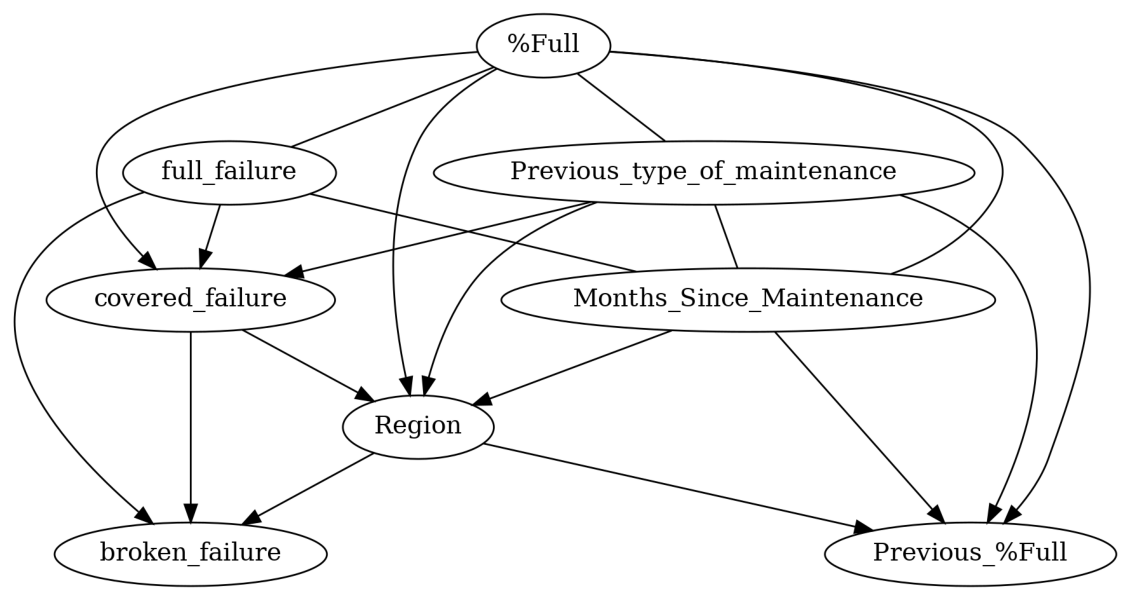

In [411]:
# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(ges_causallearn_reduced['G'],labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('GES_algorithm.png')

## PC-Stable

In [412]:
from causallearn.search.ConstraintBased.PC import pc

In [413]:
pc_causallearn_reduced = pc(struct_array_reduced, alpha=0.8,stable=True, indep_test = "fisherz",verbose= False)

  0%|          | 0/8 [00:00<?, ?it/s]

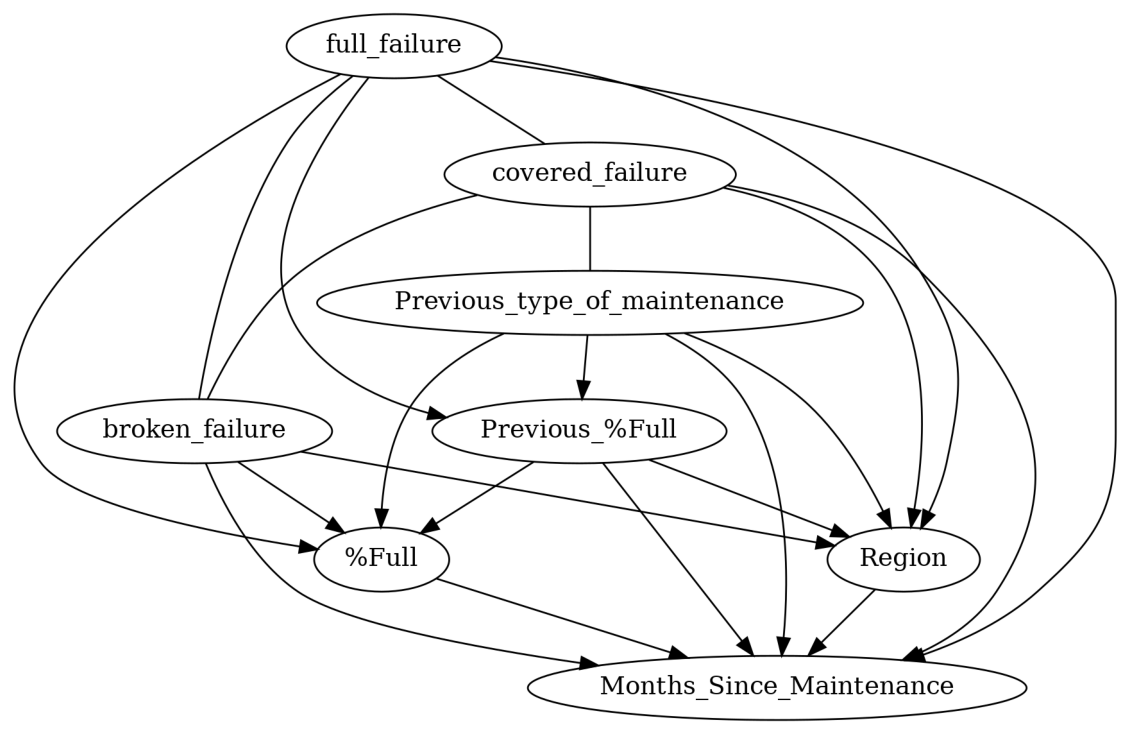

In [414]:
from matplotlib.pyplot import figure
# visualization using pydot
pyd = GraphUtils.to_pydot(pc_causallearn_reduced.G,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()
pyd.write_png('PC.png')

## FCI 

In [415]:
from causallearn.search.ConstraintBased.FCI import fci

In [416]:
struct_array = struct_data.to_numpy()

In [417]:
fci_causallearn_reduced, edges = fci(struct_array_reduced, alpha=0.8, indep_test = "fisherz",verbose= False)

  0%|          | 0/8 [00:00<?, ?it/s]

X6 --> X1
X7 --> X1
X2 --> X3
X3 --> X4
X5 --> X4
X4 --> X7
X8 --> X5
X8 --> X7


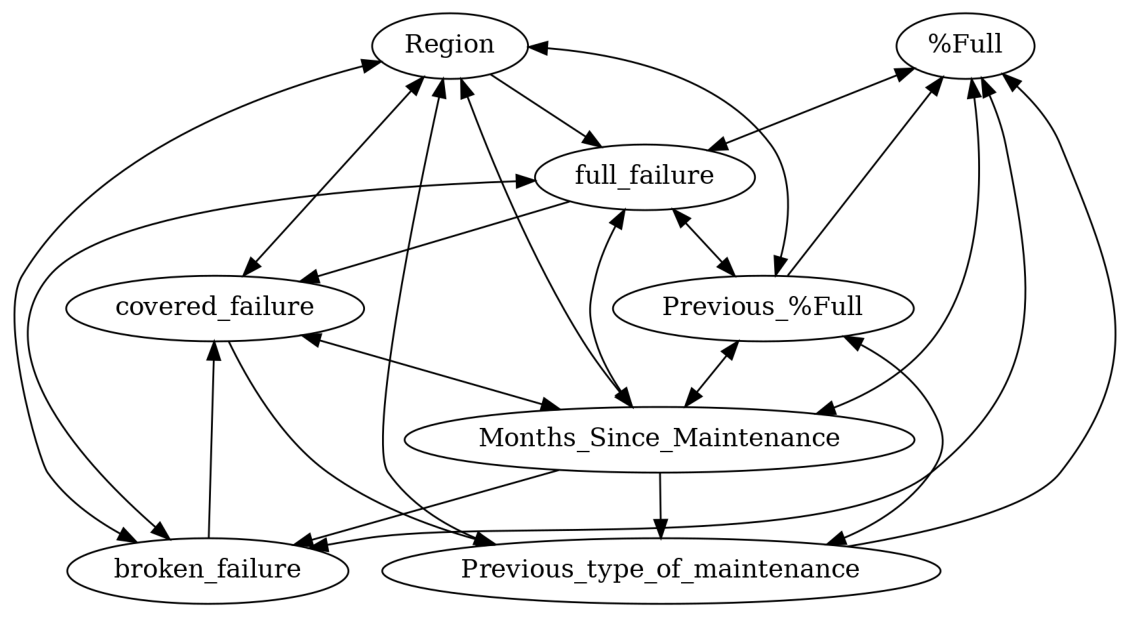

In [418]:
pyd = GraphUtils.to_pydot(fci_causallearn_reduced,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('FCI.png')

# Bnlearn

## HillClimbSearch - Bdeu

In [419]:
from causallearn.graph.Dag import Dag
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
from causallearn.graph.GraphNode import GraphNode
# Load library
import bnlearn as bn
# Load example
# Structure learning
hill_climb_bdeu_bnlearn_reduced = bn.structure_learning.fit(struct_data_reduced, methodtype='hc', scoretype='bdeu')
# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model1 = bn.independence_test(hill_climb_bdeu_bnlearn_reduced, struct_data, alpha=0.05, prune=False)
# Examine the output of the chi-square test. All P values are significant. Nothing is removed.
#    source     target     stat_test        p_value    chi_square    dof
#--  ---------  ---------  -----------  -----------  ------------  -----
# 0  Cloudy     Rain       True         1.08061e-87       394.062      1
# 1  Cloudy     Sprinkler  True         8.38371e-53       233.906      1
# 2  Rain       Wet_Grass  True         3.88651e-64       285.902      1
# 3  Sprinkler  Wet_Grass  True         1.19692e-23       100.478      1

# Plot
# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model3 = bn.independence_test(model1, struct_data, alpha=0.05, prune=True)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Compute edge strength with [chi_square]


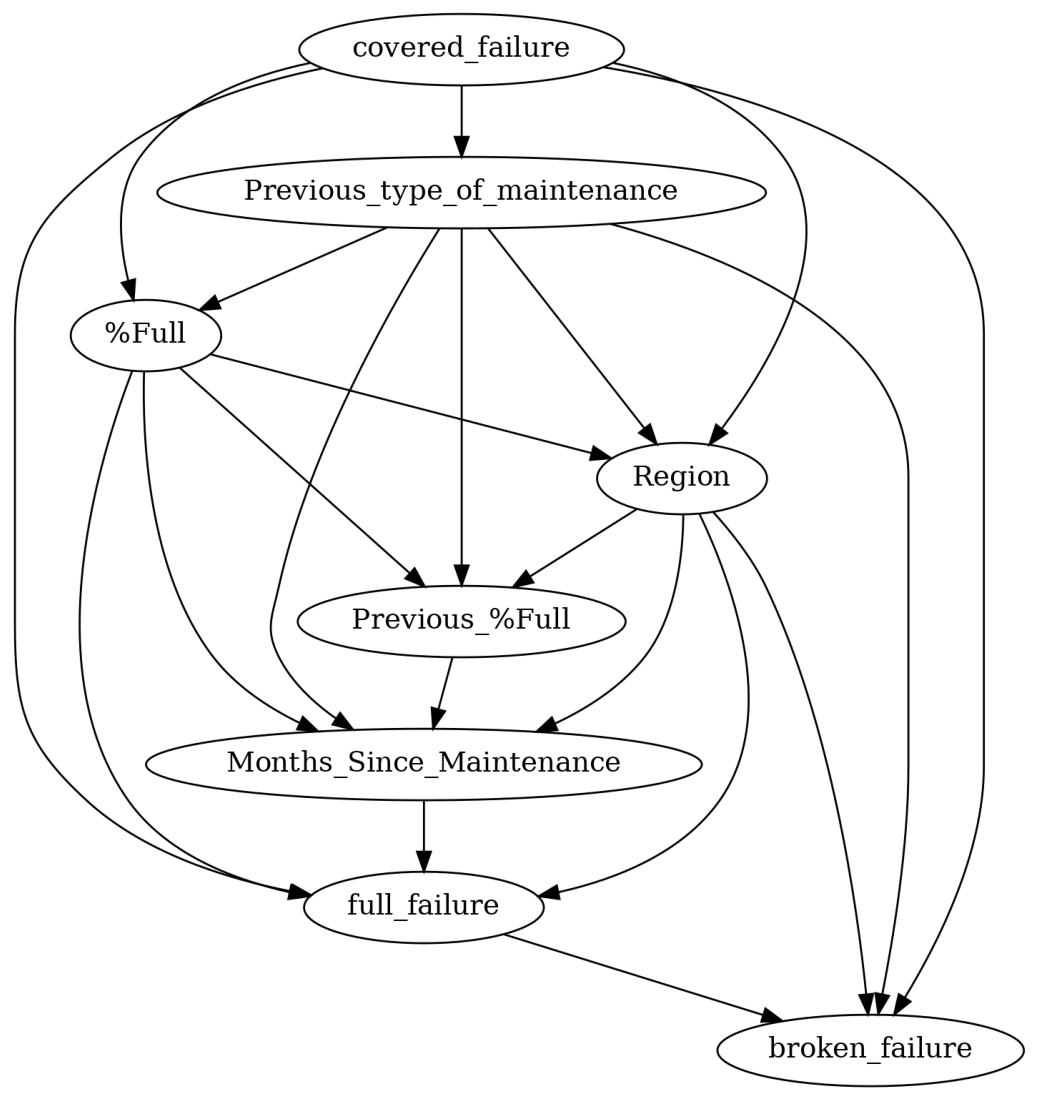

In [420]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in hill_climb_bdeu_bnlearn_reduced["model_edges"]:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('HillClimb_bdeu.png')

## Hill Climb Search BIC

In [421]:
hill_climb_bic_bnlearn_reduced = bn.structure_learning.fit(struct_data_reduced, methodtype='hc', scoretype='bic')


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


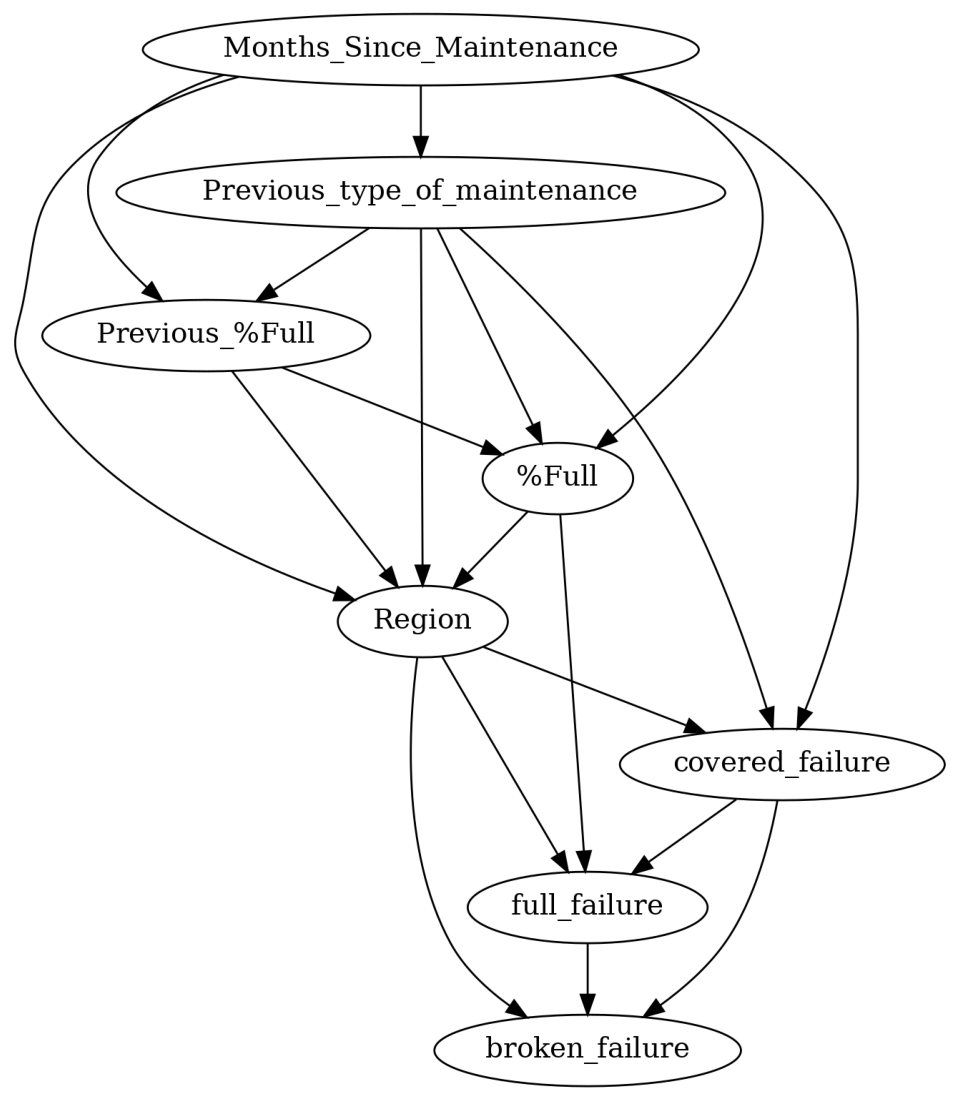

In [422]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in hill_climb_bic_bnlearn_reduced["model_edges"]:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('HillClimb_bic.png')

In [423]:
mapped = {}
for index, item in enumerate(struct_data_reduced.columns):
    mapped[item]=index
forbidden_edges = [("Months_Since_Maintenance","Previous_%Full"),
                    ("Previous_%Full", "Region"),
                    ("broken_failure","Region"),
                    ("covered_failure","Region"),
                    ("full_failure","Region"),
                    ("full_failure","Months_Since_Maintenance"),
                    ("covered_failure","Months_Since_Maintenance"),
                    ("broken_failure","Months_Since_Maintenance"),
                    ("full_failure","Previous_%Full"),
                    ("covered_failure","Previous_%Full"),
                    ("broken_failure","Previous_%Full")]
output = []
for item in forbidden_edges:
    output.append((mapped[item[0]],mapped[item[1]]))

In [424]:
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.graph.GraphClass import CausalGraph
cg = CausalGraph(8)
nodes = cg.G.get_nodes()

In [425]:
bk = BackgroundKnowledge()
for item in output:
    bk.add_forbidden_by_node(nodes[item[0]], nodes[item[1]])

In [426]:
struct_array_reduced = struct_data_reduced.to_numpy()

## PC - Background knowledge - Reduced

In [427]:
pc_background_causallearn_reduced = pc(struct_array_reduced,alpha=0.8, indep_test = "fisherz",verbose= False,stable=True, background_knowledge=bk)

  0%|          | 0/8 [00:00<?, ?it/s]

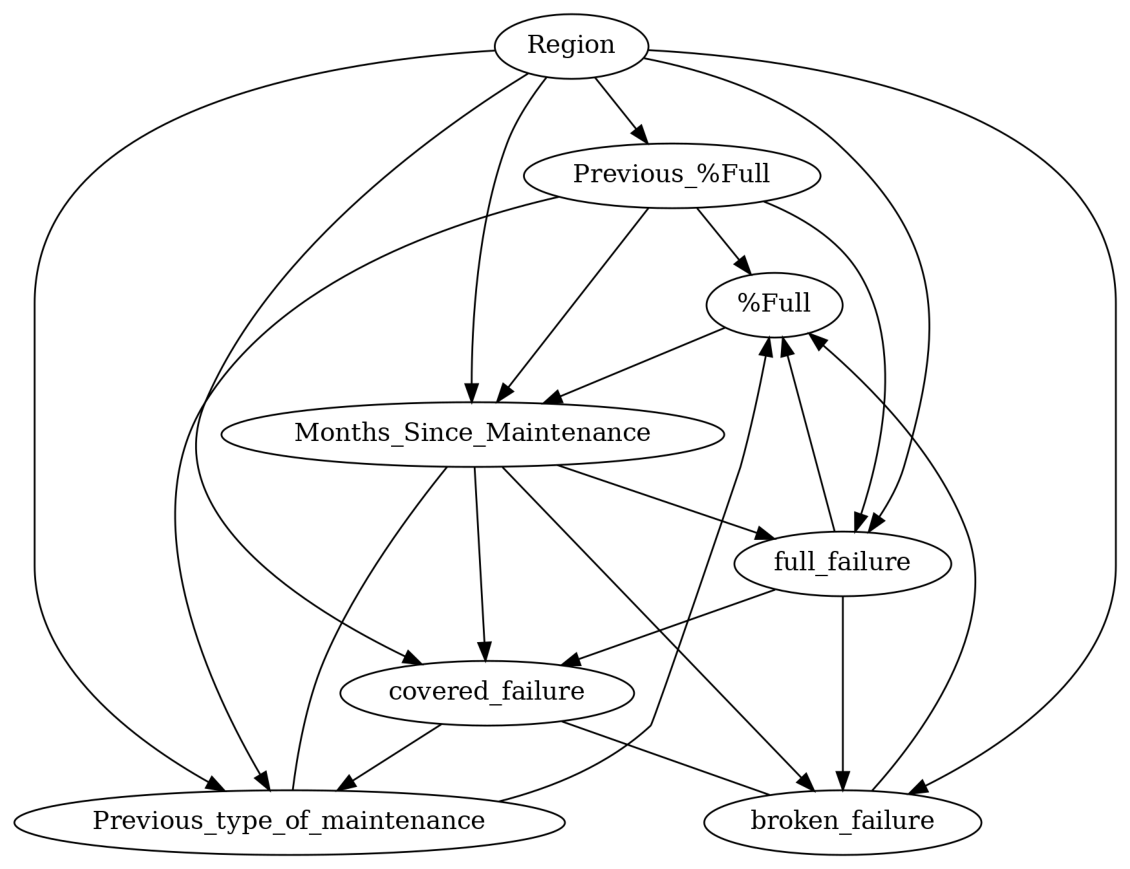

In [428]:
# visualization using pydot
pyd = GraphUtils.to_pydot(pc_background_causallearn_reduced.G,labels=list(struct_data_reduced.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()


pyd.write_png('PC_Background_Knowledge.png')

## FCI - Background Knowledge - Reduced

In [429]:
fci_background_causallearn_reduced, edges = fci(struct_array_reduced, alpha=0.05, indep_test = "fisherz",verbose= False,background_knowledge=bk)

  0%|          | 0/8 [00:00<?, ?it/s]

Starting BK Orientation.
Orienting edge (Knowledge): X2 --> X3
Orienting edge (Knowledge): X2 --> X4
Orienting edge (Knowledge): X2 --> X5
Orienting edge (Knowledge): X2 --> X6
Orienting edge (Knowledge): X6 --> X3
Orienting edge (Knowledge): X8 --> X3
Orienting edge (Knowledge): X8 --> X4
Orienting edge (Knowledge): X8 --> X5
Orienting edge (Knowledge): X6 --> X8
Finishing BK Orientation.
Starting BK Orientation.
Orienting edge (Knowledge): X2 --> X3
Orienting edge (Knowledge): X2 --> X4
Orienting edge (Knowledge): X2 --> X5
Orienting edge (Knowledge): X2 --> X6
Orienting edge (Knowledge): X6 --> X3
Orienting edge (Knowledge): X8 --> X3
Orienting edge (Knowledge): X8 --> X4
Orienting edge (Knowledge): X8 --> X5
Orienting edge (Knowledge): X6 --> X8
Finishing BK Orientation.
X3 --> X4
X6 --> X3
X8 --> X3
X5 --> X4
X8 --> X4
X8 --> X5
X6 --> X8


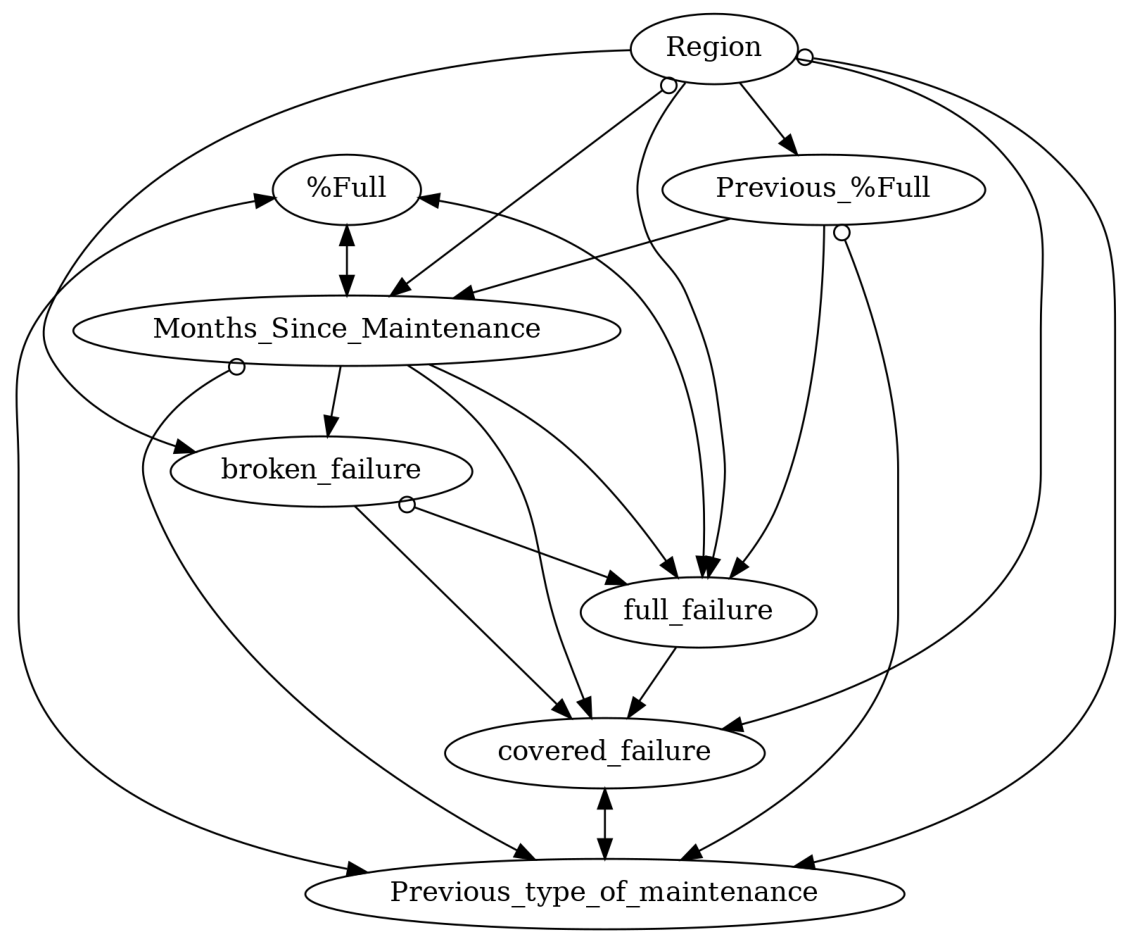

In [430]:
# visualization using pydot
pyd = GraphUtils.to_pydot(fci_background_causallearn_reduced,labels=list(struct_data_reduced.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()


pyd.write_png('simple_test.png')

## HC - Background Knowledge - BDEU - Reduced

In [683]:
required_edges = [('Previous_%Full', '%Full'),
 ('Region', '%Full'),
 ('Region', 'Previous_%Full'),
 ('Region', 'broken_failure'),
 ('Region', 'covered_failure'),
 ('Region', 'full_failure'),
 ('Region','Previous_type_of_maintenance'),
 ('Region','Months_Since_Maintenance'),
 ('Months_Since_Maintenance', 'full_failure'),
 ('Months_Since_Maintenance', 'covered_failure'),
 ('Previous_%Full', 'full_failure'),
 ('Previous_type_of_maintenance', 'full_failure')]

In [432]:
hill_climb_background_bnlearn_bdeu_reduced = bn.structure_learning.fit(struct_data_reduced, methodtype='hc', scoretype='bdeu',fixed_edges=required_edges)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).


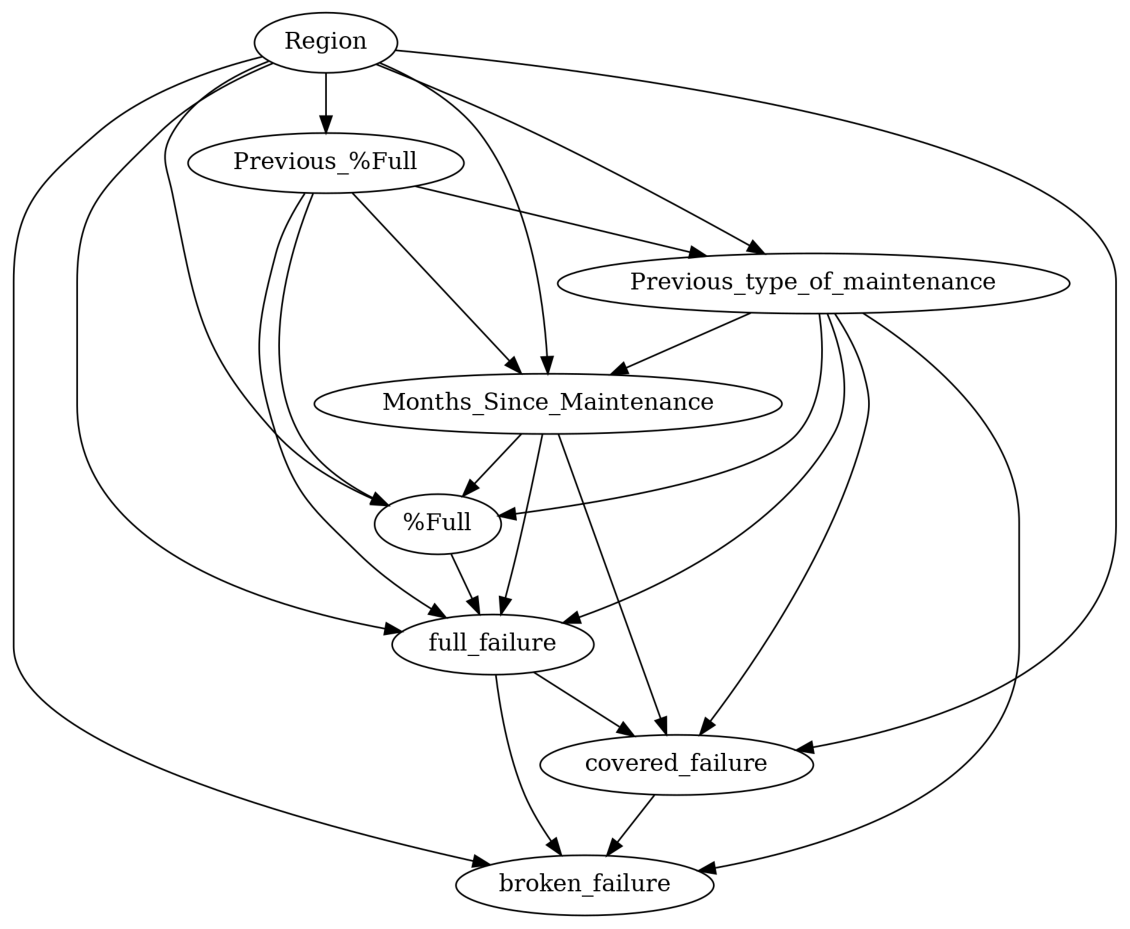

In [433]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in hill_climb_background_bnlearn_bdeu_reduced["model_edges"]:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('HillClimb__bdeu_background.png')

## HC - Background Knowledge - BIC - Reduced

In [434]:
hill_climb_background_bnlearn_bic_reduced = bn.structure_learning.fit(struct_data_reduced, methodtype='hc', scoretype='bic',fixed_edges=required_edges)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


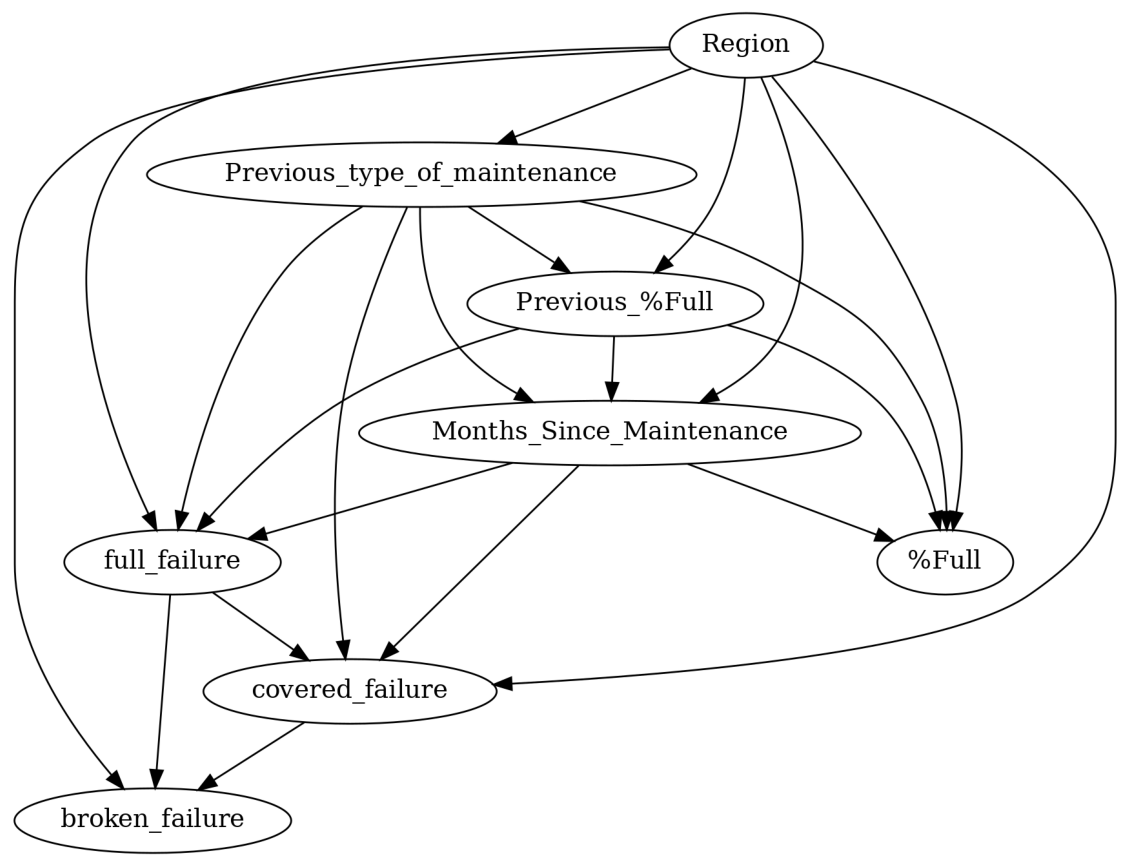

In [435]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in hill_climb_background_bnlearn_bic_reduced["model_edges"]:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('HillClimb_background_bic.png')

## Compare Graphs with reduced data

In [675]:
all_graphs_reduced = {
            'causallearn GES':ges_causallearn_reduced,
            'causallearn PC Stable':pc_causallearn_reduced,
            'causallearn FCI':fci_causallearn_reduced,
            'bnlearn HC BDEU':hill_climb_bdeu_bnlearn_reduced,
            'bnlearn HC BIC':hill_climb_bic_bnlearn_reduced,
            'causallearn PC background':pc_background_causallearn_reduced,
            'causallearn FCI background':fci_background_causallearn_reduced,
            'bnlearn HC BDEU background':hill_climb_background_bnlearn_bdeu_reduced,
            'bnlearn HC BIC background':hill_climb_background_bnlearn_bic_reduced}

In [676]:
output_matrices = {"algorithm":[],"matrix":[]}
for key,value in zip(all_graphs_reduced.keys(),all_graphs_reduced.values()):
    if key.find('causallearn')!= -1:
        print(key)
        if key.find('causallearn GES')!= -1:
            broken_down_edges = create_broken_down_edges(value['G'])
            mapping = create_mapping(value['G'],struct_data)
            output_matrix = create_matrix_from_edge_list(struct_data,broken_down_edges,mapping)
            output_matrices["algorithm"].append(key)
            output_matrices["matrix"].append(output_matrix)
        elif key.find('causallearn PC')!= -1:
            broken_down_edges = create_broken_down_edges(value.G)
            mapping = create_mapping(value.G,struct_data)
            output_matrix = create_matrix_from_edge_list(struct_data,broken_down_edges,mapping)
            output_matrices["algorithm"].append(key)
            output_matrices["matrix"].append(output_matrix)
        else:
            broken_down_edges = create_broken_down_edges(value)
            mapping = create_mapping(value,struct_data)
            output_matrix = create_matrix_from_edge_list(struct_data,broken_down_edges,mapping)
            output_matrices["algorithm"].append(key)
            output_matrices["matrix"].append(output_matrix)
    elif key.find("gcastle") != -1:
        print(key)
        output_matrix = value.causal_matrix
        output_matrices["algorithm"].append(key)
        output_matrices["matrix"].append(output_matrix)
    else:
        print(key)
        mapping = create_mapping(value,struct_data)
        broken_down_edges = []
        for item in value["model_edges"]:
            broken_down_edges.append([(item[0],-1),(item[1],1)])
        output_matrix = create_matrix_from_edge_list(struct_data,broken_down_edges,mapping)
        output_matrices["algorithm"].append(key)
        output_matrices["matrix"].append(output_matrix)

causallearn GES
causallearn PC Stable
causallearn FCI
bnlearn HC BDEU
bnlearn HC BIC
causallearn PC background
causallearn FCI background
bnlearn HC BDEU background
bnlearn HC BIC background


In [677]:
count = 0
output_dict = {'algorithm':[],'shd': [], 'edges': [], 'accuracy': [], 'precision': [], 'recall': [], 'F1': [],'bsf':[]}
for algo,matrix in zip(output_matrices["algorithm"],output_matrices["matrix"]):
    output = compute_metrics(output_truth_matrix,matrix)
    output['algorithm'] = algo
    for item in output.keys():
        output_dict[item].append(output[item])

In [678]:
data = pd.DataFrame(output_dict)

In [679]:
data

algorithm   shd  edges  accuracy  precision    recall  \
0             causallearn GES  15.0     19  0.500000   0.153846  0.166667   
1       causallearn PC Stable  13.5     22  0.557377   0.303030  0.400000   
2             causallearn FCI  14.5     22  0.508475   0.193548  0.260870   
3             bnlearn HC BDEU  12.0     21  0.636364   0.500000  0.600000   
4              bnlearn HC BIC  10.5     19  0.676923   0.516129  0.551724   
5   causallearn PC background   9.5     22  0.724638   0.634146  0.787879   
6  causallearn FCI background  11.5     20  0.646154   0.484848  0.551724   
7  bnlearn HC BDEU background   5.0     23  0.861111   0.782609  1.000000   
8   bnlearn HC BIC background   4.5     20  0.873239   0.820513  0.914286   

         F1       bsf  
0  0.160000 -0.110526  
1  0.344828 -0.031818  
2  0.222222 -0.150000  
3  0.545455  0.221429  
4  0.533333  0.364474  
5  0.702703  0.440909  
6  0.516129  0.262500  
7  0.878049  0.791304  
8  0.864865  0.937500

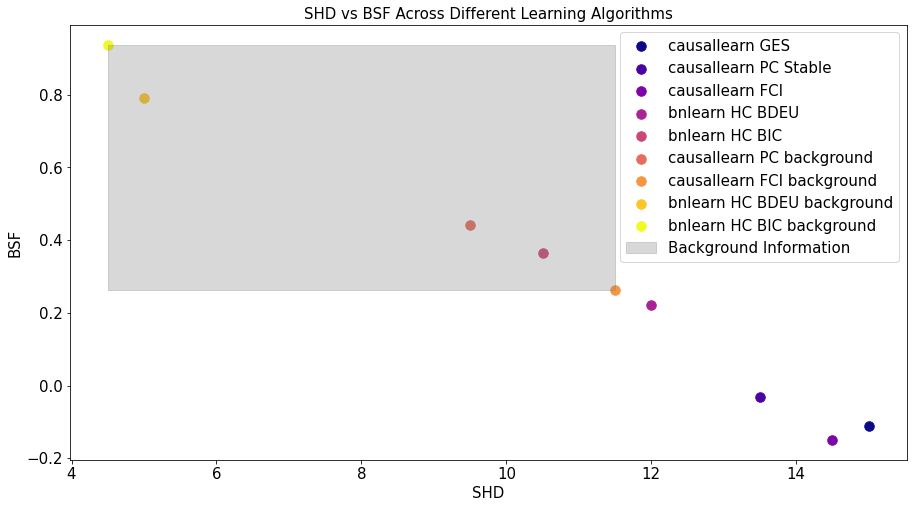

In [682]:
import matplotlib.pyplot as plt
import numpy as np

x = data["shd"]
y = data["bsf"]
plt.figure(figsize=(15, 8))

# Create the scatter plot with different colors for each point
#for i, algorithm in zip(range(len(x)),data["algorithm"]):
#    plt.scatter(x[i], y[i], color=plt.cm.viridis(i/ len(x)), label=algorithm)

# Generate a list of unique colors
unique_colors = plt.cm.plasma(np.linspace(0, 1, len(data)))

for i, algorithm in zip(range(len(x)), data["algorithm"]):
    plt.scatter(x[i], y[i], color=unique_colors[i], label=algorithm,s=90)

# Define the shaded regions
x_shade = [data[data["algorithm"].str.find("background")!=-1]["shd"].min(),data[data["algorithm"].str.find("background")!=-1]["shd"].max()]
y_upper = data[data["algorithm"].str.find("background")!=-1]["bsf"].max()
y_lower = data[data["algorithm"].str.find("background")!=-1]["bsf"].min()

# Fill the shaded regions
plt.fill_between(x_shade, y_lower, y_upper, color='gray', alpha=0.3, label='Background Information')

# Add labels and title
plt.xlabel('SHD',size=15)
plt.ylabel('BSF',size=15)
plt.title('SHD vs BSF Across Different Learning Algorithms',size=15)
plt.legend(prop={'size': 13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15})
plt.savefig("dag_comparison.png")
# Show the ploto
plt.show()

## Learn Parameters using the bnlearn Parameter Learning functionality for the reduced graphs

### Convert a Causal Learn DAG to a bnlearn DAG

In [763]:
dag = hill_climb_background_bnlearn_bic_reduced

In [766]:
edges = []
for item in dag["model_edges"]:
    if item[0] == "covered_failure":
        if item[1] == "broken_failure":
            pass
        else:
            edges.append(item)
    elif item[0] == "full_failure":
        if item[1] == "broken_failure":
            pass
        else:
            edges.append(item)
    elif item[0] == 'Previous_type_of_maintenance':
        if item[1] == 'Previous_%Full':
            edges.append((item[1],item[0]))
        else:
            edges.append(item)
    else:
        edges.append(item)

In [768]:
edges

[('Region', 'Months_Since_Maintenance'),
 ('Region', 'covered_failure'),
 ('Region', 'Previous_%Full'),
 ('Region', 'Previous_type_of_maintenance'),
 ('Region', 'full_failure'),
 ('Region', 'broken_failure'),
 ('Region', '%Full'),
 ('full_failure', 'covered_failure'),
 ('Previous_%Full', 'full_failure'),
 ('Previous_%Full', '%Full'),
 ('Previous_%Full', 'Months_Since_Maintenance'),
 ('Previous_type_of_maintenance', 'full_failure'),
 ('Previous_%Full', 'Previous_type_of_maintenance'),
 ('Previous_type_of_maintenance', 'Months_Since_Maintenance'),
 ('Previous_type_of_maintenance', '%Full'),
 ('Previous_type_of_maintenance', 'covered_failure'),
 ('Months_Since_Maintenance', 'covered_failure'),
 ('Months_Since_Maintenance', 'full_failure'),
 ('Months_Since_Maintenance', '%Full')]

In [769]:
dag["model_eges"] = edges

In [770]:
dag = bn.make_DAG(edges)

[bnlearn] >bayes DAG created.


[bnlearn] >No changes made to existing bayes DAG.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


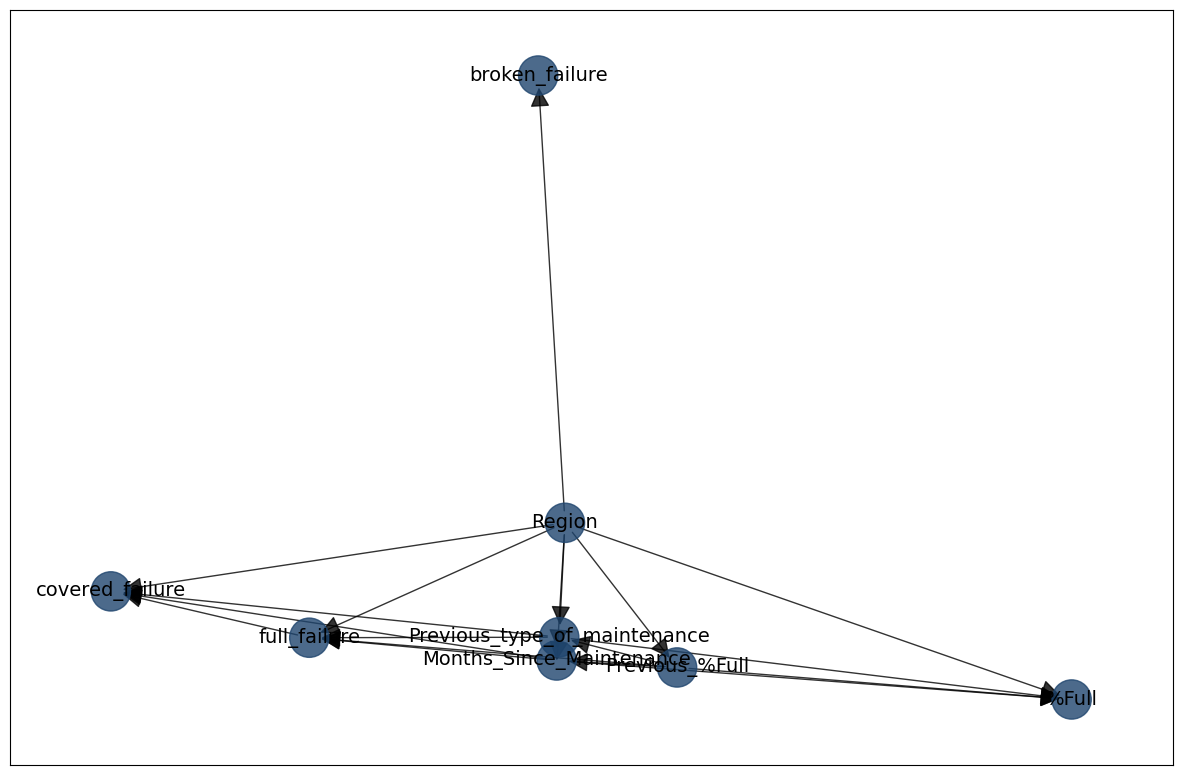

[datazets] >INFO> Replacing existing CPD for Region
[datazets] >INFO> Replacing existing CPD for Months_Since_Maintenance
[datazets] >INFO> Replacing existing CPD for covered_failure
[datazets] >INFO> Replacing existing CPD for Previous_%Full
[datazets] >INFO> Replacing existing CPD for Previous_type_of_maintenance
[datazets] >INFO> Replacing existing CPD for full_failure
[datazets] >INFO> Replacing existing CPD for broken_failure
[datazets] >INFO> Replacing existing CPD for %Full


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Region:
+-----------+----------+
| Region(1) | 0.746178 |
+-----------+----------+
| Region(4) | 0.253822 |
+-----------+----------+
[bnlearn] >CPD of Months_Since_Maintenance:
+------------------------------+-----+---------------------------------+
| Previous_%Full               | ... | Previous_%Full(4)               |
+------------------------------+-----+---------------------------------+
| Previous_type_of_maintenance | ... | Previous_type_of_maintenance(1) |
+------------------------------+-----+---------------------------------+
| Region                       | ... | Region(4)                       |
+------------------------------+-----+---------------------------------+
| Months_Since_Maintenance(0)  | ... | 0.03604450713054381             |
+------------------------------+-----+---------------------------------+
| Months_Since_Maintenance(1)  | ... | 0.017708823068484567            |
+--------

In [772]:
#edges = [('A', 'B'), ('A', 'C'), ('A', 'D')]
# Create DAG and store in model
model = bn.make_DAG(dag)
bn.plot(model)
reduced_bn = bn.parameter_learning.fit(model, struct_data_reduced)

### What is the effect of Time on Probabilities of Failure

In [773]:
months_mapping

{0: '0-3',
 1: '4-6',
 2: '7-9',
 3: '10-12',
 4: '13-15',
 5: '16-18',
 6: '19-21',
 7: '22-24',
 8: '>24'}

In [774]:
len(struct_data_reduced["Months_Since_Maintenance"].unique())

9

In [775]:
output_dict = {"Months":[],"Probability_of_broken_failure":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}
for i in range(0,len(struct_data_reduced["Months_Since_Maintenance"].unique())):
    q1 = bn.inference.fit(reduced_bn, variables=['broken_failure'], evidence={"Months_Since_Maintenance":i})
    df1 = q1.df
    output_dict["Probability_of_broken_failure"].append(df1[df1["broken_failure"]==1]["p"][1])

    q2 = bn.inference.fit(reduced_bn, variables=['full_failure'], evidence={"Months_Since_Maintenance":i})
    df2 = q2.df
    output_dict["Probability_of_full_failure"].append(df2[df2["full_failure"]==1]["p"][1])

    q3 = bn.inference.fit(reduced_bn, variables=['covered_failure'], evidence={"Months_Since_Maintenance":i})
    df3 = q3.df
    output_dict["Probability_of_covered_failure"].append(df3[df3["covered_failure"]==1]["p"][1])
    
    output_dict["Months"].append(months_mapping_short[i])

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994976   |
+----+------------------+------------+
|  1 |                1 | 0.00502403 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.992516   |
+----+----------------+------------+
|  1 |              1 | 0.00748378 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986382  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0136175 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996642   |
+----+------------------+------------+
|  1 |                1 | 0.00335765 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.996931   |
+----+----------------+------------+
|  1 |              1 | 0.00306928 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992256   |
+----+-------------------+------------+
|  1 |                 1 | 0.00774437 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.995638   |
+----+------------------+------------+
|  1 |                1 | 0.00436165 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.997899  |
+----+----------------+-----------+
|  1 |              1 | 0.0021015 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.994982   |
+----+-------------------+------------+
|  1 |                 1 | 0.00501796 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994719   |
+----+------------------+------------+
|  1 |                1 | 0.00528142 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.99652   |
+----+----------------+-----------+
|  1 |              1 | 0.0034799 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.993995   |
+----+-------------------+------------+
|  1 |                 1 | 0.00600491 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994327   |
+----+------------------+------------+
|  1 |                1 | 0.00567273 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997296   |
+----+----------------+------------+
|  1 |              1 | 0.00270377 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.994448   |
+----+-------------------+------------+
|  1 |                 1 | 0.00555181 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994332   |
+----+------------------+------------+
|  1 |                1 | 0.00566821 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994489   |
+----+----------------+------------+
|  1 |              1 | 0.00551088 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992005   |
+----+-------------------+------------+
|  1 |                 1 | 0.00799492 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996177   |
+----+------------------+------------+
|  1 |                1 | 0.00382277 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.992757   |
+----+----------------+------------+
|  1 |              1 | 0.00724324 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.990114   |
+----+-------------------+------------+
|  1 |                 1 | 0.00988604 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994244   |
+----+------------------+------------+
|  1 |                1 | 0.00575591 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.989429  |
+----+----------------+-----------+
|  1 |              1 | 0.0105709 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986625  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0133746 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996064   |
+----+------------------+------------+
|  1 |                1 | 0.00393625 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.973261  |
+----+----------------+-----------+
|  1 |              1 | 0.0267388 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+---------+
|    |   covered_failure |       p |
+====+===================+=========+
|  0 |                 0 | 0.97137 |
+----+-------------------+---------+
|  1 |                 1 | 0.02863 |
+----+-------------------+---------+


In [776]:
struct_data_reduced["Months_Since_Maintenance"].value_counts()

2    45835
1    44380
0    25485
4    23765
3    22463
5    11966
6     7835
7     5239
8     2004
Name: Months_Since_Maintenance, dtype: int64

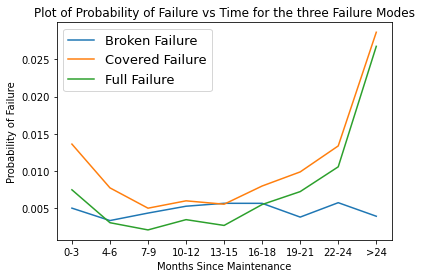

In [778]:
output = pd.DataFrame(output_dict)
plt.plot(output["Months"],output["Probability_of_broken_failure"],label='Broken Failure')
plt.plot(output["Months"],output["Probability_of_covered_failure"],label='Covered Failure')
plt.plot(output["Months"],output["Probability_of_full_failure"],label='Full Failure')
plt.legend()
plt.xlabel("Months Since Maintenance")
plt.ylabel("Probability of Failure")
plt.title("Plot of Probability of Failure vs Time for the three Failure Modes")
plt.legend(prop={'size': 13})
plt.savefig("failure vs time full data.png")

In [484]:
one_year = ["0-3","4-6","7-9","10-12"]
two_years = ["0-3","4-6","7-9","10-12","13-15","16-18","19-21","22-24"]
full_failure_within_one_year = output[output["Months"].isin(one_year)]["Probability_of_full_failure"].sum()
covered_failure_within_one_year = output[output["Months"].isin(one_year)]["Probability_of_covered_failure"].sum()
full_failure_within_two_years = output[output["Months"].isin(two_years)]["Probability_of_full_failure"].sum() 
covered_failure_within_two_years = output[output["Months"].isin(two_years)]["Probability_of_covered_failure"].sum()

In [485]:
failure_within_one_year_broken = output[output["Months"].isin(one_year)]["Probability_of_broken_failure"].sum()
failure_within_two_years_broken = output[output["Months"].isin(two_years)]["Probability_of_broken_failure"].sum()

In [486]:
print(f"Probability of at least one full failure within one year: {full_failure_within_one_year}")
print(f"Probability of at least one covered failure within one year: {covered_failure_within_one_year}")
print(f"Probability of at least one broken failure within one year: {failure_within_one_year_broken}")

Probability of at least one full failure within one year: 0.01613444456886698
Probability of at least one covered failure within one year: 0.032384756468619234
Probability of at least one broken failure within one year: 0.01802474655956541


In [487]:
full_failure_within_one_year+covered_failure_within_one_year+failure_within_one_year_broken

0.06654394759705162

In [488]:
print(f"Probability of at least one full failure within two years: {full_failure_within_two_years}")
print(f"Probability of at least one covered failure within two years: {covered_failure_within_two_years}")
print(f"Probability of at least one broken failure within two years: {failure_within_two_years_broken}")

Probability of at least one full failure within two years: 0.04216324814229898
Probability of at least one covered failure within two years: 0.0691921150939323
Probability of at least one broken failure within two years: 0.03894435954803037


In [489]:
full_failure_within_two_years+covered_failure_within_two_years+failure_within_two_years_broken

0.15029972278426165

### Does previous % Full influence future % full

In [805]:
output_dict = {"Previous_%Full":[],"%Full_Predicted":[],"Probability_of_%Full":[]}
for i in range(0,5):
    q1 = bn.inference.fit(reduced_bn, variables=['%Full'], evidence={"Previous_%Full":i,"Previous_type_of_maintenance":1})
    df1 = q1.df
    for index, row in df1.iterrows():
        output_dict["Probability_of_%Full"].append(row["p"])
        output_dict["Previous_%Full"].append(i)
        output_dict["%Full_Predicted"].append(row["%Full"])

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   %Full |        p |
+====+=========+==========+
|  0 |       0 | 0.07745  |
+----+---------+----------+
|  1 |       1 | 0.334654 |
+----+---------+----------+
|  2 |       2 | 0.361094 |
+----+---------+----------+
|  3 |       3 | 0.103267 |
+----+---------+----------+
|  4 |       4 | 0.123535 |
+----+---------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0498851 |
+----+---------+-----------+
|  1 |       1 | 0.3638    |
+----+---------+-----------+
|  2 |       2 | 0.318896  |
+----+---------+-----------+
|  3 |       3 | 0.134051  |
+----+---------+-----------+
|  4 |       4 | 0.133368  |
+----+---------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0484997 |
+----+---------+-----------+
|  1 |       1 | 0.348479  |
+----+---------+-----------+
|  2 |       2 | 0.319698  |
+----+---------+-----------+
|  3 |       3 | 0.150235  |
+----+---------+-----------+
|  4 |       4 | 0.133088  |
+----+---------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0551453 |
+----+---------+-----------+
|  1 |       1 | 0.349882  |
+----+---------+-----------+
|  2 |       2 | 0.315632  |
+----+---------+-----------+
|  3 |       3 | 0.160094  |
+----+---------+-----------+
|  4 |       4 | 0.119246  |
+----+---------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0488518 |
+----+---------+-----------+
|  1 |       1 | 0.301879  |
+----+---------+-----------+
|  2 |       2 | 0.246973  |
+----+---------+-----------+
|  3 |       3 | 0.169729  |
+----+---------+-----------+
|  4 |       4 | 0.232568  |
+----+---------+-----------+


In [806]:
data = pd.DataFrame(output_dict)

In [807]:
data["%Full_Predicted"] = data["%Full_Predicted"].astype(int)

In [808]:
param_dict = {
        0:"0%",
        1:"0-25%",
        2:"25-50%",
        3:"50-75%",
        4:"75-100%"
    }
data["Previous_%Full"] = data["Previous_%Full"].apply(lambda x: param_dict[x])

In [809]:
data["%Full_Predicted"] = data["%Full_Predicted"].apply(lambda x: param_dict[x])

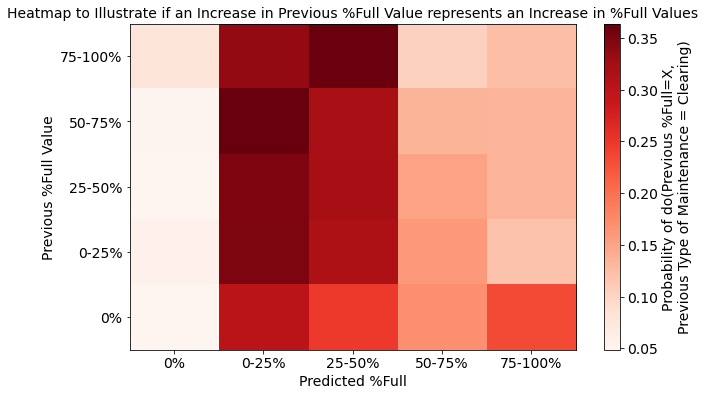

In [825]:
from textwrap import wrap
labels=['Really really really really really really long label 1',
        'Really really really really really really long label 2',
        'Really really really really really really long label 3']
labels = [ '\n'.join(wrap(l, 20)) for l in labels ]

# Pivot the DataFrame to prepare for heatmap
heatmap_data = data.pivot(index='Previous_%Full', columns='%Full_Predicted', values='Probability_of_%Full')

# Create the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(heatmap_data, cmap='Reds', interpolation='nearest', aspect='auto')

# Add a colorbar to indicate the probability values
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#label = ['Probability of do(Previous %Full=X,\nPrevious Type of Maintenance = Clearing)']
#labels = [ '\n'.join(wrap(l, 20)) for l in labels ]
cbar.set_label('Probability of do(Previous %Full=X,\nPrevious Type of Maintenance = Clearing)',size=14)


# Set the x and y tick labels
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index[::-1])  # Reverse the True Label axis

# Add labels and title
plt.xlabel('Predicted %Full',size=14)
plt.ylabel('Previous %Full Value',size=14)
plt.title('Heatmap to Illustrate if an Increase in Previous %Full Value represents an Increase in %Full Values',size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("Heatmap of previous percentage full vs predicted.png")

# Show the plot
plt.show()

In [785]:
heatmap_data

%Full_Predicted        0%     0-25%    25-50%    50-75%   75-100%
Previous_%Full                                                   
0%               0.077450  0.334654  0.361094  0.103267  0.123535
0-25%            0.049885  0.363800  0.318896  0.134051  0.133368
25-50%           0.048500  0.348479  0.319698  0.150235  0.133088
50-75%           0.055145  0.349882  0.315632  0.160094  0.119246
75-100%          0.048852  0.301879  0.246973  0.169729  0.232568

In [786]:
probabilities = heatmap_data.to_numpy()

# Assign a central "value" for each %Full category
categories_val = [0, 12.5, 37.5, 62.5, 87.5]

# Calculate expected values
expected_values = [np.dot(row, categories_val) for row in probabilities]

# Calculate correlation
correlation = np.corrcoef(categories_val, expected_values)[0, 1]

print("Expected values:", expected_values)
print("Correlation:", correlation)

Expected values: [34.98768612353507, 36.55399103751053, 37.379567258624206, 36.6496465043205, 43.99269311064718]
Correlation: 0.8282014091705966


### Does previous percentage full influence covered and full failures?

In [787]:
output_dict = {"Previous_%Full":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}
for i in range(0,5):
    q1 = bn.inference.fit(reduced_bn, variables=['full_failure'], evidence={"Previous_%Full":i})
    df1 = q1.df
    output_dict["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
    output_dict["Previous_%Full"].append(i)
    q2 = bn.inference.fit(reduced_bn, variables=['covered_failure'], evidence={"Previous_%Full":i})
    df2 = q2.df
    output_dict["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994171   |
+----+----------------+------------+
|  1 |              1 | 0.00582852 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.989747  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0102528 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997056   |
+----+----------------+------------+
|  1 |              1 | 0.00294405 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.993168   |
+----+-------------------+------------+
|  1 |                 1 | 0.00683181 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.996934   |
+----+----------------+------------+
|  1 |              1 | 0.00306577 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992601   |
+----+-------------------+------------+
|  1 |                 1 | 0.00739876 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994219   |
+----+----------------+------------+
|  1 |              1 | 0.00578061 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.991774   |
+----+-------------------+------------+
|  1 |                 1 | 0.00822605 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.99144    |
+----+----------------+------------+
|  1 |              1 | 0.00856013 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.9898    |
+----+-------------------+-----------+
|  1 |                 1 | 0.0102004 |
+----+-------------------+-----------+


In [788]:
data = pd.DataFrame(output_dict)

In [789]:
data["Previous_%Full"] = data["Previous_%Full"].apply(lambda x: param_dict[x])

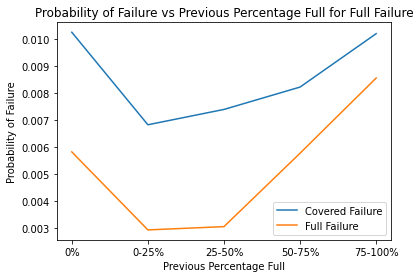

In [790]:
plt.plot(data["Previous_%Full"],data["Probability_of_covered_failure"],label='Covered Failure')
plt.plot(data["Previous_%Full"],data["Probability_of_full_failure"],label='Full Failure')
plt.legend()
plt.xlabel("Previous Percentage Full")
plt.ylabel("Probability of Failure")
plt.title("Probability of Failure vs Previous Percentage Full for Full Failure")
plt.savefig("full failure vs pFull.png")

In [791]:
output_dict = {"Previous_type_of_maintenance":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[],"Probability_of_broken_failure":[]}
for i in range(0,2):
    q1 = bn.inference.fit(reduced_bn, variables=['full_failure'], evidence={"Previous_type_of_maintenance":i})
    df1 = q1.df
    output_dict["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
    output_dict["Previous_type_of_maintenance"].append(i)
    
    q2 = bn.inference.fit(reduced_bn, variables=['covered_failure'], evidence={"Previous_type_of_maintenance":i})
    df2 = q2.df
    output_dict["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])
    
    q2 = bn.inference.fit(reduced_bn, variables=['broken_failure'], evidence={"Previous_type_of_maintenance":i})
    df2 = q2.df
    output_dict["Probability_of_broken_failure"].append(df2[df2["broken_failure"]==1]["p"][1])

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.995933   |
+----+----------------+------------+
|  1 |              1 | 0.00406697 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.993344   |
+----+-------------------+------------+
|  1 |                 1 | 0.00665602 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994963   |
+----+------------------+------------+
|  1 |                1 | 0.00503726 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.9956     |
+----+----------------+------------+
|  1 |              1 | 0.00439994 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.990933   |
+----+-------------------+------------+
|  1 |                 1 | 0.00906717 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+-----------+
|    |   broken_failure |         p |
+====+==================+===========+
|  0 |                0 | 0.995846  |
+----+------------------+-----------+
|  1 |                1 | 0.0041538 |
+----+------------------+-----------+


In [792]:
data = pd.DataFrame(output_dict)

In [793]:
data

Previous_type_of_maintenance  Probability_of_full_failure  \
0                             0                     0.004067   
1                             1                     0.004400   

   Probability_of_covered_failure  Probability_of_broken_failure  
0                        0.006656                       0.005037  
1                        0.009067                       0.004154

In [794]:
data = data.rename(columns={"Probability_of_full_failure":"Probability of full failure",
                     "Probability_of_covered_failure":"Probability of covered failure",
                     "Probability_of_broken_failure":"Probability of broken failure"}) 

In [795]:
data["Previous_type_of_maintenance"] = data["Previous_type_of_maintenance"].apply(lambda x: "Emptying" if x == 1 else "Clearing")

In [796]:
data

Previous_type_of_maintenance  Probability of full failure  \
0                     Clearing                     0.004067   
1                     Emptying                     0.004400   

   Probability of covered failure  Probability of broken failure  
0                        0.006656                       0.005037  
1                        0.009067                       0.004154

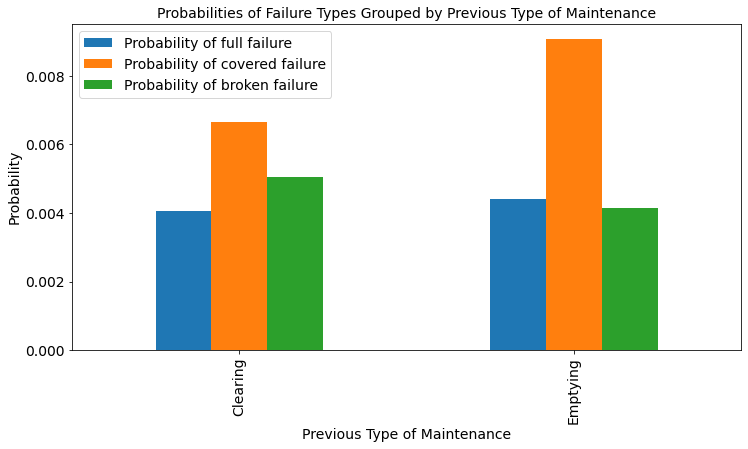

In [797]:
# Group the data by 'Region' and 'Previous_type_of_maintenance'
grouped_data = data.groupby(['Previous_type_of_maintenance']).sum()

# Create a grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 6))

# Add labels and titleb
plt.xlabel('Previous Type of Maintenance',size=14)
plt.ylabel('Probability',size=14)
plt.title('Probabilities of Failure Types Grouped by Previous Type of Maintenance', size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})
plt.savefig("type_of_maintenace vs failure.png")
# Show the plot
plt.show()

### How does region effect the probability of failure?

In [798]:
output_dict = {"Region":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[],"Probability_of_broken_failure":[]}
for j in struct_data_reduced["Region"].unique():
    q1 = bn.inference.fit(reduced_bn, variables=['full_failure'], evidence={"Region":j})
    df1 = q1.df
    output_dict["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
    output_dict["Region"].append(j)
    
    q2 = bn.inference.fit(reduced_bn, variables=['covered_failure'], evidence={"Region":j})
    df2 = q2.df
    output_dict["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])
    
    q2 = bn.inference.fit(reduced_bn, variables=['broken_failure'], evidence={"Region":j})
    df2 = q2.df
    output_dict["Probability_of_broken_failure"].append(df2[df2["broken_failure"]==1]["p"][1])

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.997192  |
+----+----------------+-----------+
|  1 |              1 | 0.0028077 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.9943     |
+----+-------------------+------------+
|  1 |                 1 | 0.00570006 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.997171   |
+----+------------------+------------+
|  1 |                1 | 0.00282886 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.991559   |
+----+----------------+------------+
|  1 |              1 | 0.00844066 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.98567   |
+----+-------------------+-----------+
|  1 |                 1 | 0.0143305 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+-----------+
|    |   broken_failure |         p |
+====+==================+===========+
|  0 |                0 | 0.990253  |
+----+------------------+-----------+
|  1 |                1 | 0.0097472 |
+----+------------------+-----------+


In [799]:
data = pd.DataFrame(output_dict)

In [800]:
data

Region  Probability_of_full_failure  Probability_of_covered_failure  \
0       1                     0.002808                         0.00570   
1       4                     0.008441                         0.01433   

   Probability_of_broken_failure  
0                       0.002829  
1                       0.009747

In [801]:
data = data.rename(columns={"Probability_of_full_failure":"Probability of Full Failure","Probability_of_covered_failure":"Probability of Covered Failure","Probability_of_broken_failure":"Probability of Broken Failure"})

In [802]:
data["Region"] = data["Region"].apply(lambda x: region_mapping[x])

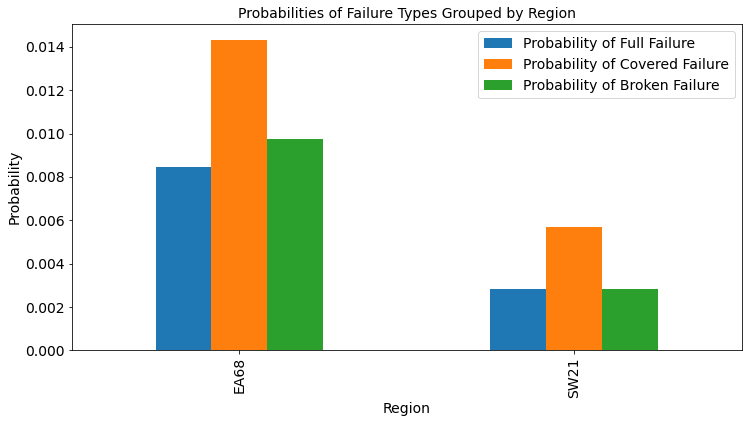

In [803]:
# Group the data by 'Region' and 'Previous_type_of_maintenance'
grouped_data = data.groupby(['Region']).sum()

# Create a grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 6))

# Add labels and titleb
plt.xlabel('Region',size=14)
plt.ylabel('Probability',size=14)
plt.title('Probabilities of Failure Types Grouped by Region',size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})
plt.savefig("probabilities per region.png")

# Show the plot
plt.show()

## Repeat for just the two regions and include extra months to understand relationship over 2 years old 

In [238]:
struct_data_extra_months = struct_data

%Full  Region  full_failure  covered_failure  broken_failure  \
15458       1       2             0                0               0   
15460       2       2             0                0               0   
15462       2       2             0                0               0   
15464       2       2             0                0               0   
15466       2       2             0                0               0   
...       ...     ...           ...              ...             ...   
551178      4       3             0                0               0   
551179      4       3             0                0               0   
551180      2       1             0                0               0   
551181      2       1             0                0               0   
551182      2       1             0                0               0   

        Previous_%Full  Previous_type_of_maintenance  Months_Since_Maintenance  
15458                1                             0                         0  
15460                2                             0                         0  
15462                2                             0                         0  
15464                2                             0                         0  
15466                2                             0                         0  
...                ...                           ...                       ...  
551178               2                             0                         2  
551179               2                             0                         2  
551180               3                             1                         2  
551181               3                             1                         2  
551182               2                             1                         2  

[409814 rows x 8 columns]

In [255]:
data = pd.read_csv("/home/tgraham/Documents/MSC/project_data/new_approach_data.csv",index_col=0)
data = data.drop(columns=["ActualCompletionDateTime","ExtractTimestamp","JobID","CentralAssetID"])
data = data.rename(columns={"prefix":"Region","ParameterValueID":"%Full","Previous_pvalue":"Previous_%Full"})

In [256]:
data["RouteID"] = data["RouteID"].astype(str)
data["Region"] = data["Region"].astype(str)
data["%Full"] = data["%Full"].astype(str)
data["Days_Since_Maintenance"] = data["Days_Since_Maintenance"].astype(int)

In [257]:
def edit_paramaterValueID (value):
    param_dict = {
        "CLEA":0,
        "0-25":1,
        "2550":2,
        "5075":3,
        "7510":4
    }
    return param_dict[value]

In [258]:
def encode_type_of_maintenance(value):
    if value == "Emptying":
        return 0
    elif value == "Clearing":
        return 1
    else:
        pass

In [259]:
def encode_region(value):
    if value == 'SW21':
        return 1
    elif value == 'NW13':
        return 2
    elif value == 'NW10':
        return 3
    elif value == 'EA68':
        return 4
    elif value == 'SE04':
        return 5
    else:
        pass

In [260]:
region_mapping = {1:"SW21",2:"NW13",3:"NW10",4:"EA68",5:"SE04"}

In [261]:
data["%Full"] = data["%Full"].apply(edit_paramaterValueID)
data["Previous_%Full"] = data["Previous_%Full"].apply(edit_paramaterValueID)
data["Previous_type_of_maintenance"] = data["Previous_type_of_maintenance"].apply(encode_type_of_maintenance)
data["Region"] = data["Region"].apply(encode_region)

In [262]:
data = data.drop(columns="RouteID")

In [263]:
def reduce_cardinality_of_dsm_long(days):
    # 0-3
    if days >= 0 and days <=90:
        return int(0)
    # 4-6
    elif days > 90 and days <= 180:
        return int(1)
    # 7-9
    elif days > 180 and days <= 270:
        return int(2)
    # 10-12
    elif days > 270 and days <= 360:
        return int(3)
    # 13-15
    elif days > 360 and days <= 450:
        return int(4)
    # 16-18
    elif days > 450 and days <= 540:
        return int(5)
    # 19-21
    elif days > 540 and days <= 630:
        return int(6)
    # 22-24
    elif days > 630 and days <= 720:
        return int(7)
    # 25-27
    elif days > 720 and days <= 810:
        return int(8) 
    # 28-30
    elif days > 810 and days <= 900: 
        return int(9)
    # 31-33
    elif days > 900 and days <= 990: 
        return int(10)
    # >33
    elif days > 990: 
        return int(11)

In [264]:
def reduce_cardinality_of_dsm_short(days):
    # 0-3
    if days >= 0 and days <=90:
        return int(0)
    # 4-6
    elif days > 90 and days <= 180:
        return int(1)
    # 7-9
    elif days > 180 and days <= 270:
        return int(2)
    # 10-12
    elif days > 270 and days <= 360:
        return int(3)
    # 13-15
    elif days > 360 and days <= 450:
        return int(4)
    # 16-18
    elif days > 450 and days <= 540:
        return int(5)
    # 19-21
    elif days > 540 and days <= 630:
        return int(6)
    # 22-24
    elif days > 630 and days <= 720:
        return int(7)
    # >24
    elif days > 720:
        return int(8) 

In [276]:
months_mapping_long = {0:"0-3",1:"4-6",2:"7-9",3:"10-12",4:"13-15",5:"16-18",6:"19-21",7:"22-24",8:"25-27",9:"28-30",10:"31-33",11:"34-36",12:">36"}
months_mapping_short = {0:"0-3",1:"4-6",2:"7-9",3:"10-12",4:"13-15",5:"16-18",6:"19-21",7:"22-24",8:">24"}

In [266]:
struct_data = data

In [267]:
struct_data["Months_Since_Maintenance"] = struct_data["Days_Since_Maintenance"].apply(reduce_cardinality_of_dsm_long)

In [268]:
struct_data = struct_data.drop(columns="Days_Since_Maintenance")

In [269]:
struct_data = struct_data.drop(columns="FloodHotspot")

In [270]:
struct_data = struct_data.drop(columns="Failure_or_Maintenance")

In [272]:
struct_data_reduced = struct_data[struct_data["Region"].isin([1,4])]

In [273]:
hill_climb_background_bnlearn_bic_reduced = bn.structure_learning.fit(struct_data_reduced, methodtype='hc', scoretype='bic',fixed_edges=required_edges)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


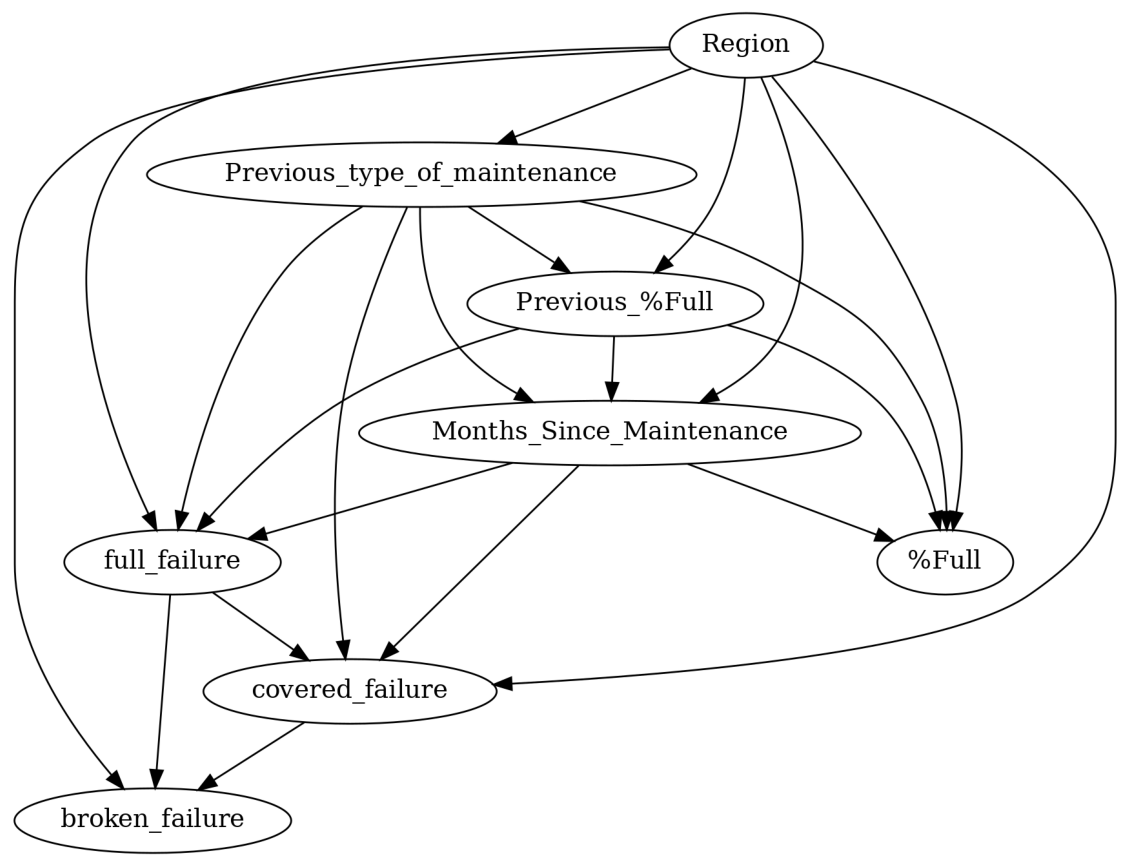

In [274]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in hill_climb_background_bnlearn_bic_reduced["model_edges"]:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('HillClimb_background_bic.png')

[bnlearn] >No changes made to existing bayes DAG.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


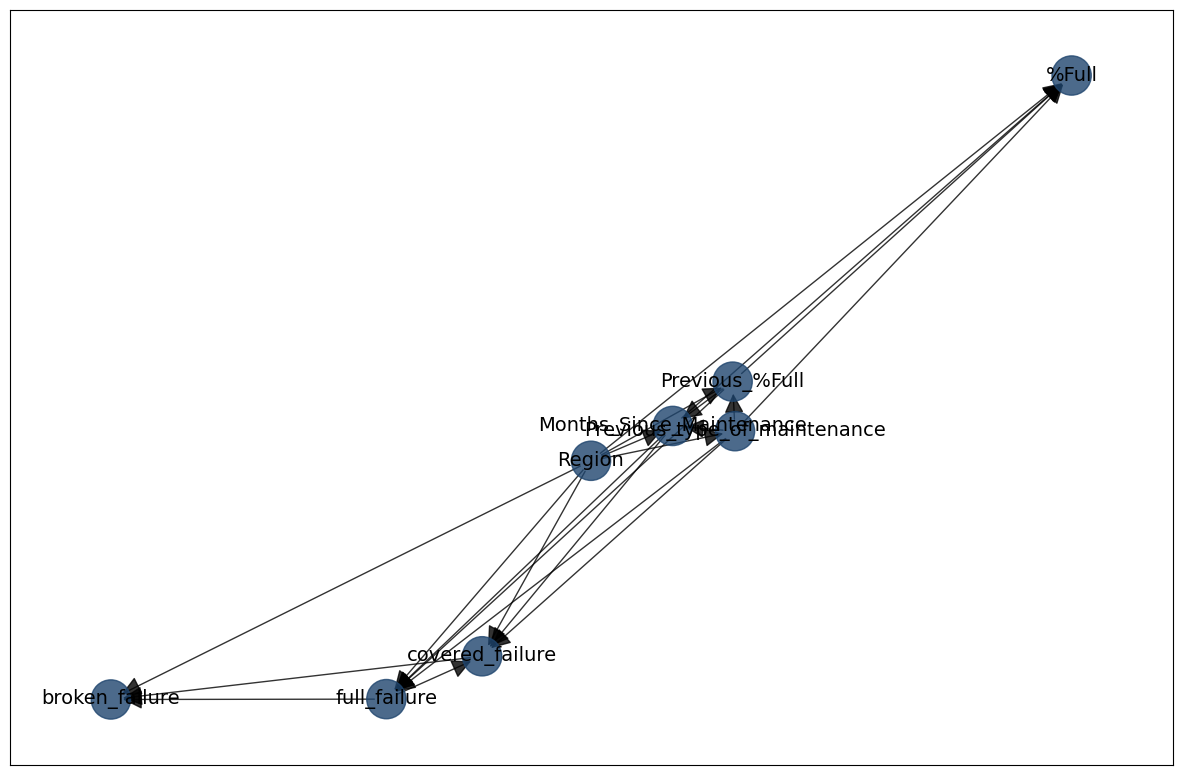

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Region:
+-----------+----------+
| Region(1) | 0.746178 |
+-----------+----------+
| Region(4) | 0.253822 |
+-----------+----------+
[bnlearn] >CPD of %Full:
+------------------------------+-----+---------------------------------+
| Months_Since_Maintenance     | ... | Months_Since_Maintenance(11)    |
+------------------------------+-----+---------------------------------+
| Previous_%Full               | ... | Previous_%Full(4)               |
+------------------------------+-----+---------------------------------+
| Previous_type_of_maintenance | ... | Previous_type_of_maintenance(1) |
+------------------------------+-----+---------------------------------+
| Region                       | ... | Region(4)                       |
+------------------------------+-----+--------

In [275]:
#edges = [('A', 'B'), ('A', 'C'), ('A', 'D')]
# Create DAG and store in model
model = bn.make_DAG(hill_climb_background_bnlearn_bic_reduced)
bn.plot(model)
reduced_bn = bn.parameter_learning.fit(model, struct_data_reduced)

In [277]:
output_dict = {"Months":[],"Probability_of_broken_failure":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}
for i in range(0,len(struct_data_reduced["Months_Since_Maintenance"].unique())):
    q1 = bn.inference.fit(reduced_bn, variables=['broken_failure'], evidence={"Months_Since_Maintenance":i})
    df1 = q1.df
    output_dict["Probability_of_broken_failure"].append(df1[df1["broken_failure"]==1]["p"][1])

    q2 = bn.inference.fit(reduced_bn, variables=['full_failure'], evidence={"Months_Since_Maintenance":i})
    df2 = q2.df
    output_dict["Probability_of_full_failure"].append(df2[df2["full_failure"]==1]["p"][1])

    q3 = bn.inference.fit(reduced_bn, variables=['covered_failure'], evidence={"Months_Since_Maintenance":i})
    df3 = q3.df
    output_dict["Probability_of_covered_failure"].append(df3[df3["covered_failure"]==1]["p"][1])
    
    output_dict["Months"].append(months_mapping_long[i])

[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.993615   |
+----+------------------+------------+
|  1 |                1 | 0.00638533 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.993051  |
+----+----------------+-----------+
|  1 |              1 | 0.0069487 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986911  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0130891 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996352   |
+----+------------------+------------+
|  1 |                1 | 0.00364751 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997241   |
+----+----------------+------------+
|  1 |              1 | 0.00275883 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992563   |
+----+-------------------+------------+
|  1 |                 1 | 0.00743684 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996846   |
+----+------------------+------------+
|  1 |                1 | 0.00315367 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.9982    |
+----+----------------+-----------+
|  1 |              1 | 0.0018003 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.995281   |
+----+-------------------+------------+
|  1 |                 1 | 0.00471852 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996188   |
+----+------------------+------------+
|  1 |                1 | 0.00381184 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997132   |
+----+----------------+------------+
|  1 |              1 | 0.00286817 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.994604  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0053963 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996312   |
+----+------------------+------------+
|  1 |                1 | 0.00368826 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997875   |
+----+----------------+------------+
|  1 |              1 | 0.00212454 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.995024   |
+----+-------------------+------------+
|  1 |                 1 | 0.00497589 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+-----------+
|    |   broken_failure |         p |
+====+==================+===========+
|  0 |                0 | 0.995214  |
+----+------------------+-----------+
|  1 |                1 | 0.0047855 |
+----+------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.995629   |
+----+----------------+------------+
|  1 |              1 | 0.00437092 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.993139   |
+----+-------------------+------------+
|  1 |                 1 | 0.00686068 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.995161   |
+----+------------------+------------+
|  1 |                1 | 0.00483949 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994485   |
+----+----------------+------------+
|  1 |              1 | 0.00551463 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.991833  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0081667 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.993126   |
+----+------------------+------------+
|  1 |                1 | 0.00687387 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.991983   |
+----+----------------+------------+
|  1 |              1 | 0.00801653 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.989165  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0108348 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+-----------+
|    |   broken_failure |         p |
+====+==================+===========+
|  0 |                0 | 0.966167  |
+----+------------------+-----------+
|  1 |                1 | 0.0338333 |
+----+------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.942156  |
+----+----------------+-----------+
|  1 |              1 | 0.0578436 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.936603  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0633966 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+----------+
|    |   broken_failure |        p |
+====+==================+==========+
|  0 |                0 | 0.975618 |
+----+------------------+----------+
|  1 |                1 | 0.024382 |
+----+------------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.957133  |
+----+----------------+-----------+
|  1 |              1 | 0.0428667 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.957133  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0428667 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+-----------+
|    |   broken_failure |         p |
+====+==================+===========+
|  0 |                0 | 0.94121   |
+----+------------------+-----------+
|  1 |                1 | 0.0587897 |
+----+------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+----------+
|    |   full_failure |        p |
+====+================+==========+
|  0 |              0 | 0.893254 |
+----+----------------+----------+
|  1 |              1 | 0.106746 |
+----+----------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+----------+
|    |   covered_failure |        p |
+====+===================+==========+
|  0 |                 0 | 0.893254 |
+----+-------------------+----------+
|  1 |                 1 | 0.106746 |
+----+-------------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+-----------+
|    |   broken_failure |         p |
+====+==================+===========+
|  0 |                0 | 0.901921  |
+----+------------------+-----------+
|  1 |                1 | 0.0980794 |
+----+------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+----------+
|    |   full_failure |        p |
+====+================+==========+
|  0 |              0 | 0.819885 |
+----+----------------+----------+
|  1 |              1 | 0.180115 |
+----+----------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+----------+
|    |   covered_failure |        p |
+====+===================+==========+
|  0 |                 0 | 0.819885 |
+----+-------------------+----------+
|  1 |                 1 | 0.180115 |
+----+-------------------+----------+


Text(0.5, 1.0, 'Plot of Probability of Failure vs Time for the three Failure Modes')

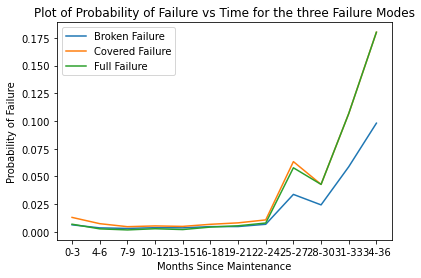

In [278]:
output = pd.DataFrame(output_dict)
plt.plot(output["Months"],output["Probability_of_broken_failure"],label='Broken Failure')
plt.plot(output["Months"],output["Probability_of_covered_failure"],label='Covered Failure')
plt.plot(output["Months"],output["Probability_of_full_failure"],label='Full Failure')
plt.legend()
plt.xlabel("Months Since Maintenance")
plt.ylabel("Probability of Failure")
plt.title("Plot of Probability of Failure vs Time for the three Failure Modes")

# Repeat for truth DAG - Compare Differences - Reduced Data

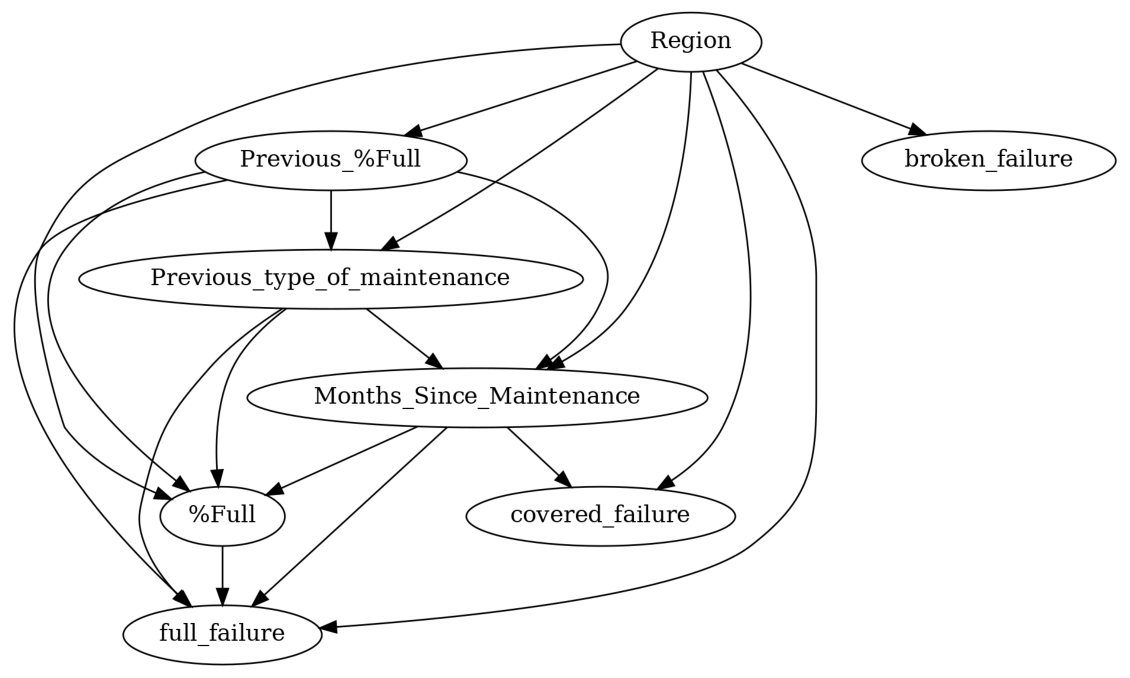

In [711]:
# visualization using pydot
pyd = GraphUtils.to_pydot(truth_dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('human_intuition.png')

In [712]:
#mapping = {'X1':'%Full',
# 'X2':'Region',
# 'X3':'full_failure',
# 'X4':'covered_failure',
# 'X5':'broken_failure',
# 'X6':'Previous_%Full',
# 'X7':'Previous_type_of_maintenance',
# 'X8':'Months_Since_Maintenance'}
# The below code extracts the edges from a dag so that a bnlearn dag structure can be  created
edges = []
for edge in truth_dag.get_graph_edges():
    edges.append((edge.get_node1().get_name(),edge.get_node2().get_name()))


In [713]:
edges

[('Region', '%Full'),
 ('%Full', 'full_failure'),
 ('Previous_%Full', '%Full'),
 ('Previous_type_of_maintenance', '%Full'),
 ('Months_Since_Maintenance', '%Full'),
 ('Region', 'full_failure'),
 ('Region', 'covered_failure'),
 ('Region', 'broken_failure'),
 ('Region', 'Previous_%Full'),
 ('Region', 'Previous_type_of_maintenance'),
 ('Region', 'Months_Since_Maintenance'),
 ('Previous_%Full', 'full_failure'),
 ('Previous_type_of_maintenance', 'full_failure'),
 ('Months_Since_Maintenance', 'full_failure'),
 ('Months_Since_Maintenance', 'covered_failure'),
 ('Previous_%Full', 'Previous_type_of_maintenance'),
 ('Previous_%Full', 'Months_Since_Maintenance'),
 ('Previous_type_of_maintenance', 'Months_Since_Maintenance')]

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


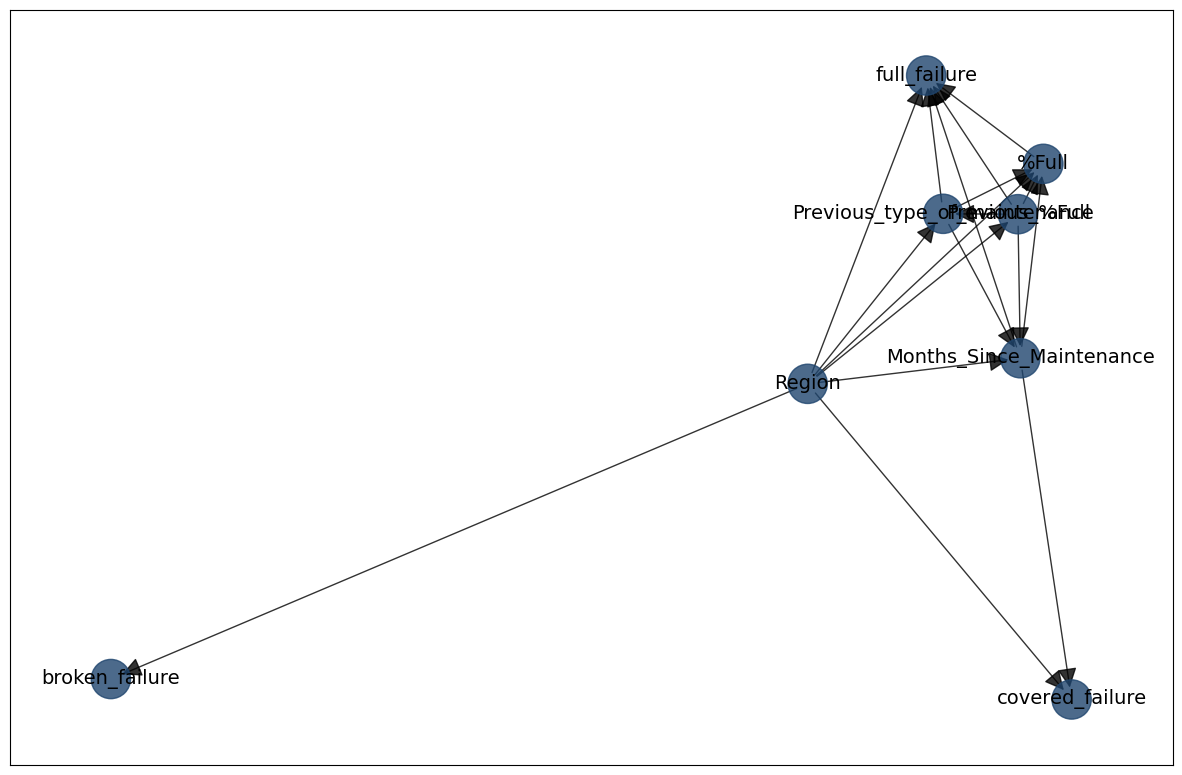

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Region:
+-----------+----------+
| Region(1) | 0.746178 |
+-----------+----------+
| Region(4) | 0.253822 |
+-----------+----------+
[bnlearn] >CPD of %Full:
+------------------------------+-----+---------------------------------+
| Months_Since_Maintenance     | ... | Months_Since_Maintenance(8)     |
+------------------------------+-----+---------------------------------+
| Previous_%Full               | ... | Previous_%Full(4)               |
+------------------------------+-----+---------------------------------+
| Previous_type_of_maintenance | ... | Previous_type_of_maintenance(1) |
+------------------------------+-----+---------------------------------+
| Region                       | ... | Region(4)                       |
+------------------------------+-----+---------------------------------+
| %Full(0)                     | ... | 0.16949152542372883             |
+---------------------------

In [714]:
#edges = [('A', 'B'), ('A', 'C'), ('A', 'D')]
# Create DAG and store in model
model = bn.make_DAG(edges)
bn.plot(model)
truth_bn = bn.parameter_learning.fit(model, struct_data_reduced)

### Does the time to mainetnance effect failure rates? - Truth DAG

In [747]:
output_dict = {"Months":[],"Probability_of_broken_failure":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}
for i in range(0,9):
    q1 = bn.inference.fit(truth_bn, variables=['broken_failure'], evidence={"Months_Since_Maintenance":i})
    df1 = q1.df
    output_dict["Probability_of_broken_failure"].append(df1[df1["broken_failure"]==1]["p"][1])

    q2 = bn.inference.fit(truth_bn, variables=['full_failure'], evidence={"Months_Since_Maintenance":i})
    df2 = q2.df
    output_dict["Probability_of_full_failure"].append(df2[df2["full_failure"]==1]["p"][1])

    q3 = bn.inference.fit(truth_bn, variables=['covered_failure'], evidence={"Months_Since_Maintenance":i})
    df3 = q3.df
    output_dict["Probability_of_covered_failure"].append(df3[df3["covered_failure"]==1]["p"][1])
    
    output_dict["Months"].append(months_mapping_short[i])

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994976   |
+----+------------------+------------+
|  1 |                1 | 0.00502403 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.992516   |
+----+----------------+------------+
|  1 |              1 | 0.00748378 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986382  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0136175 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996642   |
+----+------------------+------------+
|  1 |                1 | 0.00335765 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.996931   |
+----+----------------+------------+
|  1 |              1 | 0.00306928 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992256   |
+----+-------------------+------------+
|  1 |                 1 | 0.00774437 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.995638   |
+----+------------------+------------+
|  1 |                1 | 0.00436165 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.997899  |
+----+----------------+-----------+
|  1 |              1 | 0.0021015 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.994982   |
+----+-------------------+------------+
|  1 |                 1 | 0.00501796 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994719   |
+----+------------------+------------+
|  1 |                1 | 0.00528142 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.99652   |
+----+----------------+-----------+
|  1 |              1 | 0.0034799 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.993995   |
+----+-------------------+------------+
|  1 |                 1 | 0.00600491 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994327   |
+----+------------------+------------+
|  1 |                1 | 0.00567273 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997296   |
+----+----------------+------------+
|  1 |              1 | 0.00270377 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.994448   |
+----+-------------------+------------+
|  1 |                 1 | 0.00555181 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994332   |
+----+------------------+------------+
|  1 |                1 | 0.00566821 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994489   |
+----+----------------+------------+
|  1 |              1 | 0.00551088 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992005   |
+----+-------------------+------------+
|  1 |                 1 | 0.00799492 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996177   |
+----+------------------+------------+
|  1 |                1 | 0.00382277 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.992757   |
+----+----------------+------------+
|  1 |              1 | 0.00724324 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.990114   |
+----+-------------------+------------+
|  1 |                 1 | 0.00988604 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994244   |
+----+------------------+------------+
|  1 |                1 | 0.00575591 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.989429  |
+----+----------------+-----------+
|  1 |              1 | 0.0105709 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986625  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0133746 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996064   |
+----+------------------+------------+
|  1 |                1 | 0.00393625 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.973261  |
+----+----------------+-----------+
|  1 |              1 | 0.0267388 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+---------+
|    |   covered_failure |       p |
+====+===================+=========+
|  0 |                 0 | 0.97137 |
+----+-------------------+---------+
|  1 |                 1 | 0.02863 |
+----+-------------------+---------+


Text(0.5, 1.0, 'Plot of Probability of Failure vs Time for the three Failure Modes')

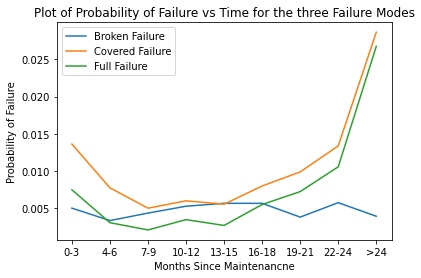

In [748]:
output = pd.DataFrame(output_dict)
plt.plot(output["Months"],output["Probability_of_broken_failure"],label='Broken Failure')
plt.plot(output["Months"],output["Probability_of_covered_failure"],label='Covered Failure')
plt.plot(output["Months"],output["Probability_of_full_failure"],label='Full Failure')
plt.legend()
plt.xlabel("Months Since Maintenancne")
plt.ylabel("Probability of Failure")
plt.title("Plot of Probability of Failure vs Time for the three Failure Modes")

In [717]:
one_year = ["0-3","4-6","7-9","10-12"]
two_years = ["0-3","4-6","7-9","10-12","13-15","16-18","19-21","22-24"]
full_failure_within_one_year = output[output["Months"].isin(one_year)]["Probability_of_full_failure"].sum()
covered_failure_within_one_year = output[output["Months"].isin(one_year)]["Probability_of_covered_failure"].sum()
full_failure_within_two_years = output[output["Months"].isin(two_years)]["Probability_of_full_failure"].sum() 
covered_failure_within_two_years = output[output["Months"].isin(two_years)]["Probability_of_covered_failure"].sum()

In [718]:
failure_within_one_year_broken = output[output["Months"].isin(one_year)]["Probability_of_broken_failure"].sum()
failure_within_two_years_broken = output[output["Months"].isin(two_years)]["Probability_of_broken_failure"].sum()

In [719]:
print(f"Probability of at least one full failure within one year: {full_failure_within_one_year}")
print(f"Probability of at least one covered failure within one year: {covered_failure_within_one_year}")
print(f"Probability of at least one broken failure within one year: {failure_within_one_year_broken}")

Probability of at least one full failure within one year: 0.01613444456886698
Probability of at least one covered failure within one year: 0.03238475646861923
Probability of at least one broken failure within one year: 0.01802474655956541


In [720]:
full_failure_within_one_year+covered_failure_within_one_year+failure_within_one_year_broken

0.06654394759705162

In [721]:
print(f"Probability of at least one full failure within two years: {full_failure_within_two_years}")
print(f"Probability of at least one covered failure within two years: {covered_failure_within_two_years}")
print(f"Probability of at least one broken failure within two years: {failure_within_two_years_broken}")

Probability of at least one full failure within two years: 0.04216324814229898
Probability of at least one covered failure within two years: 0.0691921150939323
Probability of at least one broken failure within two years: 0.03894435954803037


In [722]:
full_failure_within_two_years+covered_failure_within_two_years+failure_within_two_years_broken

0.15029972278426165

In [723]:
struct_data

%Full  Region  full_failure  covered_failure  broken_failure  \
15458       1       2             0                0               0   
15460       2       2             0                0               0   
15462       2       2             0                0               0   
15464       2       2             0                0               0   
15466       2       2             0                0               0   
...       ...     ...           ...              ...             ...   
551178      4       3             0                0               0   
551179      4       3             0                0               0   
551180      2       1             0                0               0   
551181      2       1             0                0               0   
551182      2       1             0                0               0   

        Previous_%Full  Previous_type_of_maintenance  Months_Since_Maintenance  
15458                1                             0                         0  
15460                2                             0                         0  
15462                2                             0                         0  
15464                2                             0                         0  
15466                2                             0                         0  
...                ...                           ...                       ...  
551178               2                             0                         2  
551179               2                             0                         2  
551180               3                             1                         2  
551181               3                             1                         2  
551182               2                             1                         2  

[409814 rows x 8 columns]

### Is previous percentage full predictive of future percentage full?

In [724]:
output_dict = {"Previous_%Full":[],"%Full_Predicted":[],"Probability_of_%Full":[]}
for i in range(0,5):
    q1 = bn.inference.fit(truth_bn, variables=['%Full'], evidence={"Previous_%Full":i,"Previous_type_of_maintenance":1})
    df1 = q1.df
    for index, row in df1.iterrows():
        output_dict["Probability_of_%Full"].append(row["p"])
        output_dict["Previous_%Full"].append(i)
        output_dict["%Full_Predicted"].append(row["%Full"])

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   %Full |        p |
+====+=========+==========+
|  0 |       0 | 0.07745  |
+----+---------+----------+
|  1 |       1 | 0.334654 |
+----+---------+----------+
|  2 |       2 | 0.361094 |
+----+---------+----------+
|  3 |       3 | 0.103267 |
+----+---------+----------+
|  4 |       4 | 0.123535 |
+----+---------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0498851 |
+----+---------+-----------+
|  1 |       1 | 0.3638    |
+----+---------+-----------+
|  2 |       2 | 0.318896  |
+----+---------+-----------+
|  3 |       3 | 0.134051  |
+----+---------+-----------+
|  4 |       4 | 0.133368  |
+----+---------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0484997 |
+----+---------+-----------+
|  1 |       1 | 0.348479  |
+----+---------+-----------+
|  2 |       2 | 0.319698  |
+----+---------+-----------+
|  3 |       3 | 0.150235  |
+----+---------+-----------+
|  4 |       4 | 0.133088  |
+----+---------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0551453 |
+----+---------+-----------+
|  1 |       1 | 0.349882  |
+----+---------+-----------+
|  2 |       2 | 0.315632  |
+----+---------+-----------+
|  3 |       3 | 0.160094  |
+----+---------+-----------+
|  4 |       4 | 0.119246  |
+----+---------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   %Full |         p |
+====+=========+===========+
|  0 |       0 | 0.0488518 |
+----+---------+-----------+
|  1 |       1 | 0.301879  |
+----+---------+-----------+
|  2 |       2 | 0.246973  |
+----+---------+-----------+
|  3 |       3 | 0.169729  |
+----+---------+-----------+
|  4 |       4 | 0.232568  |
+----+---------+-----------+


In [725]:
data = pd.DataFrame(output_dict)

In [726]:
data["%Full_Predicted"] = data["%Full_Predicted"].astype(int)

In [727]:
param_dict = {
        0:"0%",
        1:"0-25%",
        2:"25-50%",
        3:"50-75%",
        4:"75-100%"
    }
data["Previous_%Full"] = data["Previous_%Full"].apply(lambda x: param_dict[x])

In [728]:
data["%Full_Predicted"] = data["%Full_Predicted"].apply(lambda x: param_dict[x])

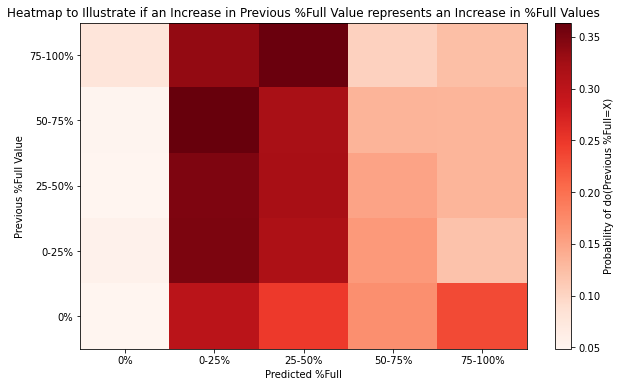

In [729]:
# Pivot the DataFrame to prepare for heatmap
heatmap_data = data.pivot(index='Previous_%Full', columns='%Full_Predicted', values='Probability_of_%Full')

# Create the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(heatmap_data, cmap='Reds', interpolation='nearest', aspect='auto')

# Add a colorbar to indicate the probability values
plt.colorbar(label='Probability of do(Previous %Full=X)')

# Set the x and y tick labels
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index[::-1])  # Reverse the True Label axis

# Add labels and title
plt.xlabel('Predicted %Full')
plt.ylabel('Previous %Full Value')
plt.title('Heatmap to Illustrate if an Increase in Previous %Full Value represents an Increase in %Full Values')

# Show the plot
plt.show()

In [730]:
heatmap_data

%Full_Predicted        0%     0-25%    25-50%    50-75%   75-100%
Previous_%Full                                                   
0%               0.077450  0.334654  0.361094  0.103267  0.123535
0-25%            0.049885  0.363800  0.318896  0.134051  0.133368
25-50%           0.048500  0.348479  0.319698  0.150235  0.133088
50-75%           0.055145  0.349882  0.315632  0.160094  0.119246
75-100%          0.048852  0.301879  0.246973  0.169729  0.232568

In [731]:
# Data
probabilities = [
    [0.085019, 0.355747, 0.335939, 0.114866, 0.108429],
    [0.071832, 0.320992, 0.310083, 0.168916, 0.128176],
    [0.060571, 0.263699, 0.350207, 0.221657, 0.103865],
    [0.046361, 0.221944, 0.352180, 0.254910, 0.124606],
    [0.045468, 0.263974, 0.318820, 0.209764, 0.161974]
]

# Assign a central "value" for each %Full category
categories_val = [0, 12.5, 37.5, 62.5, 87.5]

# Calculate expected values
expected_values = [np.dot(row, categories_val) for row in probabilities]

# Calculate correlation
correlation = np.corrcoef(categories_val, expected_values)[0, 1]

print("Expected values:", expected_values)
print("Correlation:", correlation)

Expected values: [33.7112125, 37.4131625, 39.37075, 42.81595, 42.538399999999996]
Correlation: 0.935637531851358


### Does previous percentage full influence covered and full failures?

In [732]:
output_dict = {"Previous_%Full":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}
for i in range(0,5):
    q1 = bn.inference.fit(truth_bn, variables=['full_failure'], evidence={"Previous_%Full":i})
    df1 = q1.df
    output_dict["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
    output_dict["Previous_%Full"].append(i)
    q2 = bn.inference.fit(truth_bn, variables=['covered_failure'], evidence={"Previous_%Full":i})
    df2 = q2.df
    output_dict["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])

[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994171   |
+----+----------------+------------+
|  1 |              1 | 0.00582852 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.992065  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0079349 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997056   |
+----+----------------+------------+
|  1 |              1 | 0.00294405 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.99289    |
+----+-------------------+------------+
|  1 |                 1 | 0.00711022 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.996934   |
+----+----------------+------------+
|  1 |              1 | 0.00306577 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.99098    |
+----+-------------------+------------+
|  1 |                 1 | 0.00901985 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994219   |
+----+----------------+------------+
|  1 |              1 | 0.00578061 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.991924   |
+----+-------------------+------------+
|  1 |                 1 | 0.00807626 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.99144    |
+----+----------------+------------+
|  1 |              1 | 0.00856013 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.992649  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0073512 |
+----+-------------------+-----------+


In [733]:
data = pd.DataFrame(output_dict)

In [734]:
data["Previous_%Full"] = data["Previous_%Full"].apply(lambda x: param_dict[x])

Text(0.5, 1.0, 'Plot of Probability of Failure vs Previous Percentage Full for two Failure Modes')

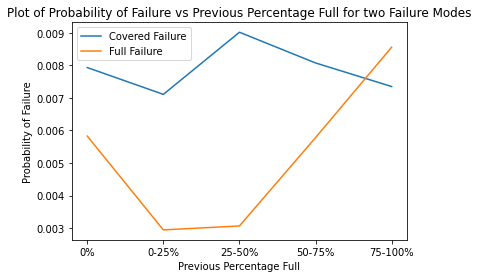

In [735]:
plt.plot(data["Previous_%Full"],data["Probability_of_covered_failure"],label='Covered Failure')
plt.plot(data["Previous_%Full"],data["Probability_of_full_failure"],label='Full Failure')
plt.legend()
plt.xlabel("Previous Percentage Full")
plt.ylabel("Probability of Failure")
plt.title("Plot of Probability of Failure vs Previous Percentage Full for two Failure Modes")

### Does the type of maintenance effect the probability of failure? What is this effect across regions?

In [176]:
output_dict = {"Region":[],"Previous_type_of_maintenance":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[],"Probability_of_broken_failure":[]}
for j in range(1,len(struct_data["Region"].unique())):
    for i in range(0,2):
        q1 = bn.inference.fit(truth_bn, variables=['full_failure'], evidence={"Previous_type_of_maintenance":i,"Region":j})
        df1 = q1.df
        output_dict["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
        output_dict["Previous_type_of_maintenance"].append(i)
        output_dict["Region"].append(j)
        
        q2 = bn.inference.fit(truth_bn, variables=['covered_failure'], evidence={"Previous_type_of_maintenance":i,"Region":j})
        df2 = q2.df
        output_dict["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])
        
        q2 = bn.inference.fit(truth_bn, variables=['broken_failure'], evidence={"Previous_type_of_maintenance":i,"Region":j})
        df2 = q2.df
        output_dict["Probability_of_broken_failure"].append(df2[df2["broken_failure"]==1]["p"][1])

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998078   |
+----+----------------+------------+
|  1 |              1 | 0.00192192 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.995385   |
+----+-------------------+------------+
|  1 |                 1 | 0.00461463 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998226   |
+----+------------------+------------+
|  1 |                1 | 0.00177444 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998382   |
+----+----------------+------------+
|  1 |              1 | 0.00161794 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.995319   |
+----+-------------------+------------+
|  1 |                 1 | 0.00468147 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998226   |
+----+------------------+------------+
|  1 |                1 | 0.00177444 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-------------+
|    |   full_failure |           p |
+====+================+=============+
|  0 |              0 | 0.999504    |
+----+----------------+-------------+
|  1 |              1 | 0.000495741 |
+----+----------------+-------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-------------+
|    |   covered_failure |           p |
+====+===================+=============+
|  0 |                 0 | 0.999023    |
+----+-------------------+-------------+
|  1 |                 1 | 0.000977237 |
+----+-------------------+-------------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998993   |
+----+------------------+------------+
|  1 |                1 | 0.00100713 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+---------+
|    |   full_failure |       p |
+====+================+=========+
|  0 |              0 | 0.52381 |
+----+----------------+---------+
|  1 |              1 | 0.47619 |
+----+----------------+---------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.983581  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0164191 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998993   |
+----+------------------+------------+
|  1 |                1 | 0.00100713 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-------------+
|    |   full_failure |           p |
+====+================+=============+
|  0 |              0 | 0.999284    |
+----+----------------+-------------+
|  1 |              1 | 0.000715677 |
+----+----------------+-------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.998493   |
+----+-------------------+------------+
|  1 |                 1 | 0.00150716 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.99836    |
+----+------------------+------------+
|  1 |                1 | 0.00164032 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+----------+
|    |   full_failure |        p |
+====+================+==========+
|  0 |              0 | 0.647887 |
+----+----------------+----------+
|  1 |              1 | 0.352113 |
+----+----------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.998026   |
+----+-------------------+------------+
|  1 |                 1 | 0.00197424 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.99836    |
+----+------------------+------------+
|  1 |                1 | 0.00164032 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.996399   |
+----+----------------+------------+
|  1 |              1 | 0.00360054 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986391  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0136086 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.993322   |
+----+------------------+------------+
|  1 |                1 | 0.00667794 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.991829   |
+----+----------------+------------+
|  1 |              1 | 0.00817144 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992404   |
+----+-------------------+------------+
|  1 |                 1 | 0.00759575 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.993322   |
+----+------------------+------------+
|  1 |                1 | 0.00667794 |
+----+------------------+------------+


In [177]:
data = pd.DataFrame(output_dict)

In [178]:
data = merged.drop(columns={"Count"})

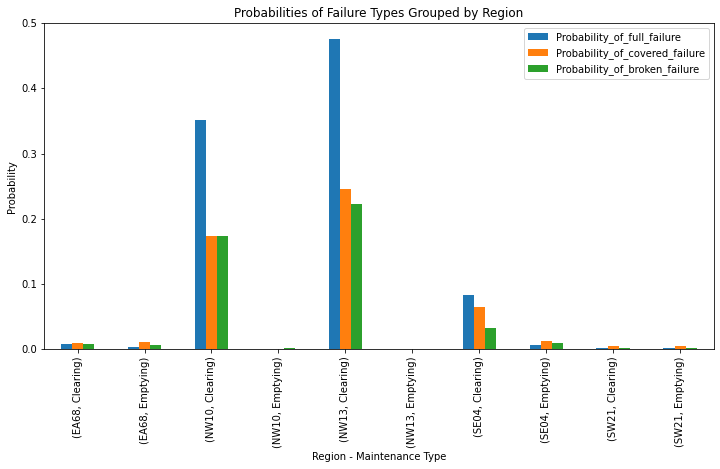

In [179]:
# Group the data by 'Region' and 'Previous_type_of_maintenance'
grouped_data = data.groupby(['Region', 'Previous_type_of_maintenance']).sum()

# Create a grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Region - Maintenance Type')
plt.ylabel('Probability')
plt.title('Probabilities of Failure Types Grouped by Region')

# Show the plot
plt.show()

### How does region effect the probability of failiure

In [180]:
output_dict = {"Region":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[],"Probability_of_broken_failure":[]}
for j in range(1,len(struct_data["Region"].unique())):
    q1 = bn.inference.fit(truth_bn, variables=['full_failure'], evidence={"Region":j})
    df1 = q1.df
    output_dict["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
    output_dict["Region"].append(j)
    
    q2 = bn.inference.fit(truth_bn, variables=['covered_failure'], evidence={"Region":j})
    df2 = q2.df
    output_dict["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])
    
    q2 = bn.inference.fit(truth_bn, variables=['broken_failure'], evidence={"Region":j})
    df2 = q2.df
    output_dict["Probability_of_broken_failure"].append(df2[df2["broken_failure"]==1]["p"][1])

[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998247   |
+----+----------------+------------+
|  1 |              1 | 0.00175323 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.995348   |
+----+-------------------+------------+
|  1 |                 1 | 0.00465172 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998226   |
+----+------------------+------------+
|  1 |                1 | 0.00177444 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.999092   |
+----+----------------+------------+
|  1 |              1 | 0.00090807 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-------------+
|    |   covered_failure |           p |
+====+===================+=============+
|  0 |                 0 | 0.999009    |
+----+-------------------+-------------+
|  1 |                 1 | 0.000990622 |
+----+-------------------+-------------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.998993   |
+----+------------------+------------+
|  1 |                1 | 0.00100713 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.998624   |
+----+----------------+------------+
|  1 |              1 | 0.00137575 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.998492   |
+----+-------------------+------------+
|  1 |                 1 | 0.00150804 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.99836    |
+----+------------------+------------+
|  1 |                1 | 0.00164032 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994637   |
+----+----------------+------------+
|  1 |              1 | 0.00536322 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.98871   |
+----+-------------------+-----------+
|  1 |                 1 | 0.0112899 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.993322   |
+----+------------------+------------+
|  1 |                1 | 0.00667794 |
+----+------------------+------------+


In [181]:
data = pd.DataFrame(output_dict)

In [182]:
data = data.rename(columns={"Probability_of_full_failure":"Probability of Full Failure","Probability_of_covered_failure":"Probability of Covered Failure","Probability_of_broken_failure":"Probability of Broken Failure"})

In [183]:
data["Region"] = data["Region"].apply(lambda x: region_mapping[x])

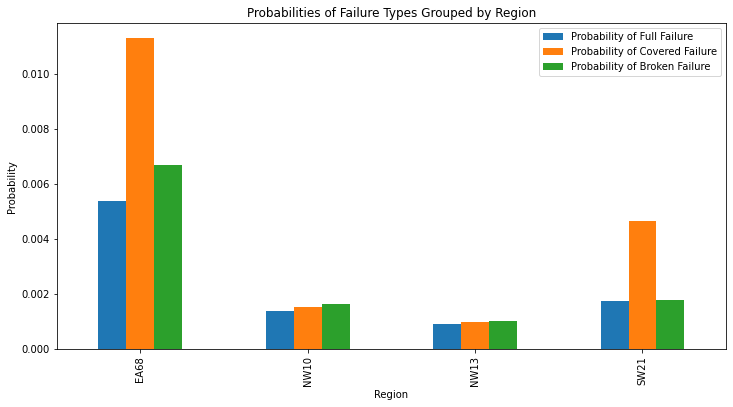

In [184]:
# Group the data by 'Region' and 'Previous_type_of_maintenance'
grouped_data = data.groupby(['Region']).sum()

# Create a grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 6))

# Add labels and titleb
plt.xlabel('Region')
plt.ylabel('Probability')
plt.title('Probabilities of Failure Types Grouped by Region')

# Show the plot
plt.show()

In [185]:
region_count = struct_data[["Region","%Full"]].groupby(["Region"],as_index=False).count()

In [186]:
region_count

Region   %Full
0       1  141253
1       2  120936
2       3   75395
3       4   47719
4       5   24511

In [187]:
data["Region"] = data["Region"].apply(encode_region)

In [188]:
merged_with_count = pd.merge(data,region_count,on="Region")

In [189]:
merged_with_count = merged_with_count.rename(columns={"%Full":"Count"})

In [190]:
total = merged_with_count["Count"].sum()

In [191]:
merged_with_count["Probability of Full Failure Scaled"] = (merged_with_count["Probability of Full Failure"]*merged_with_count["Count"])/total
merged_with_count["Probability of Covered Failure Scaled"] = merged_with_count["Probability of Covered Failure"]*merged_with_count["Count"]/total
merged_with_count["Probability of Broken Failure Scaled"] = (merged_with_count["Probability of Broken Failure"]*merged_with_count["Count"])/total

In [192]:
merged_with_count

Region  Probability of Full Failure  Probability of Covered Failure  \
0       1                     0.001753                        0.004652   
1       2                     0.000908                        0.000991   
2       3                     0.001376                        0.001508   
3       4                     0.005363                        0.011290   

   Probability of Broken Failure   Count  Probability of Full Failure Scaled  \
0                       0.001774  141253                            0.000643   
1                       0.001007  120936                            0.000285   
2                       0.001640   75395                            0.000269   
3                       0.006678   47719                            0.000664   

   Probability of Covered Failure Scaled  Probability of Broken Failure Scaled  
0                               0.001705                              0.000651  
1                               0.000311                              0.000316  
2                               0.000295                              0.000321  
3                               0.001398                              0.000827

In [193]:
data = merged_with_count[["Region","Probability of Full Failure Scaled","Probability of Covered Failure Scaled","Probability of Broken Failure Scaled"]]

In [194]:
data["Region"] = data["Region"].apply(lambda x: region_mapping[x])

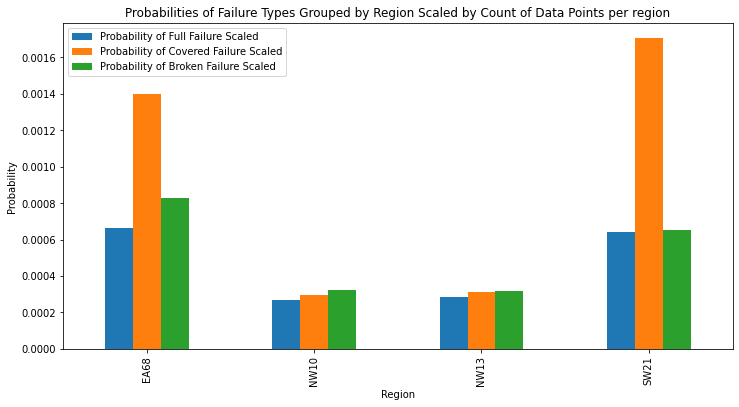

In [195]:
# Group the data by 'Region' and 'Previous_type_of_maintenance'
grouped_data = data.groupby(['Region']).sum()

# Create a grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Probability')
plt.title('Probabilities of Failure Types Grouped by Region Scaled by Count of Data Points per region')

# Show the plot
plt.show()

## Create Comparison Graphs between Learnt and Truth 

In [760]:
output_dict_truth = {"Months":[],"Probability_of_broken_failure":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}
output_dict_test = {"Months":[],"Probability_of_broken_failure":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}

for i in range(0,9):
    q1 = bn.inference.fit(truth_bn, variables=['broken_failure'], evidence={"Months_Since_Maintenance":i})
    df1 = q1.df
    output_dict_truth["Probability_of_broken_failure"].append(df1[df1["broken_failure"]==1]["p"][1])
    
    q1_test = bn.inference.fit(reduced_bn, variables=['broken_failure'], evidence={"Months_Since_Maintenance":i})
    df1_test = q1_test.df
    output_dict_test["Probability_of_broken_failure"].append(df1_test[df1_test["broken_failure"]==1]["p"][1])
        
    q2 = bn.inference.fit(truth_bn, variables=['full_failure'], evidence={"Months_Since_Maintenance":i})
    df2 = q2.df
    output_dict_truth["Probability_of_full_failure"].append(df2[df2["full_failure"]==1]["p"][1])

    q2_test = bn.inference.fit(reduced_bn, variables=['full_failure'], evidence={"Months_Since_Maintenance":i})
    df2_test = q2_test.df
    output_dict_test["Probability_of_full_failure"].append(df2_test[df2_test["full_failure"]==1]["p"][1])
    
    q3 = bn.inference.fit(truth_bn, variables=['covered_failure'], evidence={"Months_Since_Maintenance":i})
    df3 = q3.df
    output_dict_truth["Probability_of_covered_failure"].append(df3[df3["covered_failure"]==1]["p"][1])
    
    q3_test = bn.inference.fit(reduced_bn, variables=['covered_failure'], evidence={"Months_Since_Maintenance":i})
    df3_test = q3_test.df
    output_dict_test["Probability_of_covered_failure"].append(df3_test[df3_test["covered_failure"]==1]["p"][1])
    
    output_dict_truth["Months"].append(months_mapping_short[i])
    output_dict_test["Months"].append(months_mapping_short[i])

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994976   |
+----+------------------+------------+
|  1 |                1 | 0.00502403 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994976   |
+----+------------------+------------+
|  1 |                1 | 0.00502403 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.992516   |
+----+----------------+------------+
|  1 |              1 | 0.00748378 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.992516   |
+----+----------------+------------+
|  1 |              1 | 0.00748378 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986382  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0136175 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986382  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0136175 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996642   |
+----+------------------+------------+
|  1 |                1 | 0.00335765 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996642   |
+----+------------------+------------+
|  1 |                1 | 0.00335765 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.996931   |
+----+----------------+------------+
|  1 |              1 | 0.00306928 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.996931   |
+----+----------------+------------+
|  1 |              1 | 0.00306928 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992256   |
+----+-------------------+------------+
|  1 |                 1 | 0.00774437 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992256   |
+----+-------------------+------------+
|  1 |                 1 | 0.00774437 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.995638   |
+----+------------------+------------+
|  1 |                1 | 0.00436165 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.995638   |
+----+------------------+------------+
|  1 |                1 | 0.00436165 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.997899  |
+----+----------------+-----------+
|  1 |              1 | 0.0021015 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.997899  |
+----+----------------+-----------+
|  1 |              1 | 0.0021015 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.994982   |
+----+-------------------+------------+
|  1 |                 1 | 0.00501796 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.994982   |
+----+-------------------+------------+
|  1 |                 1 | 0.00501796 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994719   |
+----+------------------+------------+
|  1 |                1 | 0.00528142 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994719   |
+----+------------------+------------+
|  1 |                1 | 0.00528142 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.99652   |
+----+----------------+-----------+
|  1 |              1 | 0.0034799 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.99652   |
+----+----------------+-----------+
|  1 |              1 | 0.0034799 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.993995   |
+----+-------------------+------------+
|  1 |                 1 | 0.00600491 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.993995   |
+----+-------------------+------------+
|  1 |                 1 | 0.00600491 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994327   |
+----+------------------+------------+
|  1 |                1 | 0.00567273 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994327   |
+----+------------------+------------+
|  1 |                1 | 0.00567273 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997296   |
+----+----------------+------------+
|  1 |              1 | 0.00270377 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997296   |
+----+----------------+------------+
|  1 |              1 | 0.00270377 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.994448   |
+----+-------------------+------------+
|  1 |                 1 | 0.00555181 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.994448   |
+----+-------------------+------------+
|  1 |                 1 | 0.00555181 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994332   |
+----+------------------+------------+
|  1 |                1 | 0.00566821 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994332   |
+----+------------------+------------+
|  1 |                1 | 0.00566821 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994489   |
+----+----------------+------------+
|  1 |              1 | 0.00551088 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994489   |
+----+----------------+------------+
|  1 |              1 | 0.00551088 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992005   |
+----+-------------------+------------+
|  1 |                 1 | 0.00799492 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992005   |
+----+-------------------+------------+
|  1 |                 1 | 0.00799492 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996177   |
+----+------------------+------------+
|  1 |                1 | 0.00382277 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996177   |
+----+------------------+------------+
|  1 |                1 | 0.00382277 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.992757   |
+----+----------------+------------+
|  1 |              1 | 0.00724324 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.992757   |
+----+----------------+------------+
|  1 |              1 | 0.00724324 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.990114   |
+----+-------------------+------------+
|  1 |                 1 | 0.00988604 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.990114   |
+----+-------------------+------------+
|  1 |                 1 | 0.00988604 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994244   |
+----+------------------+------------+
|  1 |                1 | 0.00575591 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.994244   |
+----+------------------+------------+
|  1 |                1 | 0.00575591 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.989429  |
+----+----------------+-----------+
|  1 |              1 | 0.0105709 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.989429  |
+----+----------------+-----------+
|  1 |              1 | 0.0105709 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986625  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0133746 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.986625  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0133746 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996064   |
+----+------------------+------------+
|  1 |                1 | 0.00393625 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+------------------+------------+
|    |   broken_failure |          p |
+====+==================+============+
|  0 |                0 | 0.996064   |
+----+------------------+------------+
|  1 |                1 | 0.00393625 |
+----+------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.973261  |
+----+----------------+-----------+
|  1 |              1 | 0.0267388 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+-----------+
|    |   full_failure |         p |
+====+================+===========+
|  0 |              0 | 0.973261  |
+----+----------------+-----------+
|  1 |              1 | 0.0267388 |
+----+----------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+---------+
|    |   covered_failure |       p |
+====+===================+=========+
|  0 |                 0 | 0.97137 |
+----+-------------------+---------+
|  1 |                 1 | 0.02863 |
+----+-------------------+---------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+---------+
|    |   covered_failure |       p |
+====+===================+=========+
|  0 |                 0 | 0.97137 |
+----+-------------------+---------+
|  1 |                 1 | 0.02863 |
+----+-------------------+---------+


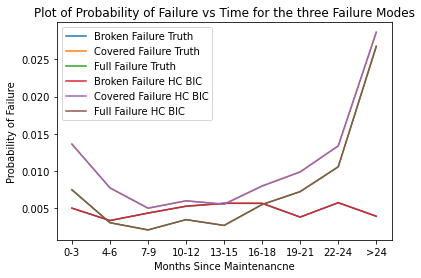

In [761]:
output_truth = pd.DataFrame(output_dict_truth)
output_test = pd.DataFrame(output_dict_test)
plt.plot(output_truth["Months"],output_truth["Probability_of_broken_failure"],label='Broken Failure Truth')
plt.plot(output_truth["Months"],output_truth["Probability_of_covered_failure"],label='Covered Failure Truth')
plt.plot(output_truth["Months"],output_truth["Probability_of_full_failure"],label='Full Failure Truth')
plt.plot(output_test["Months"],output_test["Probability_of_broken_failure"],label='Broken Failure HC BIC')
plt.plot(output_test["Months"],output_test["Probability_of_covered_failure"],label='Covered Failure HC BIC')
plt.plot(output_test["Months"],output_test["Probability_of_full_failure"],label='Full Failure HC BIC')
plt.legend()
plt.xlabel("Months Since Maintenancne")
plt.ylabel("Probability of Failure")
plt.title("Plot of Probability of Failure vs Time for the three Failure Modes")
plt.savefig("failure_vs_time_truth_test.png")

In [753]:
output_dict_test = {"Previous_%Full":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}
output_dict_truth = {"Previous_%Full":[],"Probability_of_full_failure":[],"Probability_of_covered_failure":[]}
for i in range(0,5):
    q1 = bn.inference.fit(truth_bn, variables=['full_failure'], evidence={"Previous_%Full":i})
    df1 = q1.df
    output_dict_truth["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
    output_dict_truth["Previous_%Full"].append(i)
    
    q1 = bn.inference.fit(reduced_bn, variables=['full_failure'], evidence={"Previous_%Full":i})
    df1 = q1.df
    output_dict_test["Probability_of_full_failure"].append(df1[df1["full_failure"]==1]["p"][1])
    output_dict_test["Previous_%Full"].append(i)
    
    q2 = bn.inference.fit(truth_bn, variables=['covered_failure'], evidence={"Previous_%Full":i})
    df2 = q2.df
    output_dict_truth["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])
    
    q2 = bn.inference.fit(reduced_bn, variables=['covered_failure'], evidence={"Previous_%Full":i})
    df2 = q2.df
    output_dict_test["Probability_of_covered_failure"].append(df2[df2["covered_failure"]==1]["p"][1])

[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994171   |
+----+----------------+------------+
|  1 |              1 | 0.00582852 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994171   |
+----+----------------+------------+
|  1 |              1 | 0.00582852 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.992065  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0079349 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.989747  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0102528 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997056   |
+----+----------------+------------+
|  1 |              1 | 0.00294405 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.997056   |
+----+----------------+------------+
|  1 |              1 | 0.00294405 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.99289    |
+----+-------------------+------------+
|  1 |                 1 | 0.00711022 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.993168   |
+----+-------------------+------------+
|  1 |                 1 | 0.00683181 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.996934   |
+----+----------------+------------+
|  1 |              1 | 0.00306577 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.996934   |
+----+----------------+------------+
|  1 |              1 | 0.00306577 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.99098    |
+----+-------------------+------------+
|  1 |                 1 | 0.00901985 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.992601   |
+----+-------------------+------------+
|  1 |                 1 | 0.00739876 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994219   |
+----+----------------+------------+
|  1 |              1 | 0.00578061 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.994219   |
+----+----------------+------------+
|  1 |              1 | 0.00578061 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.991924   |
+----+-------------------+------------+
|  1 |                 1 | 0.00807626 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+------------+
|    |   covered_failure |          p |
+====+===================+============+
|  0 |                 0 | 0.991774   |
+----+-------------------+------------+
|  1 |                 1 | 0.00822605 |
+----+-------------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.99144    |
+----+----------------+------------+
|  1 |              1 | 0.00856013 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+----------------+------------+
|    |   full_failure |          p |
+====+================+============+
|  0 |              0 | 0.99144    |
+----+----------------+------------+
|  1 |              1 | 0.00856013 |
+----+----------------+------------+
[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.992649  |
+----+-------------------+-----------+
|  1 |                 1 | 0.0073512 |
+----+-------------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[bnlearn] >Data is stored in [query.df]
+----+-------------------+-----------+
|    |   covered_failure |         p |
+====+===================+===========+
|  0 |                 0 | 0.9898    |
+----+-------------------+-----------+
|  1 |                 1 | 0.0102004 |
+----+-------------------+-----------+


In [755]:
data_truth = pd.DataFrame(output_dict_truth)
data_test = pd.DataFrame(output_dict_test)

In [756]:
data_truth["Previous_%Full"] = data_truth["Previous_%Full"].apply(lambda x: param_dict[x])
data_test["Previous_%Full"] = data_test["Previous_%Full"].apply(lambda x: param_dict[x])

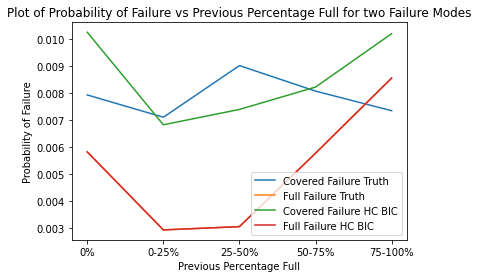

In [758]:
plt.plot(data_truth["Previous_%Full"],data_truth["Probability_of_covered_failure"],label='Covered Failure Truth')
plt.plot(data_truth["Previous_%Full"],data_truth["Probability_of_full_failure"],label='Full Failure Truth')
plt.plot(data_test["Previous_%Full"],data_test["Probability_of_covered_failure"],label='Covered Failure HC BIC')
plt.plot(data_test["Previous_%Full"],data_test["Probability_of_full_failure"],label='Full Failure HC BIC')
plt.legend()
plt.xlabel("Previous Percentage Full")
plt.ylabel("Probability of Failure")
plt.title("Plot of Probability of Failure vs Previous Percentage Full for two Failure Modes")
plt.savefig("Previous percent full truth vs test.png")